# UBIT: animeshp | UB Person #: 50290441
## Group Partner: smitra2 | UB Person #: 50291168

## Part 3 starts below. 
### This piece of code retrieves tweets. Please do not run this. This is already created. This is placed here just to illustrate how the tweets have been collected. A total of 5000 tweets have been collected.

In [1]:
## access token method: create token and save it as an environment variable

library(rtweet)
library(data.table)
library(dplyr)

create_token(
  app = "DIC_EDA_1",
  consumer_key = "pcEvrIV5zHuvoOaCHKOomk9FE",
  consumer_secret = "6c7M5OhGT32U7YfSADVYYhwvdfOcW8gA9ZQykJoTbZhhY16yaq",
  access_token = "130485979-Tj65oVh6VBlVKIN7Rli93ZpChUVdZXQTOhGScMov",
  access_secret = "yFUW8Nup7MYK0TQAecbVB9uBgbimSGkJpR5XRJ54YhvFS")



rt <- search_tweets(
  "flu OR influenza OR fluvaccine OR fightflu OR fluseason OR flushot", geocode = lookup_coords("usa"), n = 18000, include_rts = FALSE, retryonratelimit = TRUE
) #rt will contain lot of Junk Tweets

#Data Processing (Eliminating Junk)

rt <- lat_lng(rt)
rt <- rt[!(is.na(rt$lat) | is.na(rt$lng)),] #Removes NA values for Lat and Lng
rt <-unique( rt[ , ] ) #Removes Duplicates
rt <- dplyr::filter(rt, grepl("flu|influenza|fluvaccine|fluseason|flushot", text)) #Fetches Tweets containing relevant words
fwrite(rt, file = "Tweets.csv", row.names = FALSE, col.names = FALSE, sep = ",", append = TRUE)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



<Token>
<oauth_endpoint>
 request:   https://api.twitter.com/oauth/request_token
 authorize: https://api.twitter.com/oauth/authenticate
 access:    https://api.twitter.com/oauth/access_token
<oauth_app> DIC_EDA_1
  key:    pcEvrIV5zHuvoOaCHKOomk9FE
  secret: <hidden>
<credentials> oauth_token, oauth_token_secret
---

### Reverse Geocode

In [2]:
library("ggmap")
library("ggplot2")
library("maptools")
library("maps")
library("rtweet")
library("openintro")
library("plyr")

rt_matrix <- read.csv(file="Tweets.csv", header=TRUE, sep=",")

#Eliminating Duplicates
rt_matrix <- lat_lng(rt_matrix)
rt_matrix <-unique( rt_matrix[ , ] ) #Removes Duplicates

address <- do.call(rbind, lapply(1 : nrow(rt_matrix), function(i) revgeocode(as.numeric(rt_matrix[i, 90: 89]), output = "address")))
rt_matrix <- cbind(rt_matrix, address)
rt_matrix$state <-substr(address, nchar(address) - 12, nchar(address) - 11) #Extract State Abbr
rt_matrix$state <- tolower(abbr2state(rt_matrix$state))

states <- map_data("state") # Will return all lat and lng positions of all states
tc <- count(rt_matrix, "state") #Will Store State-wise Tweet Count
colnames(tc)[colnames(tc)=="state"] <- "region"

Loading required package: ggplot2
Google's Terms of Service: https://cloud.google.com/maps-platform/terms/.
Please cite ggmap if you use it! See citation("ggmap") for details.
Loading required package: sp
Checking rgeos availability: FALSE
 	Note: when rgeos is not available, polygon geometry 	computations in maptools depend on gpclib,
 	which has a restricted licence. It is disabled by default;
 	to enable gpclib, type gpclibPermit()
Please visit openintro.org for free statistics materials

Attaching package: ‘openintro’

The following object is masked from ‘package:ggplot2’:

    diamonds

The following objects are masked from ‘package:datasets’:

    cars, trees


Attaching package: ‘plyr’

The following object is masked from ‘package:maps’:

    ozone

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.0207895,-118.4119065&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637

Multiple addresses found, the first will be returned:
  628 S 10th St, San Jose, CA 95112, USA
  618 S 10th St, San Jose, CA 95112, USA
  629 S 10th St, San Jose, CA 95112, USA
  SUN, San Jose, CA 95112, USA
  San Jose, CA 95112, USA
  Central San Jose, San Jose, CA, USA
  San Jose, CA, USA
  Santa Clara County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=37.125845,-93.463637&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  531 N Alexander Ave, Republic, MO 65738, USA
  650 US-60, Republic, MO 65738, USA
  1010 US-60, Republic, MO 65738, USA
  US-60, Republic, MO 65738, USA
  Republic North Township, MO, USA
  Republic, MO, USA
  Republic, MO 65738, USA
  Greene County, MO, USA
  Missouri, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.768929,-74.020494&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
 

  30 Tony Gwynn Dr, San Diego, CA 92101, USA
  220 Tony Gwynn Dr, San Diego, CA 92101, USA
  Unnamed Road, San Diego, CA 92101, USA
  East Village, San Diego, CA, USA
  San Diego, CA 92101, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.900901,-118.0071635&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  15208 Caravaca Rd, La Mirada, CA 90638, USA
  15205 Caravaca Rd, La Mirada, CA 90638, USA
  La Mirada, CA 90638, USA
  La Mirada, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=30.56867875,-97.84673945&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  140 East Sonny Drive, Leander, TX 78641, USA
  801 Leander Dr, Leander, TX 78641, USA
  831 Leander Dr, Leander, TX 78641, USA
  East Sonny Drive, Leander, TX 78

  1, LA, USA
  St Tammany Parish, LA, USA
  Louisiana, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=26.16486445,-80.23035805&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  5875 W Oakland Park Blvd, Lauderhill, FL 33319, USA
  W Oakland Park Blvd, Lauderhill, FL 33319, USA
  Inverrary, Lauderhill, FL, USA
  Fort Lauderdale, FL 33319, USA
  Lauderhill, FL, USA
  Broward County, FL, USA
  Florida, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=25.7823537,-80.2333285&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  947 NW 23rd Ave, Miami, FL 33125, USA
  1008 NW 23rd Ave, Miami, FL 33125, USA
  NW 23rd Ave, Miami, FL 33125, USA
  West Little Havana, Miami, FL, USA
  Miami, FL 33125, USA
  Miami, FL, USA
  Miami-Dade County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  947 NW 23rd

Multiple addresses found, the first will be returned:
  2343 E Robinson Ave, Fresno, CA 93726, USA
  3791 N Howard Ave, Fresno, CA 93726, USA
  2376 E Robinson Ave, Fresno, CA 93726, USA
  3676-3798 N Howard Ave, Fresno, CA 93726, USA
  Fresno, CA 93726, USA
  McLane, Fresno, CA, USA
  Fresno, CA, USA
  Fresno County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=32.7799665,-97.2859135&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  1304 Gibson Ln, Fort Worth, TX 76117, USA
  1317 Gibson Ln, Haltom City, TX 76117, USA
  4100-4198 Wheeler St, Fort Worth, TX 76117, USA
  Haltom City, TX, USA
  Fort Worth, TX 76117, USA
  Tarrant County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  1304 Gibson Ln, Fort Worth, TX 76117, USA
  1317 Gibson Ln, Haltom City, TX 76117, USA
  4100-4198 Wheeler St, Fort Worth, TX 76117, USA
  Haltom City, TX, USA


  Unnamed Road, Atlanta, GA 30305, USA
  Peachtree Heights West, Atlanta, GA 30305, USA
  Atlanta, GA 30305, USA
  Atlanta, GA, USA
  Fulton County, GA, USA
  Georgia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=36.830799,-119.636189&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  6542 Leonard Ave, Clovis, CA 93619, USA
  6501 Leonard Ave, Clovis, CA 93619, USA
  6528 Leonard Ave, Clovis, CA 93619, USA
  8375-8465 E Paul Ave, Clovis, CA 93619, USA
  Clovis, CA 93619, USA
  Fresno County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, North Little Rock, AR 72117, USA
  North Little Rock, AR 72117, USA
  Hill Township, AR, USA
  Pulaski County, AR, USA
  Arkansas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=26.63648,-81.9868342&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first wil

  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=45.49036937,-122.80982081&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4070 SW Cedar Hills Blvd, Beaverton, OR 97005, USA
  Unnamed Road, Beaverton, OR 97005, USA
  Central Beaverton, Beaverton, OR 97005, USA
  Beaverton, OR 97005, USA
  Beaverton, OR, USA
  Washington County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glen

  15838 196th Pl NE, Woodinville, WA 98077, USA
  16099-16001 197th Ave NE, Woodinville, WA 98077, USA
  Woodinville, WA 98077, USA
  Cottage Lake, WA, USA
  King County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  Goshen, VA 24439, USA
  Walkers Creek, VA, USA
  Rockbridge County, VA, USA
  Virginia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=18.1154073,-77.2759528&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  st andrew, Jamaica
  Unnamed Road, Morgans Pass, Jamaica
  Morgans Pass, Jamaica
  Clarendon, Jamaica
  Jamaica
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=36.3194862,-119.3195263&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  2606 W Iris Ct, Visalia, CA 93277, USA
  2539 W Tulare Ave, Visalia, CA 93277, USA
  2563 W Iris Ct, Visalia, CA 93277, USA
  Visalia, CA, USA
  Visalia

  Eden, TX 76837, USA
  Concho County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.688654,-73.9386545&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  265 Marcus Garvey Blvd, Brooklyn, NY 11221, USA
  263 Marcus Garvey Blvd, Brooklyn, NY 11221, USA
  521 Quincy St, Brooklyn, NY 11221, USA
  Brooklyn, NY 11221, USA
  Bedford-Stuyvesant, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/ma

  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=32.960341,-105.950194&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  163 US-82, Alamogordo, NM 88310, USA
  155 US-82, La Luz, NM 88337, USA
  Horseshoe Ln, La Luz, NM 88337, USA
  149 US-82, La Luz, NM 88337, USA
  La Luz, NM, USA
  La Luz, NM 88337, USA
  Otero County, NM, USA
  New Mexico, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=32.576227,-86.6807375&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  2836 Wyatt Rd, Prattville, AL 36067, USA
  1622 County Rd 19 N, Prattville, AL 36067, USA
  2894 Wyatt Rd, Prattville, AL 36067, USA
  County Rd 19 N, Prattville, AL 36067, USA
  Prattville, AL 36067, USA
  Autauga County, AL, USA
  Alabama, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?la

  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  168 S Holly St, Denver, CO 80220, USA
  198 S Holly St, Denver, CO 80246, USA
  161 S Holly St, Denver, CO 80246, USA
  5685-5637 E Cedar Ave, Denver, CO 80224, USA
  Hilltop, Denver, CO, USA
  Denver, CO 80224, USA
  Denver, CO, USA
  Denver County, Denver, CO, USA
  Colorado, USA
  United States
Multiple addresses found, the first will be returned:
  168 S Holly St, Denver, CO 80220, USA
  198 S Holly St, Denver, CO 80246, USA
  161 S Holly St, Denver, CO 80246, USA
  5685-5637 E Cedar Ave, Denver, CO 80224, USA
  Hilltop, Denver, CO, USA
  Denver, CO 80224, USA
  Denver, CO, USA
  Denver County, Denver, CO, USA
  Colorado, USA
  United States
Multiple addresses found, the first will be returned:
  1547 Kennerly Rd, Orangeburg, SC 29118, USA
  1546 State Rd 29, Orangeburg, SC 29118, USA
  State Rd 29, Orangeburg, SC 29118, USA
  Orangeburg, SC 29118, USA
  Calhoun C

  3621 High St NE, Albuquerque, NM 87107, USA
  3616 High St NE, Albuquerque, NM 87107, USA
  Sundts Industrial Area, Albuquerque, NM 87107, USA
  LOS RNCHS ABQ, NM 87107, USA
  Albuquerque, NM, USA
  Bernalillo County, NM, USA
  New Mexico, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=32.8198585,-96.7617535&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Skillman @ Palo Pinto - S - NS, Dallas, TX 75206, USA
  6046 Palo Pinto Ave, Dallas, TX 75206, USA
  6038 Palo Pinto Ave, Dallas, TX 75206, USA
  2436-2448 Skillman St, Dallas, TX 75214, USA
  Lower Greenville, Dallas, TX, USA
  Dallas, TX 75206, USA
  Dallas, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=47.27302215,-120.882482&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  13610 Teanaway Rd North Fork, Cle Elum, WA 98922, USA
  

  4, MD, USA
  Baltimore County, MD, USA
  Maryland, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.0808775,-81.5167515&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  51 E Bowery St, Akron, OH 44308, USA
  135 S High St, Akron, OH 44308, USA
  142 Wheeler Ln, Akron, OH 44308, USA
  73-55 E Bowery St, Akron, OH 44308, USA
  Akron, OH 44308, USA
  Downtown, Akron, OH, USA
  Akron, OH, USA
  Summit County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  750 E 11th Ave, Columbus, OH 43211, USA
  1477 Clara St, Columbus, OH 43211, USA
  I-71, Columbus, OH 43211, USA
  Fairgrounds, Columbus, OH, USA
  Columbus, OH 43211, USA
  Columbus, OH, USA
  Franklin County, OH, USA
  Ohio, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=43.629311,-79.2725695&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be ret

  2685 E Livmor Ave, Palm Springs, CA 92262, USA
  2690 E Livmor Ave, Palm Springs, CA 92262, USA
  263-201 Easmor Cir, Palm Springs, CA 92262, USA
  Sunmor, Palm Springs, CA 92262, USA
  Palm Springs, CA 92262, USA
  Palm Springs, CA, USA
  Riverside County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.1179365,-77.604684&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Unnamed Road, Beech Creek, PA 16822, USA
  Beech Creek, PA 16822, USA
  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=36.1296889,-97.08020475&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  588 N McDonald St, Stillwater, OK 74078, USA
  N McDonald St, Stillwater, OK 74078, USA
  Stillwater, OK, USA
  Stillwater, OK 74075, USA
  Payne County, OK, USA
  Oklahoma, US

  United States
Multiple addresses found, the first will be returned:
  525 Steeple View Ct, Winston-Salem, NC 27101, USA
  529 Steeple View Ct, Winston-Salem, NC 27101, USA
  608 Marshall St SW, Winston-Salem, NC 27101, USA
  W Academy St, Winston-Salem, NC 27101, USA
  Winston-Salem, NC 27101, USA
  Winston, NC, USA
  Winston-Salem, NC, USA
  Forsyth County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  525 Steeple View Ct, Winston-Salem, NC 27101, USA
  529 Steeple View Ct, Winston-Salem, NC 27101, USA
  608 Marshall St SW, Winston-Salem, NC 27101, USA
  W Academy St, Winston-Salem, NC 27101, USA
  Winston-Salem, NC 27101, USA
  Winston, NC, USA
  Winston-Salem, NC, USA
  Forsyth County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=36.0042715,-80.3864405&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  678 Drumheller Ct, 

  Stump Springs Rd, Lakeshore, CA 93634, USA
  Shaver Lake, CA 93634, USA
  Fresno County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  Stump Springs Rd, Lakeshore, CA 93634, USA
  Shaver Lake, CA 93634, USA
  Fresno County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Die

  17 Francis Ave, Cambridge, MA 02138, USA
  99-11 Kirkland Pl, Cambridge, MA 02138, USA
  Agassiz, Cambridge, MA, USA
  Cambridge, MA 02138, USA
  Cambridge, MA, USA
  Middlesex County, MA, USA
  Massachusetts, USA
  United States
Multiple addresses found, the first will be returned:
  Goshen, VA 24439, USA
  Walkers Creek, VA, USA
  Rockbridge County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  2656 Mcfaddin Ave, Beaumont, TX 77702, USA
  2656 McFaddin St, Beaumont, TX 77702, USA
  2658 Mcfaddin Ave, Beaumont, TX 77702, USA
  Oaks Historic District, Beaumont, TX, USA
  Beaumont, TX 77702, USA
  Beaumont, TX, USA
  Jefferson County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=36.215092,-81.65789505&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  602 Forest Hills Dr, Boone, NC 28607, USA
  581 Forest Hills Dr, Boone, NC 28607, USA
  60

  West Virginia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.1450234,-75.3864607&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  2 Newgreen Crescent, Brampton, ON L6S 4X8, Canada
  8 Newgreen Crescent, Brampton, ON L6S 4Y2, Canada
  6 Napanee St, Brampton, ON L6S 4X8, Canada
  11 Napanee St, Brampton, ON L6S 4X8, Canada
  21-1 Newgreen Crescent, Brampton, ON L6S, Canada
  Brampton, ON L6S 4X8, Canada
  Brampton, ON L6S, Canada
  Brampton, ON, Canada
  Peel Regional Municipality, ON, Canada
  Ontario, Canada
  Canada
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.2707,-87.592685&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  3890 1/2 Union Chapel Rd, Northport, AL 35473, USA
  3974 Union Chapel Rd, Northport, AL 35473, USA
  Union Chapel Rd, Northport, AL 35473, USA
  Northport, AL 35473, USA
  Tuscaloosa County, AL, USA
  Alabama, USA
 

Multiple addresses found, the first will be returned:
  621 Majestic Rim Dr, Henderson, NV 89012, USA
  631 Cityview Ridge Dr, Henderson, NV 89012, USA
  600 St Croix St, Henderson, NV 89012, USA
  Cityview Ridge Dr, Henderson, NV 89012, USA
  MacDonald Highlands, Henderson, NV 89012, USA
  Henderson, NV 89012, USA
  Henderson, NV, USA
  Las Vegas, NV, USA
  Clark County, NV, USA
  Nevada, USA
  United States
Multiple addresses found, the first will be returned:
  835 Philpotts Rd, Norfolk, VA 23513, USA
  6230 Tidewater Dr, Norfolk, VA 23509, USA
  Unnamed Road, Norfolk, VA 23509, USA
  Greenhill Farms, Norfolk, VA, USA
  Norfolk, VA 23513, USA
  Norfolk, VA, USA
  Virginia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=27.8913655,-82.80800365&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  205 Ulmerton Rd, Largo, FL 33778, USA
  Ulmerton Rd + Wilcox St, Florida 33778, USA
  207 Ulmerton Rd, Largo, FL 33

Multiple addresses found, the first will be returned:
  11063 Telegraph Rd, Taylor, MI 48180, USA
  11086 W Point St, Taylor, MI 48180, USA
  Telegraph @ Goddard, Taylor, MI 48180, USA
  11071 Telegraph Rd, Taylor, MI 48180, USA
  Telegraph Rd, Taylor, MI 48180, USA
  Taylor, MI 48180, USA
  Wayne County, MI, USA
  Michigan, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=29.9015445,-93.9559185&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Unnamed Road, Port Arthur, TX 77640, USA
  Port Acres, TX 77640, USA
  Jefferson County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Port Arthur, TX 77640, USA
  Port Acres, TX 77640, USA
  Jefferson County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Ph

  1560 Abakan St, Rosemead, CA 91770, USA
  Unnamed Road, Rosemead, CA 91770, USA
  South San Gabriel, CA 91770, USA
  Rosemead, CA 91770, USA
  South Montebello, Commerce, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=44.9346135,-93.6626335&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Serving Your Area, Mound, MN 55364, United States
  2453 Lost Lake Rd, Mound, MN 55364, USA
  5471 Lost Lake Ct, Mound, MN 55364, USA
  2452 Lost Lake Rd, Mound, MN 55364, USA
  Mound, MN 55364, USA
  Minnetrista, MN 55364, USA
  Hennepin County, MN, USA
  Minnesota, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=32.1893905,-110.9155735&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  3600 E 36th St, Tucson, AZ 85713, USA
  3600 S Frontage Rd, Tucson, AZ 85713, USA
  2915 E 36th St Access Rd

  1701-1799 Adalane Pl, Fallbrook, CA 92028, USA
  Fallbrook, CA 92028, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  17901 SE Antelope Springs Rd, Prineville, OR 97754, USA
  18098-17776 SE Pony Springs Rd, Prineville, OR 97754, USA
  Prineville, OR 97754, USA
  Crook County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the first will be returned:
  4015 W Friendly Ave, Greensboro, NC 27410, USA
  4011 W Friendly Ave, Greensboro, NC 27410, USA
  West Friendly/West Kemp Rd (A), Greensboro, NC 27410, USA
  300 Kemp Rd W, Greensboro, NC 27410, USA
  357 Kemp Rd E, Greensboro, NC 27410, USA
  W Friendly Ave, Greensboro, NC 27410, USA
  Starmount Forest, Greensboro, NC, USA
  Greensboro, NC 27410, USA
  Morehead, NC, USA
  Greensboro, NC, USA
  Guilford County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.064242,-84.4700155&key

  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Beech Creek, PA 16822, USA
  Beech Creek, PA 16822, USA
  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=19.1431005,-96.09899065&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Blvd. Manuel Ávila Camacho 321, Costa de Oro, 94299 Veracruz, Ver., Mexico
  Blvd. Manuel Ávila Camacho, Costa de Oro, 94299 Veracruz, Ver., Mexico
  Mexico
Multiple addresses found, the first will be returned:
  1304 Gibson Ln, Fort Worth, TX 76117, USA
  1317 Gibson Ln, Haltom City, TX 76117, USA
  4100-4198 Wheeler St, Fort Worth, TX 76117, USA
  Haltom City, TX, USA
  Fort Worth, TX 76117, USA
  Tarrant County, TX, USA
  Texas, USA
  United States
Sou

  300 W Grubb Dr, Mesquite, TX 75149, USA
  401 Upland Ln, Mesquite, TX 75149, USA
  498-400 Upland Ln, Mesquite, TX 75149, USA
  El Rosa, Mesquite, TX 75149, USA
  Mesquite, TX 75149, USA
  Mesquite, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brookl

  295 Mills St, Kalamazoo, MI 49048, USA
  City of Kalamazoo Parks & Recreation, 251 Mills St, Kalamazoo, MI 49048, USA
  293 Mills St, Kalamazoo, MI 49048, USA
  363-305 Mills St, Kalamazoo, MI 49001, USA
  Edison, Kalamazoo, MI, USA
  Kalamazoo, MI 49001, USA
  Kalamazoo, MI, USA
  Kalamazoo County, MI, USA
  Michigan, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.396352,-76.6151805&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  28 Southland Ct, Towson, MD 21204, USA
  TOWSONTOWN BLVD & OSLER DR wb, Towson, MD 21204, USA
  326 Dixie Dr, Towson, MD 21204, USA
  98 Southland Ct, Towson, MD 21204, USA
  79-99 Southland Ct, Towson, MD 21204, USA
  Baltimore, MD 21204, USA
  Towson, MD, USA
  District 9, MD, USA
  Baltimore County, MD, USA
  Maryland, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=46.25817755,-119.2796615&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple a

  Kissimmee, FL, USA
  Kissimmee, FL 34744, USA
  Osceola County, FL, USA
  Florida, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.043189,-77.384597&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  46671 Winterset Ct, Sterling, VA 20165, USA
  46670 Winterset Ct, Potomac Falls, VA 20165, USA
  VA-637, Potomac Falls, VA 20165, USA
  Potomac Falls, VA 20165, USA
  Potomac, VA, USA
  Sterling, VA 20165, USA
  Loudoun County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  3223 S Kolin Ave, Chicago, IL 60623, USA
  3259 S Kolin Ave, Chicago, IL 60623, USA
  4313 W 33rd St, Chicago, IL 60623, USA
  Piotrowski Park, 4247 W 31st St, Chicago, IL 60623, USA
  4399-4341 W 33rd St, Chicago, IL 60623, USA
  Little Village, Chicago, IL, USA
  Chicago, IL 60623, USA
  Chicago, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the f

  529 Steeple View Ct, Winston-Salem, NC 27101, USA
  608 Marshall St SW, Winston-Salem, NC 27101, USA
  W Academy St, Winston-Salem, NC 27101, USA
  Winston-Salem, NC 27101, USA
  Winston, NC, USA
  Winston-Salem, NC, USA
  Forsyth County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  3223 S Kolin Ave, Chicago, IL 60623, USA
  3259 S Kolin Ave, Chicago, IL 60623, USA
  4313 W 33rd St, Chicago, IL 60623, USA
  Piotrowski Park, 4247 W 31st St, Chicago, IL 60623, USA
  4399-4341 W 33rd St, Chicago, IL 60623, USA
  Little Village, Chicago, IL, USA
  Chicago, IL 60623, USA
  Chicago, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=30.683649,-88.1615555&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  68 Kingsway, Mobile, AL 36608, USA
  63 Kingsway, Mobile, AL 36608, USA
  4251 Wilkinson Way, Mobile, AL 36608, USA


Multiple addresses found, the first will be returned:
  129 W Pioneer Trail, Aurora, OH 44202, USA
  126 W Pioneer Trail, Aurora, OH 44202, USA
  Unnamed Road, Aurora, OH 44202, USA
  Aurora, OH 44202, USA
  Portage County, OH, USA
  Ohio, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=31.023364,-87.493121&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  111 S Main St, Atmore, AL 36502, USA
  121 S Main St, Atmore, AL 36502, USA
  Pensacola Ave, Atmore, AL 36502, USA
  Atmore, AL 36502, USA
  McCullough, AL 36502, USA
  Escambia County, AL, USA
  Alabama, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=25.79145,-80.21319&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  1005, 1611 NW 12th Ave, Miami, FL 33136, United States
  1206 NW 16th St, Miami, FL 33136, USA
  1101 NW 16th St, Miami, FL 33136, USA
  1130-1100 NW 16th St, Miam

  St Joseph, MI, USA
  Shoreham, MI 49085, USA
  Berrien County, MI, USA
  Michigan, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.157053,-84.6358617&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  3754 Starlite Ct, Cincinnati, OH 45248, USA
  5683 Surrey Ave, Cincinnati, OH 45248, USA
  3648-3698 Moonridge Dr, Cincinnati, OH 45248, USA
  Bridgetown North, OH, USA
  Cincinnati, OH 45248, USA
  Green Township, OH, USA
  Hamilton County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  9062 Hollywood Rd, St Francisville, L

  1332 Sheridan Ave, Chico, CA 95926, USA
  1320 Sheridan Ave, Chico, CA 95926, USA
  Golden State Hwy, Chico, CA 95926, USA
  Chico, CA 95926, USA
  Chico, CA, USA
  Butte County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=45.53640175,-122.63090815&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  NE 33rd & Hancock, Portland, OR 97212, USA
  1915 NE Hancock St, Portland, OR 97212, USA
  3291 NE Hancock St, Portland, OR 97212, USA
  1800-1878 NE 33rd Ave, Portland, OR 97212, USA
  Grant Park, Portland, OR, USA
  Portland, OR 97212, USA
  Portland, OR, USA
  Multnomah County, OR, USA
  Oregon, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=35.31801,-120.83291635&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  1834 9th St, Los Osos, CA 93402, USA
  1817 10th St, Los Osos, CA 93402, USA
  1845 9th St, Los 

  Guilford County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=29.7679472,-94.9766015&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4002 Garth Rd, Baytown, TX 77521, USA
  4006 Garth Rd, Baytown, TX 77521, USA
  Unnamed Road, Baytown, TX 77521, USA
  Baytown, TX, USA
  Baytown, TX 77521, USA
  Harris County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.846765,-84.515786&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4366 Bowen Ridge Ct SE, Smyrna, GA 30082, USA
  4370 Bowen Ridge Ct SE, Smyrna, GA 30082, USA
  1331 Cooper Lake Rd SE, Smyrna, GA 30082, USA
  4368 Bowen Ridge Ct SE, Smyrna, GA 30082, USA
  1288-1298 Cooper Lake Rd SE, Smyrna, GA 30082, USA
  Smyrna, GA 30082, USA
  Cobb County, GA, USA
  Georgia, USA
  United States
Source : https://maps.googleapis.com/maps/a

  El Paso County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  5319 Weymouth Dr, Springfield, VA 22151, USA
  5317 Weymouth Dr, Springfield, VA 22151, USA
  8599-8501 Strand Ct, Springfield, VA 22151, USA
  Kings Park, West Springfield, VA 22151, USA
  North Springfield, VA 22151, USA
  West Springfield, VA, USA
  Braddock, VA, USA
  Fairfax County, VA, USA
  Virginia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=43.0061125,-88.0222305&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  8727 W Becher St, West Allis, WI 53227, USA
  8809 W Becher St, West Allis, WI 53227, USA
  8802 W Becher St, West Allis, WI 53227, USA
  8741 W Becher St, West Allis, WI 53227, USA
  8899-8801 W Becher St, West Allis, WI 53227, USA
  Milwaukee, WI 53227, USA
  West Allis, WI, USA
  Milwaukee County, WI, USA
  Wisconsin, USA
  United States
Multiple addresses found, the first wi

Multiple addresses found, the first will be returned:
  900 W Avon Rd, Rochester Hills, MI 48307, USA
  1007 S Livernois Rd, Rochester Hills, MI 48309, USA
  S Livernois Rd, Rochester Hills, MI 48307, USA
  Rochester, MI 48307, USA
  Rochester Hills, MI, USA
  Oakland County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  900 W Avon Rd, Rochester Hills, MI 48307, USA
  1007 S Livernois Rd, Rochester Hills, MI 48309, USA
  S Livernois Rd, Rochester Hills, MI 48307, USA
  Rochester, MI 48307, USA
  Rochester Hills, MI, USA
  Oakland County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  1219 Main Ave, Cleveland, OH 44113, USA
  2000 Sycamore St, Cleveland, OH 44113, USA
  1134 Winslow Ave, Cleveland, OH 44113, USA
  2299-2201 Elm Ave, Cleveland, OH 44113, USA
  Ohio City, Cleveland, OH, USA
  Cleveland, OH 44113, USA
  Cleveland, OH, USA
  Cuyahoga County, OH, USA
  Ohio, USA
  United States

  Calgary, AB T2T 3H5, Canada
  Upper Mount Royal, Calgary, AB, Canada
  Calgary, AB T2T, Canada
  Calgary, AB, Canada
  Division No. 6, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  4015 W Friendly Ave, Greensboro, NC 27410, USA
  4011 W Friendly Ave, Greensboro, NC 27410, USA
  West Friendly/West Kemp Rd (A), Greensboro, NC 27410, USA
  300 Kemp Rd W, Greensboro, NC 27410, USA
  357 Kemp Rd E, Greensboro, NC 27410, USA
  W Friendly Ave, Greensboro, NC 27410, USA
  Starmount Forest, Greensboro, NC, USA
  Greensboro, NC 27410, USA
  Morehead, NC, USA
  Greensboro, NC, USA
  Guilford County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  4015 W Friendly Ave, Greensboro, NC 27410, USA
  4011 W Friendly Ave, Greensboro, NC 27410, USA
  West Friendly/West Kemp Rd (A), Greensboro, NC 27410, USA
  300 Kemp Rd W, Greensboro, NC 27410, USA
  357 Kemp Rd E, Greensboro, NC 27410, USA
  W Friend

  Waukesha County, WI, USA
  Wisconsin, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=35.222301,-97.4451735&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  106 W Tonhawa St, Norman, OK 73069, USA
  281 James Garner Ave, Norman, OK 73069, USA
  398-300 James Garner Ave, Norman, OK 73069, USA
  Norman, OK 73069, USA
  Norman, OK, USA
  Cleveland County, OK, USA
  Oklahoma, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.803235,-96.69656245&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  1701 E St, Lincoln, NE 68508, USA
  1026 S 17th St, Lincoln, NE 68508, USA
  17th & E Street, Lincoln, NE 68508, USA
  1014 S 17th St, Lincoln, NE 68508, USA
  1601-1699 E St, Lincoln, NE 68508, USA
  Near South, Lincoln, NE, USA
  Lincoln, NE 68508, USA
  Lincoln, NE, USA
  Lancaster County, NE, USA
  Nebraska, USA
  United States
Multiple ad

Multiple addresses found, the first will be returned:
  114 Park Circle Rd, Middletown, PA 17057, USA
  137 E High St, Middletown, PA 17057, USA
  530 N Pine St, Middletown, PA 17057, USA
  44-2 Peters Ave, Middletown, PA 17057, USA
  Middletown, PA 17057, USA
  Dauphin County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Beech Creek, PA 16822, USA
  Beech Creek, PA 16822, USA
  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Source : 

  Chicago, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  301 Great Circle Rd, Nashville, TN 37228, USA
  Cumberland River Greenway, Nashville, TN 37228, USA
  235 Cumberland River Greenway, Nashville, TN 37228, USA
  Nashville, TN 37228, USA
  Nashville, TN, USA
  Davidson County, TN, USA
  Tennessee, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=46.5841815,-81.0774075&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Unnamed Road, Chelmsford, ON P0M 1L0, Canada
  Chelmsford, ON P0M 1L0, Canada
  Sudbury, ON, Canada
  Greater Sudbury Division, ON, Canada
  Ontario P0M, Canada
  Ontario, Canada
  Canada
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.41563105,-118.5032588&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  26485 Golden Valley Rd, Santa Clarita, CA 91350, USA
  2

  2240 Park St, Terre Haute, IN 47803, USA
  908 Barton Ave, Terre Haute, IN 47803, USA
  2239 Park St, Terre Haute, IN 47803, USA
  2201-2229 Park St, Terre Haute, IN 47803, USA
  Graham, Terre Haute, IN, USA
  Harrison Township, IN, USA
  Terre Haute, IN 47803, USA
  Terre Haute, IN, USA
  Vigo County, IN, USA
  Indiana, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.4407175,-82.0631849&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  3330 Winn Dr, Augusta, GA 30906, USA
  3311 Winn Dr, Augusta, GA 30906, USA
  3327 Winn Dr, Augusta, GA 30906, USA
  2329-2333 Old McDuffie Rd, Augusta, GA 30906, USA
  Augusta, GA 30906, USA
  Augusta, GA, USA
  Richmond County, GA, USA
  Georgia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=35.0031835,-80.562695&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  2153 Commerce Dr, Monroe, NC 

Multiple addresses found, the first will be returned:
  94 N 11th St, Williamsburg, KY 40769, USA
  94-327 N 11th St, Williamsburg, KY 40769, USA
  93 N 11th St, Williamsburg, KY 40769, USA
  Williamsburg, KY 40769, USA
  CUMBERLND CLG, KY 40769, USA
  Whitley County, KY, USA
  Kentucky, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.6035082,-117.6567728&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  24755 San Vincent Ln, Mission Viejo, CA 92691, USA
  27161 Aldeano Dr, Mission Viejo, CA 92691, USA
  24751 San Vincent Ln, Mission Viejo, CA 92691, USA
  Marguerite Pkwy, Mission Viejo, CA 92691, USA
  Mission Viejo, CA 92691, USA
  Mission Viejo, CA, USA
  Orange County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.9488405,-81.2487865&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  942 Country Club

Multiple addresses found, the first will be returned:
  4333 Adams Ave, Miami Beach, FL 33140, USA
  4336 Meridian Ave, Miami Beach, FL 33140, USA
  4598-4432 Adams Ave, Miami Beach, FL 33140, USA
  Nautilus, Miami Beach, FL 33140, USA
  Miami Beach, FL, USA
  Miami Beach, FL 33140, USA
  Miami-Dade County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  4333 Adams Ave, Miami Beach, FL 33140, USA
  4336 Meridian Ave, Miami Beach, FL 33140, USA
  4598-4432 Adams Ave, Miami Beach, FL 33140, USA
  Nautilus, Miami Beach, FL 33140, USA
  Miami Beach, FL, USA
  Miami Beach, FL 33140, USA
  Miami-Dade County, FL, USA
  Florida, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.1701115,-77.26434&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  19212 Circle Gate Dr, Germantown, MD 20874, USA
  19216 Circle Gate Dr, Germantown, MD 20874, USA
  Great Seneca Hwy & Grey Eag

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.852759,-87.848248&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  700 Broadview Village Square, Broadview, IL 60155, USA
  2824 S 13th Ave, Broadview, IL 60155, USA
  1201-1299 W 19th St, Broadview, IL 60155, USA
  Broadview, IL, USA
  North Riverside, IL 60546, USA
  Proviso Township, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=36.726787,-120.06253945&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  537 S 3rd St, Kerman, CA 93630, USA
  559 S 3rd St, Kerman, CA 93630, USA
  15087 W G St, Kerman, CA 93630, USA
  W G St, Kerman, CA 93630, USA
  Kerman, CA 93630, USA
  Fresno County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.3458204,-71.5507035&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple 

  520 S Greenfield Rd, Mesa, AZ 85206, USA
  4096 E Carol Ave, Mesa, AZ 85206, USA
  E Carol Ave, Mesa, AZ 85206, USA
  Mesa, AZ 85206, USA
  Mesa, AZ, USA
  Maricopa County, AZ, USA
  Arizona, USA
  United States
Multiple addresses found, the first will be returned:
  532 S Greenfield Rd, Mesa, AZ 85206, USA
  520 S Greenfield Rd, Mesa, AZ 85206, USA
  4096 E Carol Ave, Mesa, AZ 85206, USA
  E Carol Ave, Mesa, AZ 85206, USA
  Mesa, AZ 85206, USA
  Mesa, AZ, USA
  Maricopa County, AZ, USA
  Arizona, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, North Lit

  Chicago, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA
  4499 Colchester St, Houston, TX 77018, USA
  4414-4498 Colchester St, Houston, TX 77018, USA
  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA
  Houston, TX, USA
  Harris County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=28.2245025,-82.3247015&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Unnamed Road, Wesley Chapel, FL 33543, USA
  Wesley Chapel South, FL, USA
  Zephyrhills, FL 33543, USA
  Pasco County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  750 E 11th Ave, Columbus, OH 43211, USA
  1477 Clara St, Columbus, OH 43211, USA
  I-71, Columbus, OH 43211, USA
  Fairgrounds, Columbus, OH, USA
  Columbus, OH 43211, USA
  Columbus, OH, USA
  Franklin

  Glenburnie, ON K0H 1S0, Canada
  Kingston, ON, Canada
  Frontenac County, ON, Canada
  Ontario K0H, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  874 Massachusetts Ave, Indianapolis, IN 46202, USA
  876 Massachusetts Ave, Indianapolis, IN 46202, USA
  874 Massachusetts Ave, Indianapolis, IN 46204, USA
  Indianapolis Cultural Trail, Indianapolis, IN 46202, USA
  Indianapolis, IN 46202, USA
  Center Township, IN, USA
  Indianapolis, IN, USA
  Marion County, IN, USA
  Indiana, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=38.641305,-121.31872215&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4224 Clover Knoll Ct, Carmichael, CA 95608, USA
  4222 Clover Knoll Ct, Carmichael, CA 95608, USA
  Clover Estates, Carmichael, CA 95608, USA
  Carmichael, CA 95608, USA
  Carmichael, CA, USA
  Sacramento County, CA, USA
  California, USA
  United States
Multiple addresses f

  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  State Rd 1322, Ellerbe, NC 28338, USA
  130 State Rd 1322, Ellerbe, NC 28338, USA
  Steeles, NC, USA
  Ellerbe, NC 28338, USA
  Richmond County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  882 Pembina Hwy, Winnipeg, MB, Canada
  Pembina Hwy, Winnipeg, MB, Canada
  Parker, Winnipeg, MB, Canada
  Winnipeg, MB R3T 1Z6, Canada
  Winnipeg, MB R3T, Canada
  Winnipeg, MB, Canada
  Division No. 11, MB, Canada
  Manitoba, Canada
  Canada
Multiple addresses found, the first will be ret

Multiple addresses found, the first will be returned:
  1900 Kildaire Farm Rd, Cary, NC 27518, USA
  208 Wake Medical Dr, Cary, NC 27518, USA
  212 Wake Medical Dr, Cary, NC 27518, USA
  Wake Medical Dr, Cary, NC 27518, USA
  Cary, NC 27518, USA
  Cary, NC, USA
  Wake County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.7142,-74.0064&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  70 Chambers St, New York, NY 10007, USA
  270 Broadway, New York, NY 10007, USA
  City Hall, New York, NY 10007, USA
  68 Chamb

  1263 Golf Club Rd, Las Cruces, NM 88011, USA
  1889 El Segundo Trail, Las Cruces, NM 88011, USA
  1879 El Segundo Trail, Las Cruces, NM 88011, USA
  1281 Golf Club Rd, Las Cruces, NM 88011, USA
  Golf Club Rd, Las Cruces, NM 88011, USA
  Las Cruces, NM, USA
  Las Cruces, NM 88011, USA
  Doña Ana County, NM, USA
  New Mexico, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Beech Creek, PA 16822, USA
  Beech Creek, PA 16822, USA
  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  3223 S Kolin Ave, Chicago, IL 60623, USA
  3259 S Kolin Ave, Chicago, IL 60623, USA
  4313 W 33rd St, Chicago, IL 60623, USA
  Piotrowski Park, 4247 W 31st St, Chicago, IL 60623, USA
  4399-4341 W 33rd St, Chicago, IL 60623, USA
  Little Village, Chicago, IL, USA
  Chicago, IL 60623, USA
  Chicago, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Source : htt

  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  2836 Wyatt Rd, Prattville, AL 36067, USA
  1622 County Rd 19 N, Prattville, AL 36067, USA
  2894 Wyatt Rd, Prattville, AL 36067, USA
  County Rd 19 N, Prattville, AL 36067, USA
  Prattville, AL 36067, USA
  Autauga County, AL, USA
  Alabama, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=37.6917225,-113.0923378&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  2255 W 850 N, Cedar City, UT 84721, USA
  2351 W 850 N, Cedar City, UT 84721, USA
  871 N 2225 W Cir, Cedar City, UT 84721, USA
  2187 W 850 N, Cedar City, UT 84721, USA
  Unnamed Road, Cedar City, UT 84721, USA
  Cedar City, UT, USA
  Cedar City, UT 84721, USA
  Iron County, UT, USA
  Utah, USA
  United 

  Jamaica
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.557276,-87.7232165&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4360 183rd St, Country Club Hills, IL 60478, USA
  4350 183rd St, Country Club Hills, IL 60478, USA
  4370 183rd St, Country Club Hills, IL 60478, USA
  4449-4435 183rd St, Country Club Hills, IL 60478, USA
  Country Club Hills, IL 60478, USA
  Tinley Park, IL 60478, USA
  Bremen Township, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  Eden, TX 76837, USA
  Concho County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=43.0755745,-77.5298295&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  217 Tobey Rd, Pittsford, NY 14534, USA
  146 Tobey Rd, Pittsford, NY 14534, USA
  216 Tobey Rd, Pittsford, NY 14534, USA
  Town of Pittsford, NY, USA

  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=38.62318125,-121.2409565&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  11750 Gold Parke Ln, Gold River, CA 95670, USA
  11752 Gold Parke Ln, Gold River, CA 95670, USA
  Gold Country Blvd, Gold River, CA 95670, USA
  Parke Place, Gold River, CA 95670, USA
  Gold River, CA 95670, USA
  Rancho Cordova, CA 95670, USA
  Sacramento County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=38.22507235,-84.55736605&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  877 Cincinnati Rd, Georgetown, KY 40324, USA
  Georgetown, KY 40324, USA
  Scott County, KY, USA
  Kentucky,

  1715 Heern Dr, Jonesboro, AR 72401, USA
  802 E Nettleton Ave, Jonesboro, AR 72401, USA
  1401 Elmwood Pl, Jonesboro, AR 72401, USA
  998-710 E Nettleton Ave, Jonesboro, AR 72401, USA
  Jonesboro, AR, USA
  Jonesboro Township, AR, USA
  Jonesboro, AR 72401, USA
  Craighead County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  200 Massachusetts Ave NW, Washington, DC 20001, USA
  250 Massachusetts Ave NE, Washington, DC 20002, USA
  698 2nd St NW, Washington, DC 20001, USA
  I-395, Washington, DC 20001, USA
  Washington, DC 20001, USA
  Northwest Washington, Washington, DC, USA
  Washington, DC, USA
  District of Columbia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.20964152,-106.94478976&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  130 Wood Rd, Snowmass Village, CO 81615, USA
  130 Woods Rd, Aspen, CO 81611, USA
  Viceroy, Snowmass Village, CO 81

  901 Romany Rd, Charlotte, NC 28203, USA
  915 Romany Rd, Charlotte, NC 28203, USA
  Romany Rd, Charlotte, NC 28203, USA
  Dilworth, Charlotte, NC, USA
  Charlotte, NC 28203, USA
  Charlotte, NC, USA
  1, Charlotte, NC, USA
  Mecklenburg County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=37.6412705,-122.0857755&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  26451 Cascade St, Hayward, CA 94544, USA
  26450 Cascade St, Hayward, CA 94544, USA
  Harder - Tennyson, Hayward, CA 94544, USA
  Hayward, CA 94544, USA
  Hayward, CA, USA
  Alameda County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  Oscar Charleston Park, 200 North CR-500 East, Avon, IN 46123, USA
  200 North CR-500 East, Avon, IN 46123, USA
  35 North CR-500 East, Avon, IN 46123, USA
  Avon, IN, USA
  Avon, IN 46123, USA
  Washington Township, IN, USA
  Hendricks Cou

  Lexington, NC, USA
  Lexington, NC 27295, USA
  Davidson County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  Unite

  523 Leonard Ln, Northglenn, CO 80233, USA
  514 Leonard Ln, Northglenn, CO 80233, USA
  Northglenn, CO, USA
  Denver, CO 80233, USA
  Adams County, CO, USA
  Colorado, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=37.0508965,-76.362276&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  23 Eagle Point Rd, Hampton, VA 23669, USA
  16 Eagle Point Rd, Hampton, VA 23669, USA
  99 Eagle Point Rd, Hampton, VA 23669, USA
  6-98 Eagle Point Rd, Hampton, VA 23669, USA
  Hampton, VA 23666, USA
  United States
Multiple addresses found, the first will be returned:
  491 Rd 202, Centerburg, OH 43011, USA
  452 Mitchell Rd, Centerburg, OH 43011, USA
  401-453 Mitchell Rd, Centerburg, OH 43011, USA
  South Bloomfield Township, OH, USA
  Centerburg, OH 43011, USA
  Morrow County, OH, USA
  Ohio, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=29.1202225,-82.16086565&key=xxx-jzVeMdM78fE

  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3807 26th St, Lubbock, TX 79410, USA
  3805 26th St, Lubbock, TX 79410, USA
  Maxey Park, Lubbock, TX, USA
  Lubbock, TX 79410, USA
  Lubbock, TX, USA
  Lubbock County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.7905115,-74.0245075&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  5645 John F. Kennedy Blvd, North Bergen, NJ 07047, USA
  5701 John F. Kennedy Blvd, North Bergen, NJ 07047, USA
  5552 Meadowview Ave, North Bergen, NJ 07047, USA
  58th St, North Bergen, NJ 07047, USA
  North Bergen, NJ, USA
  North Bergen, NJ 07047, USA
  Hudson County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  5279 Private Factor Ave, El Paso, TX 79906, USA
  Corporal Greaves Ave, El Paso, TX 79925, USA
  Fort Bliss, TX 79906, USA
 

Multiple addresses found, the first will be returned:
  620 N State St, Alma, MI 48801, USA
  614 N State St, Alma, MI 48801, USA
  600-698 N State St, Alma, MI 48801, USA
  621 N State St, Alma, MI 48801, USA
  699-627 N State St, Alma, MI 48801, USA
  Alma, MI 48801, USA
  Gratiot County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  491 Rd 202, Centerburg, OH 43011, USA
  452 Mitchell Rd, Centerburg, OH 43011, USA
  401-453 Mitchell Rd, Centerburg, OH 43011, USA
  South Bloomfield Township, OH, USA
  Centerburg, OH 43011, USA
  Morrow County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  2674 Co Hwy 22, Mt Auburn, IL 62547, USA
  2636-2666 Co Hwy 22, Mt Auburn, IL 62547, USA
  Mt Auburn Township, IL, USA
  Blue Mound, IL 62513, USA
  Christian County, IL, USA
  Illinois, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.561255,-114.465155&key=xxx-jzV

  638 Christopher Rd, Chapel Hill, NC 27514, USA
  1582 US-501, Chapel Hill, NC, USA
  Fordham Blvd, Chapel Hill, NC, USA
  Chapel Hill, NC 27514, USA
  Chapel Hill, NC, USA
  Orange County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=35.054627,-79.0021125&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  651 Bunce Rd, Fayetteville, NC 28314, USA
  631 Bunce Rd, Fayetteville, NC 28314, USA
  368 Dorsey St, Fayetteville, NC 28314, USA
  6699-6627 Old Bunce Rd, Fayetteville, NC 28314, USA
  Westover, Fayetteville, NC, USA
  Fayetteville, NC 28314, USA
  Seventy-First, NC, USA
  Fayetteville, NC, USA
  Cumberland County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  638 Christopher Rd, Chapel Hill, NC 27514, USA
  1582 US-501, Chapel Hill, NC, USA
  Fordham Blvd, Chapel Hill, NC, USA
  Chapel Hill, NC 27514, USA
  Chapel Hill, 

  Evanston, IL 60201, USA
  Evanston Township, IL, USA
  Evanston, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  Dodge & Evanston Township HS, Evanston, IL 60201, USA
  1511 Dodge Ave, Evanston, IL 60201, USA
  1512 Dodge Ave, Evanston, IL 60201, USA
  1600 Dodge Ave, Evanston, IL 60201, USA
  1522-1520 Dodge Ave, Evanston, IL 60201, USA
  Evanston, IL 60201, USA
  Evanston Township, IL, USA
  Evanston, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  Natchez Trace Pkwy, Canton, MS 39046, USA
  Canton, MS 39046, USA
  Madison County, MS, USA
  Mississippi, USA
  United States
Multiple addresses found, the first will be returned:
  5422 Florida Ave, New Orleans, LA 70117, USA
  Florida Ave, New Orleans, LA 70117, USA
  New Orleans, LA 70127, USA
  Viavant - Venetian Isles, New Orleans, LA, USA
  Orleans Parish, New Orleans, LA, USA
  New Orleans,

Multiple addresses found, the first will be returned:
  2700 County Hwy G4, Santa Clara, CA 95051, USA
  2788 San Tomas Expy, Santa Clara, CA 95051, USA
  Condensa St, Santa Clara, CA 95051, USA
  Santa Clara, CA 95051, USA
  Santa Clara, CA, USA
  Santa Clara County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=35.18275,-111.6351495&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  I-40, Flagstaff, AZ 86004, USA
  1487 E Payton Way, Flagstaff, AZ 86001, USA
  1624 East Pecan Drive, Flagstaff, AZ 86001, USA
  Flagstaff, AZ, USA
  Flagstaff, AZ 86001, USA
  Coconino County, AZ, USA
  Arizona, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.3825145,-111.726395&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Murdock Canal Trail, Lindon, UT 84042, USA
  Pleasant Grove, UT 84062, USA
  Utah County, UT, USA
 

  1104 Euclid Ave, Kansas City, MO 64127, USA
  1940 E 11th St, Kansas City, MO 64127, USA
  1915 E 11th St, Kansas City, MO 64127, USA
  1948-1906 E 11th St, Kansas City, MO 64127, USA
  Forgotten Homes, Kansas City, MO, USA
  Kansas City, MO 64127, USA
  Kaw Township, MO, USA
  Kansas City, MO, USA
  Jackson County, MO, USA
  Missouri, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.3824705,-81.6729869&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  1563 Scenic Ln, Seven Hills, OH 44131, USA
  2243 Mapleview Dr, Seven Hills, OH 44131, USA
  6693 Somerset Ln, Seven Hills, OH 44131, USA
  Scenic Ln, Seven Hills, OH 44131, USA
  Seven Hills, OH 44131, USA
  Independence, OH 44131, USA
  Cuyahoga County, OH, USA
  Ohio, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=27.5184,-97.87025&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returne

  Far West Side, San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  Skillman @ Palo Pinto - S - NS, Dallas, TX 75206, USA
  6046 Palo Pinto Ave, Dallas, TX 75206, USA
  6038 Palo Pinto Ave, Dallas, TX 75206, USA
  2436-2448 Skillman St, Dallas, TX 75214, USA
  Lower Greenville, Dallas, TX, USA
  Dallas, TX 75206, USA
  Dallas, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  1104 Euclid Ave, Kansas City, MO 64127, USA
  1940 E 11th St, Kansas City, MO 64127, USA
  1915 E 11th 

  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Warning message:
“Reverse geocoding failed with error:

”Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.306892,-83.846279&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  5910 Marshall Rd, Dexter, MI 48130, USA
  5864 Marshall Rd, Dexter, MI 48130, USA
  6059-5901 Marshall Rd, Dexter, MI 48130, USA
  Scio Township, MI, USA
  Dexter, MI 48130, USA
  Washtenaw County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States


  North Madison, OH, USA
  Madison Township, OH, USA
  Madison, OH 44057, USA
  Lake County, OH, USA
  Ohio, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.29521475,-111.7385665&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  16831 S Greenfield Rd, Gilbert, AZ 85295, USA
  16761 S Greenfield Rd, Gilbert, AZ 85295, USA
  S Santan Village Pkwy, Gilbert, AZ 85295, USA
  Gilbert, AZ 85295, USA
  Gilbert, AZ, USA
  Maricopa County, AZ, USA
  Arizona, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=37.77259528,-80.46958107&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  200 Maplewood Ave, Ronceverte, WV 24970, USA
  1322 Maplewood Ave, Ronceverte, WV 24970, USA
  Davis Stuart Rd, Ronceverte, WV 24970, USA
  Fairlea, WV, USA
  Fort Spring, WV 24970, USA
  Central, WV, USA
  Greenbrier County, WV, USA
  West Virginia, USA
  United S

  Las Vegas, NV, USA
  Clark County, NV, USA
  Nevada, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, North Little Rock, AR 72117, USA
  North Little Rock, AR 72117, USA
  Hill Township, AR, USA
  Pulaski County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  628 S 10th St, San Jose, CA 95112, USA
  618 S 10th St, San Jose, CA 95112, USA
  629 S 10th St, San Jose, CA 95112, USA
  SUN, San Jose, CA 95112, USA
  San Jose, CA 95112, USA
  Central San Jose, San Jose, CA, USA
  San Jose, CA, USA
  Santa Clara County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  628 S 10th St, San Jose, CA 95112, USA
  618 S 10th St, San Jose, CA 95112, USA
  629 S 10th St, San Jose, CA 95112, USA
  SUN, San Jose, CA 95112, USA
  San Jose, CA 95112, USA
  Central San Jose, San Jose, CA, USA
  San Jose, CA, USA
  Santa Clara County, CA, USA
  California, USA
  United

Multiple addresses found, the first will be returned:
  3223 S Kolin Ave, Chicago, IL 60623, USA
  3259 S Kolin Ave, Chicago, IL 60623, USA
  4313 W 33rd St, Chicago, IL 60623, USA
  Piotrowski Park, 4247 W 31st St, Chicago, IL 60623, USA
  4399-4341 W 33rd St, Chicago, IL 60623, USA
  Little Village, Chicago, IL, USA
  Chicago, IL 60623, USA
  Chicago, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=43.1105506,-89.3727385&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  397 Lakewood Blvd, Madison, WI 53704, USA
  421 Lakewood Blvd, Madison, WI 53704, USA
  Lakewood Blvd, Madison, WI 53704, USA
  Madison, WI 53706, USA
  Dane County, WI, USA
  Wisconsin, USA
  United States
Warning message:
“Reverse geocoding failed with error:

”Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.9430574,-74.65763895&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addre

Multiple addresses found, the first will be returned:
  Ridge Rd & w Ridgewood Dr, Parma, OH 44129, USA
  7400 W Ridgewood Dr, Parma, OH 44129, USA
  6580 Ridge Rd, Parma, OH 44129, USA
  6586 Ridge Rd, Parma, OH 44129, USA
  6587-6585 Ridge Rd, Parma, OH 44129, USA
  Parma, OH 44129, USA
  Parma, OH, USA
  Cuyahoga County, OH, USA
  Ohio, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.9047,-78.8494&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  26 Roehrer Ave, Buffalo, NY 14208, USA
  28 Roehrer Ave, Buffalo, NY 14208, USA
  19 Roehrer Ave, Buffalo, NY 14208, USA
  29 Roehrer Ave, Buffalo, NY 14208, USA
  Kingsley, Buffalo, NY, USA
  Buffalo, NY 14208, USA
  Buffalo, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  26 Roehrer Ave, Buffalo, NY 14208, USA
  28 Roehrer Ave, Buffalo, NY 14208, USA
  19 Roehrer Ave, Buffalo, NY 14208, US

  Queens County, Queens, NY, USA
  Queens, NY, USA
  New York, NY, USA
  New York, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.3759686,-81.5078404&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  24386 Ridgeline Dr, Bedford Heights, OH 44146, USA
  7647 1st Pl, Oakwood, OH 44146, USA
  24400 Ridgeline Dr, Bedford Heights, OH 44146, USA
  Unnamed Road, Oakwood, OH 44146, USA
  Bedford Heights, OH, USA
  Walton Hills, OH 44146, USA
  Cuyahoga County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, North Little Rock, AR 72117, USA
  North Little Rock, AR 72117, USA
  Hill Township, AR, USA
  Pulaski County, AR, USA
  Arkansas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.5410726,-74.31065835&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  51 Heidi Dr, Fords, NJ 0

  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.120005,-117.195735&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  7354 Stoney Creek Dr, Highland, CA 92346, USA
  7454 Boulder Ave, Highland, CA 92346, USA
  Boulder Ave, Highland, CA 92346, USA
  Crossroads, Highland, CA 92346, USA
  Highland, CA, USA
  Highland, CA 92346, USA
  San Bernardino County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.508286,-72.89733945&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returne

  4015 W Friendly Ave, Greensboro, NC 27410, USA
  4011 W Friendly Ave, Greensboro, NC 27410, USA
  West Friendly/West Kemp Rd (A), Greensboro, NC 27410, USA
  300 Kemp Rd W, Greensboro, NC 27410, USA
  357 Kemp Rd E, Greensboro, NC 27410, USA
  W Friendly Ave, Greensboro, NC 27410, USA
  Starmount Forest, Greensboro, NC, USA
  Greensboro, NC 27410, USA
  Morehead, NC, USA
  Greensboro, NC, USA
  Guilford County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.11221705,-76.74562485&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4883 Jones Dr, Fort Meade, MD 20755, USA
  4875 Jones Dr, Fort Meade, MD 20755, USA
  Taylor Ln, Fort Meade, MD 20755, USA
  Fort Meade, MD, USA
  Fort Meade, MD 20755, USA
  Hanover, MD, USA
  Anne Arundel County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  789 N Claiborne St, Goldsboro, NC 27530, USA


Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.819686,-86.08781&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  12381 Felch St, Holland, MI 49424, USA
  12374 Felch St, Holland, MI 49424, USA
  12375-12381 Felch St, Holland, MI 49424, USA
  Holland Charter Township, MI, USA
  Holland, MI 49424, USA
  Ottawa County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  283 Main St, Brawley, CA 92227, USA
  Main Street/3rd Street, Brawley, CA 92227, USA
  262 Ben Hulse Hwy, Brawley, CA 92227, USA
  269 Ben Hulse Hwy, Brawley, CA 92227, USA
  Ben Hulse Hwy, Brawley, CA 92227, USA
  Brawley, CA 92227, USA
  Imperial County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  618 Sherwood Dr, Salinas, CA 93906, USA
  Salinas, CA 93906, USA
  Salinas, CA, USA
  Monterey County, CA, USA
  California, USA
  United States
Source : https://maps.g

  Southwood Terrace, College Station, TX 77845, USA
  College Station, TX, USA
  College Station, TX 77845, USA
  Brazos County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  6890 Peachtree Dunwoody Rd, Atlanta, GA 30328, USA
  6942 Peachtree Dunwoody Rd, Sandy Springs, GA 30328, USA
  Peachtree Dunwoody Rd, Sandy Springs, GA 30328, USA
  Atlanta, GA 30328, USA
  Sandy Springs, GA, USA
  Fulton County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  Stuckey Rd 108, Danville, GA 31017, USA
  Danville, GA 31017, USA
  Wilkinson County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  6890 Peachtree Dunwoody Rd, Atlanta, GA 30328, USA
  6942 Peachtree Dunwoody Rd, Sandy Springs, GA 30328, USA
  Peachtree Dunwoody Rd, Sandy Springs, GA 30328, USA
  Atlanta, GA 30328, USA
  Sandy Springs, GA, USA
  Fulton County, GA, USA
  Georgia, USA
  United States
S

  99 St NW, Edmonton, AB T5H 2P5, Canada
  Edmonton, AB T5H 2P5, Canada
  McCauley, Edmonton, AB, Canada
  Edmonton, AB T5H, Canada
  Edmonton, AB, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  434 Chappell Rd NW, Atlanta, GA 30318, USA
  430 Chappell Rd NW, Atlanta, GA 30318, USA
  401-417 Chappell Rd NW, Atlanta, GA 30318, USA
  Grove Park, Atlanta, GA, USA
  Atlanta, GA 30318, USA
  Atlanta, GA, USA
  Fulton County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  3030 W Winter Dr, Phoenix, AZ 85051, USA
  Northern Av & 31st Av, Phoenix, AZ 85051, USA
  3036 W Winter Dr, Phoenix, AZ 85051, USA
  3003 W Northern Ave, Phoenix, AZ 85051, USA
  3013 W Northern Ave, Phoenix, AZ 85051, USA
  3086-3098 W Winter Dr, Phoenix, AZ 85051, USA
  Phoenix, AZ 85051, USA
  Alhambra, Phoenix, AZ, USA
  Phoenix, AZ, USA
  Maricopa County, AZ, USA
  Arizona, USA
  United States
Multi

  Sherbrooke, QC J1L 2N8, Canada
  Sherbrooke, QC J1L, Canada
  Jacques-Cartier, Sherbrooke, QC, Canada
  Sherbrooke, QC, Canada
  La Région-Sherbrookoise, QC, Canada
  Quebec, Canada
  Canada
Multiple addresses found, the first will be returned:
  1340 Hopple St, Cincinnati, OH 45225, USA
  1348 Hopple St, Cincinnati, OH 45225, USA
  Hopple St & Garrard Ave, Cincinnati, OH 45225, USA
  1357 Hopple St, Cincinnati, OH 45225, USA
  Garrard Ave, Cincinnati, OH 45225, USA
  Camp Washington, Cincinnati, OH, USA
  Cincinnati, OH 45225, USA
  Cincinnati, OH, USA
  Hamilton County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  Stuckey Rd 108, Danville, GA 31017, USA
  Danville, GA 31017, USA
  Wilkinson County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  1337 Stoll Mountain Rd, Lake George, CO 80827, USA
  Lake George, CO 80827, USA
  Park County, CO, USA
  Colorado, USA
  United States
Multiple ad

  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=45.51025885,-73.57954683&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  475 Avenue des Pins, Montréal, QC H2W 1S4, Canada
  455 Avenue des Pins, Montréal, QC H2W 1S4, Canada
  Avenue des Pins, Montréal, QC H2W, Canada
  Montreal, QC H2W 1S4, Canada
  Montreal, QC H2W, Canada
  Ville-Marie, Montreal, QC, Canada
  Montreal, QC, Canada
  Quebec, Canada
  Canada
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=34.3006325,-83.8312993&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  412 Oak St, Gainesville, GA 30501, USA
  400 Oak St, Gainesville, GA 30501, USA
  403 Oak St, Gainesville, GA 30501, USA
  445-401 Adair St, Gainesville, GA 30501, USA
  Gainesville, GA 30501, USA
  Gainesville, GA, USA
  Hall County, GA, USA
  Georgia, USA

Multiple addresses found, the first will be returned:
  NF-015, Manhattan, NV 89022, USA
  Manhattan, NV 89022, USA
  Nye County, NV, USA
  Nevada, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.963744,-87.823913&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4613 N Orange Ave, Norridge, IL 60706, USA
  4600 Opal Ave, Norridge, IL 60706, USA
  4401-4599 N Orange Ave, Norridge, IL 60706, USA
  Norridge, IL, USA
  Chicago, IL 60706, USA
  Norwood Park Township, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.778376,-87.8789025&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  6116 S Brainard Ave, La Grange Highlands, IL 60525, USA
  6120 S Brainard Ave, Countryside, IL 60525, USA
  6141-6135 S Brainard Ave, Countryside, IL 60525, USA
  IND HEAD PARK, IL 60525, USA
  Lyons Township, 

  East Baton Rouge Parish, LA, USA
  Louisiana, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.1946515,-96.699604&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  402 Treeline Dr, McKinney, TX 75070, USA
  306 Treeline Dr, McKinney, TX 75070, USA
  404 Treeline Dr, McKinney, TX 75070, USA
  McKinney, TX 75070, USA
  McKinney, TX, USA
  Collin County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=28.219121,-82.4471605&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4237 Bryan Rd, Land O Lakes, FL 34639, USA
  4299 Bryan Rd, Land O Lakes, FL 34639, USA
  Land O Lakes, FL 34639, USA
  Land O' Lakes, FL, USA
  Pasco County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  6555 W Serene Ave, Las Vegas, NV 89139, USA
  6500 W Serene Ave, Las Vegas, NV 89139, USA
  W S

Multiple addresses found, the first will be returned:
  430 S Lincoln St, Enid, OK 73703, USA
  501 S Lincoln St, Enid, OK 73703, USA
  502 South Lincoln Street, Enid, OK 73703, Enid, OK 73703, United States
  1700-1798 W Park Ave, Enid, OK 73703, USA
  Enid, OK, USA
  Enid, OK 73703, USA
  Garfield County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Goshen, VA 24439, USA
  Walkers Creek, VA, USA
  Rockbridge County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuah

Multiple addresses found, the first will be returned:
  1305 W 7th St, Frederick, MD 21702, USA
  W 11th St, Frederick, MD 21702, USA
  Frederick, MD, USA
  2, Frederick, MD, USA
  Frederick, MD 21702, USA
  Frederick County, MD, USA
  Maryland, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=19.318697,-99.30558025&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Unnamed Road, Ciudad de México, CDMX, Mexico
  Cuajimalpa, CDMX, Mexico
  Mexico City, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  2700 St Andrews Blvd, Boca Raton, FL 33434, USA
  2401 NW 25th St, Boca Raton, FL 33431, USA
  2498-2400 NW 25th St, Boca Raton, FL 33431, USA
  Boca Raton, FL 33431, USA
  Boca Raton, FL, USA
  Palm Beach County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  874 Massachusetts Ave, Indianapolis, IN 46202, USA
  876 Massachusetts Ave, Indianapoli

Multiple addresses found, the first will be returned:
  1547 Kennerly Rd, Orangeburg, SC 29118, USA
  1546 State Rd 29, Orangeburg, SC 29118, USA
  State Rd 29, Orangeburg, SC 29118, USA
  Orangeburg, SC 29118, USA
  Calhoun County, SC, USA
  South Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  1547 Kennerly Rd, Orangeburg, SC 29118, USA
  1546 State Rd 29, Orangeburg, SC 29118, USA
  State Rd 29, Orangeburg, SC 29118, USA
  Orangeburg, SC 29118, USA
  Calhoun County, SC, USA
  South Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.36322275,-89.031723&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  9855 Orlando St, Machesney Park, IL 61115, USA
  901-999 Melbourne Ave, Machesney Park, IL 61115, USA
  Machesney Park, IL, USA
  Loves Park, IL 61115, USA
  Harlem Township, IL, USA
  Winnebago County, IL, USA
  Illinois, USA
  United States
Multiple addresses f

  4098-3944 Regent Cir, Colorado Springs, CO 80918, USA
  Colorado Springs, CO 80918, USA
  Northeast Colorado Springs, Colorado Springs, CO, USA
  Colorado Springs, CO, USA
  El Paso County, CO, USA
  Colorado, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.9054745,-104.949845&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  11650 Milwaukee St, Thornton, CO 80233, USA
  11681 Milwaukee Cir, Thornton, CO 80233, USA
  11656 Milwaukee St, Thornton, CO 80233, USA
  11699-11601 Milwaukee Cir, Thornton, CO 80233, USA
  Denver, CO 80233, USA
  Thornton, CO, USA
  Adams C

Multiple addresses found, the first will be returned:
  427 Holly Ave, Manchester, NH 03103, USA
  406 Holly Ave, Manchester, NH 03103, USA
  67 Villa St, Manchester, NH 03103, USA
  426 Holly Ave, Manchester, NH 03103, USA
  Manchester, NH 03103, USA
  Manchester, NH, USA
  Hillsborough County, NH, USA
  New Hampshire, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.9398155,-71.534209&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  23 Rockwood Ct, Bedford, NH 03110, USA
  88 N Amherst Rd, Bedford, NH 03110, USA
  40 Rockwood Ct, Bedford, NH 03110, USA
  98-52 Rockwood Ct, Bedford, NH 03110, USA
  Bedford, NH, USA
  Bedford, NH 03110, USA
  Hillsborough County, NH, USA
  New Hampshire, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=29.948479,-90.070864&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  545 St Charles Ave, New O

  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  2974 S 300 W, South Salt Lake, UT 84115, USA
  2999-2981 300 W, South Salt Lake, UT 84115, USA
  Salt Lake City, UT 84115, USA
  South Salt Lake, UT, USA
  Salt Lake County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  2974 S 300 W, South Salt Lake, UT 84115, USA
  2999-2981 300 W, South Salt Lake, UT 84115, USA
  Salt Lake City, UT 84115, USA
  South Salt Lake, UT, USA
  Salt Lake County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  425 Eastern Bypass, Richmond, KY 40475, USA
  112 Bradford Ct, Richmond, KY 40475, USA
  198 Bradford Ct, Richmond, KY 40475, USA
  101-199 Bradford Ct, Richmon

  Manhattan, KS 66502, USA
  Riley County, KS, USA
  Kansas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=35.5684345,-80.8645565&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  111 Chandeleur Dr, Mooresville, NC 28117, USA
  565 Williamson Rd, Mooresville, NC 28117, USA
  114 Chandeleur Dr, Mooresville, NC 28117, USA
  Mooresville, NC, USA
  Davidson, NC, USA
  Mooresville, NC 28117, USA
  Iredell County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=42.4494885,-76.5088625&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  525 3rd St, Ithaca, NY 14850, USA
  Waterfront Trail, Ithaca, NY 14850, USA
  619 3rd St Exn, Ithaca, NY 14850, USA
  Ithaca, NY, USA
  Ithaca, NY 14850, USA
  Tompkins County, NY, USA
  New York, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=

  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  Skillman @ Palo Pinto - S - NS, Dallas, TX 75206, USA
  6046 Palo Pinto Ave, Dallas, TX 75206, USA
  6038 Palo Pinto Ave, Dallas, TX 75206, USA
  2436-2448 Skillman St, Dallas, TX 75214, USA
  Lower Greenville, Dallas, TX, USA
  Dallas, TX 75206, USA
  Dallas, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  st andrew, Jamaica
  Unnamed Road, Morgans Pass, Jamaica
  Morgans Pass, Jamaica
  Clarendon, Jamaica
  Jamaica
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.6638,-118.0076&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  222 13th St, Huntington Beach, CA 92648, USA
  218 13th St, Huntington Beach, CA 92648, USA
  224 13th St, Huntington Beach, CA 92648, USA
  399-301 13th St, Huntington Beach, CA 92648, USA
  Huntington Beach, CA 92648, USA
  Huntington Beach,

Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=44.6342799,-88.16058&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  3330 County Truck Hwy C, Pulaski, WI 54162, USA
  3387 Poolside Dr, Pulaski, WI 54162, USA
  3381-3339 County Truck Hwy C, Pulaski, WI 54162, USA
  Pittsfield, WI, USA
  Pulaski, WI 54162, USA
  Brown County, WI, USA
  Wisconsin, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=39.649207,-119.705631&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  10550 Pyramid Way, Sparks, NV 89441, USA
  Pyramid Way, Spanish Springs, NV 89441, USA
  10550 Pyramid Way, Spanish Springs, NV 89441, USA
  Spanish Springs, NV 89441, USA
  Spanish Springs, NV, USA
  Washoe County, NV, USA
  Nevada, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.82197,-84.6437655&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses f

  DuPont, WA 98327, USA
  Pierce County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  28 Southland Ct, Towson, MD 21204, USA
  TOWSONTOWN BLVD & OSLER DR wb, Towson, MD 21204, USA
  326 Dixie Dr, Towson, MD 21204, USA
  98 Southland Ct, Towson, MD 21204, USA
  79-99 Southland Ct, Towson, MD 21204, USA
  Baltimore, MD 21204, USA
  Towson, MD, USA
  District 9, MD, USA
  Baltimore County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  1905 S Cushman Ave, Tacoma, WA 98405, USA
  19th St S & Cushman Ave, Tacoma, WA 98405, USA
  1508 S 19th St, Tacoma, WA 98405, USA
  1914 S Sheridan Ave, Tacoma, WA 98405, USA
  1700-1898 S Cushman Ave, Tacoma, WA 98405, USA
  Hilltop, Tacoma, WA, USA
  Tacoma, WA 98405, USA
  Central Tacoma, Tacoma, WA, USA
  Tacoma, WA, USA
  Pierce County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  2161 N Salem St, A

  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  917 Romany Rd, Charlotte, NC 28203, USA
  930 Berkeley Ave, Charlotte, NC 28203, USA
  901 Romany Rd, Charlotte, NC 28203, USA
  915 Romany Rd, Charlotte, NC 28203, USA
  Romany Rd, Charlotte, NC 28203, USA
  Dilworth, Charlotte, NC, USA
  Charlotte, NC 28203, USA
  Charlotte, NC, USA
  1, Charlotte, NC, USA
  Mecklenburg County, NC, USA
  North Carolina, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.438735,-117.618621&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  650 Avenida Pico, San Clemente, CA 92672, USA
  644 Avenida Pico, San Clemente, CA 92673, USA
  Avenida Pico, San Clemente, CA 92672, USA
  San Clemente, CA 92672, USA
  San Clemente, CA, USA
  Orange County, CA, USA
  California, USA

  19314 Tomlee Ave, Torrance, CA 90503, USA
  19313 Tomlee Ave, Torrance, CA 90503, USA
  19398-19320 Tomlee Ave, Torrance, CA 90503, USA
  Pacific South Bay, Torrance, CA, USA
  Torrance, CA 90503, USA
  Torrance, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=43.9468265,-91.25841205&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  S Holmen Dr, Onalaska, WI 54650, USA
  N6251 Cole Ct, Onalaska, WI 54650, USA
  6373 Cole Ct, Onalaska, WI 54650, USA
  6247 Cole Ct, Onalaska, WI 54650, USA
  Onalaska, WI, USA
  Onalaska, WI 54650, USA
  La Crosse County, WI, USA
  Wisconsin, USA
  United States
Multiple addresses found, the first will be returned:
  st andrew, Jamaica
  Unnamed Road, Morgans Pass, Jamaica
  Morgans Pass, Jamaica
  Clarendon, Jamaica
  Jamaica
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.18458047,-73.14838081&key=xxx-j

  1974 Radcliffe Dr E, Clearwater, FL 33763, USA
  1967e Radcliffe Dr E, Clearwater, FL 33763, USA
  1975 Radcliffe Dr E, Clearwater, FL 33763, USA
  N Hercules Ave, Clearwater, FL 33763, USA
  Clearwater, FL 33763, USA
  Clearwater, FL, USA
  Pinellas County, FL, USA
  Florida, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=33.9481237,-84.53213255&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  105 Park St SE, Marietta, GA 30060, USA
  756 Frasier Cir SE, Marietta, GA 30060, USA
  2325, 105 Park St SE, Marietta, GA 30060, United States
  632-656 Armstrong St SE, Marietta, GA 30060, USA
  Marietta, GA 30060, USA
  Marietta, GA, USA
  Cobb County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  Eden, TX 76837, USA
  Concho County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  144 Columbus Ave, New Haven, CT 06519, 

Multiple addresses found, the first will be returned:
  111 Pine St, Florence, MA 01062, USA
  Maple / Pine, Northampton, MA 01062, USA
  115 Pine St, Florence, MA 01062, USA
  102 Pine St, Northampton, MA 01062, USA
  38-22 Maple St, Northampton, MA 01062, USA
  Florence, Northampton, MA, USA
  BAY STATE VILLAGE, MA 01062, USA
  Northampton, MA, USA
  Hampshire County, MA, USA
  Massachusetts, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=48.1986395,-122.4891&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  350 Rocky Mountain High Rd, Camano Island, WA 98282, USA
  344 Rocky Mountain High Rd, Camano Island, WA 98282, USA
  270-398 Mountain Crest Ct, Camano Island, WA 98282, USA
  Camano Island, WA, USA
  Stanwood, WA 98282, USA
  Island County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  106 Ilene St, Rainbow City, AL 35906, USA
  100 Ilene St, Rainbow

  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  519 Charles Houck Rd, Latrobe, PA 15650, USA
  Whitney Ct, Latrobe, PA 15650, USA
  1047 Whitney Ct Dr, Latrobe, PA 15650, USA
  Unity Township, PA, USA
  Latrobe, PA 15650, USA
  Westmoreland County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  519 Charles Houck Rd, Latrobe, PA 15650, USA
  Whitney Ct, Latrobe, PA 15650, USA
  1047 Whitney Ct Dr, Latrobe, PA 15650, USA
  Unity Township, PA, USA
  Latrobe, PA 15650, USA
  Westmoreland County, PA, USA
  Pennsylvania, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=32.8036,-96.5697&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  360 Midstream Dr, Sunnyvale, TX 75182, USA
  39 Shallow Brook Drive, Sunnyvale, TX 75182, USA
  373-365 Midstream Dr, Sunnyvale, TX 75182, USA
  Sunnyvale, TX 75182, USA
  Mesquite, TX 7518

  California, USA
  United States
Multiple addresses found, the first will be returned:
  1432 Precon Dr, Chesapeake, VA 23320, USA
  2600 Yacht Dr, Chesapeake, VA 23320, USA
  1401 Precon Dr, Chesapeake, VA 23320, USA
  1400-1498 Precon Dr, Chesapeake, VA 23320, USA
  South Norfolk, Chesapeake, VA, USA
  Chesapeake, VA 23320, USA
  Chesapeake, VA, USA
  Virginia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=25.8073146,-100.36527335&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Calle Cromo 1417, Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  Calle Cromo 1421, Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  Calle Cromo 1446, Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  San Martín, 66061 Cd Gral Escobedo, N.L., Mexico
  General Escobedo, Nuevo Leon, Mexico
  Gral Escobedo, N.L., Mexico
  Nu

  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/ma

  Edmonton, AB T5H, Canada
  Edmonton, AB, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  10894 98 St NW, Edmonton, AB T5H 2P5, Canada
  10893 98 St NW, Edmonton, AB T5H 2P6, Canada
  99 St NW, Edmonton, AB T5H 2P5, Canada
  Edmonton, AB T5H 2P5, Canada
  McCauley, Edmonton, AB, Canada
  Edmonton, AB T5H, Canada
  Edmonton, AB, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  115 Waverley Green, Staunton, VA 24401, USA
  117 Waverley Green, Staunton, VA 24401, USA
  116 Waverley Green, Staunton, VA 24401, USA
  329-369 Sherwood Ave, Staunton, VA 24401, USA
  Staunton, VA 24401, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  6000 Hansen Rd, Minneapolis, MN 55436, USA
  5360 W 60th St, Edina, MN 55436, USA
  5401-5405 W 60th St, Edina, MN 55436, USA
  Birchcrest, Edina, MN 55436, USA
  Minneapolis, MN 

  200 N Main St, Los Angeles, CA 90012, USA
  Main / 1st, Los Angeles, CA 90012, USA
  110 N Main St, Los Angeles, CA 90012, USA
  122 E 1st St, Los Angeles, CA 90012, USA
  199-111 E 1st St, Los Angeles, CA 90012, USA
  Little Tokyo, Los Angeles, CA, USA
  Los Angeles, CA 90012, USA
  Downtown, Los Angeles, CA, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  100 Piercefield Dr, Syracuse, NY 13209, USA
  100 Piercefield Dr, Solvay, NY 13209, USA
  199-101 Piercefield Dr, Solvay, NY 13209, USA
  Solvay, NY, USA
  Geddes, NY, USA
  Solvay, NY 13209, USA
  Onondaga County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  2916 10 St SW, Calgary, AB T2T 3H4, Canada
  2921 10 St SW, Calgary, AB T2T 3H4, Canada
  2918 10 St SW, Calgary, AB T2T 3H4, Canada
  2918 Champlain St SW, Calgary, AB T2T, Canada
  Calgary, AB T2T 3H5, Canada
  Upper Mount Roy

  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  638 Christopher Rd, Chapel Hill, NC 27514, USA
  1582 US-501, Chapel Hill, NC, USA
  Fordham Blvd, Chapel Hill, NC, USA
  Chapel Hill, NC 27514, USA
  Chapel Hill, NC, USA
  Orange County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  638 Christopher Rd, Chapel Hill, NC 27514, USA
  1582 US-501, Chapel Hill, NC, USA
  Fordham Blvd, Chapel Hill, NC, USA
  Chapel Hill, NC 27514, USA
  Chapel Hill, NC, USA
  Orange County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  638 Christopher Rd, Chapel Hill, NC 27514, USA
  1582 US-501, Chapel Hill, NC, USA
  Fordham 

  North Little Rock, AR 72117, USA
  Hill Township, AR, USA
  Pulaski County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  901 SW 6th Ct, Cape Coral, FL 33991, USA
  905 SW 6th Ct, Cape Coral, FL 33991, USA
  903 SW 6th Ct, Cape Coral, FL 33991, USA
  879 SW 6th Ct, Cape Coral, FL 33991, USA
  SW 6th Ct, Cape Coral, FL 33991, USA
  Cape Coral, FL 33991, USA
  Hancock, Cape Coral, FL, USA
  Cape Coral, FL, USA
  Lee County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  241 E F Ave, North Little Rock, AR 72116, USA
  253 E F Ave, North Little Rock, AR 72116, USA
  3500-3526 Cedar St, North Little Rock, AR 72116, USA
  North Little Rock, AR 72116, USA
  North Little Rock, AR, USA
  Hill Township, AR, USA
  Pulaski County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  351 W Camden St, Baltimore, MD 21201, USA
  333 W Camden St, Baltimore, MD 

  2187 W 850 N, Cedar City, UT 84721, USA
  Unnamed Road, Cedar City, UT 84721, USA
  Cedar City, UT, USA
  Cedar City, UT 84721, USA
  Iron County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  2255 W 850 N, Cedar City, UT 84721, USA
  2351 W 850 N, Cedar City, UT 84721, USA
  871 N 2225 W Cir, Cedar City, UT 84721, USA
  2187 W 850 N, Cedar City, UT 84721, USA
  Unnamed Road, Cedar City, UT 84721, USA
  Cedar City, UT, USA
  Cedar City, UT 84721, USA
  Iron County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  8239 11th Ct SE, Olympia, WA 98503, USA
  8298 Pacific Ave SE, Lacey, WA 98503, USA
  Pacific Ave SE, Olympia, WA 98513, USA
  Lacey, WA 98503, USA
  Thurston County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  8239 11th Ct SE, Olympia, WA 98503, USA
  8298 Pacific Ave SE, Lacey, WA 98503, USA
  Pacific Ave SE, Olympia, WA 98513, USA


  234 Buckner Ave, Haddonfield, NJ 08033, USA
  Unnamed Road, Haddonfield, NJ 08033, USA
  Haddon Township, NJ, USA
  Haddonfield, NJ 08033, USA
  Camden County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  425 Eastern Bypass, Richmond, KY 40475, USA
  112 Bradford Ct, Richmond, KY 40475, USA
  198 Bradford Ct, Richmond, KY 40475, USA
  101-199 Bradford Ct, Richmond, KY 40475, USA
  Richmond, KY, USA
  Richmond, KY 40475, USA
  Madison County, KY, USA
  Kentucky, USA
  United States
Multiple addresses found, the first will be returned:
  1706 C M Fagan Dr, Hammond, LA 70403, USA
  1705 C M Fagan Dr, Hammond, LA 70403, USA
  231 Windrush Dr, Hammond, LA 70403, USA
  1865-1707 C M Fagan Dr, Hammond, LA 70403, USA
  7, LA, USA
  Hammond, LA, USA
  Hammond, LA 70403, USA
  Tangipahoa Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  6360 Holly Hill Ln, West Chester Township, OH 45069

  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA
  Houston, TX, USA
  Harris County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  491 Rd 202, Centerburg, OH 43011, USA
  452 Mitchell Rd, Centerburg, OH 43011, USA
  401-453 Mitchell Rd, Centerburg, OH 43011, USA
  South Bloomfield Township, OH, USA
  Centerburg, OH 43011, USA
  Morrow County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  915 Milton St, Findlay, OH 45840, USA
  Milton St, Findlay, OH 45840, USA
  Findlay, OH 45840, USA
  Hanco

  United States
Multiple addresses found, the first will be returned:
  State Rd 1322, Ellerbe, NC 28338, USA
  130 State Rd 1322, Ellerbe, NC 28338, USA
  Steeles, NC, USA
  Ellerbe, NC 28338, USA
  Richmond County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  8311 Kelly Ct, Woodridge, IL 60517, USA
  8307 Kelly Ct, Woodridge, IL 60517, USA
  83rd/Kelly/Bern, Woodridge, IL 60517, USA
  8314 Kelly Ct, Woodridge, IL 60517, USA
  8304-8316 Kelly Dr, Woodridge, IL 60517, USA
  Woodridge, IL, USA
  Downers Grove, IL 60517, USA
  Lisle Township, IL, USA
  Dupage County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  1547 Kennerly Rd, Orangeburg, SC 29118, USA
  1546 State Rd 29, Orangeburg, SC 29118, USA
  State Rd 29, Orangeburg, SC 29118, USA
  Orangeburg, SC 29118, USA
  Calhoun County, SC, USA
  South Carolina, USA
  United States
Multiple addresses found, the first will be returned

  Greensboro, NC 27410, USA
  Morehead, NC, USA
  Greensboro, NC, USA
  Guilford County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  504 Beall Ave, Rockville, MD 20850, USA
  505 Beall Ave, Rockville, MD 20850, USA
  401-499 Beall Ave, Rockville, MD 20850, USA
  Rockville, MD, USA
  Rockville, MD 20850, USA
  4, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  State College Area High School North Building, 650 Westerly Pkwy, State College, PA 16801, USA
  650 Westerly Pkwy, State College, PA 16801, USA
  621 Westerly Pkwy, State College, PA 16801, USA
  Westerly Pkwy, State College, PA 16801, USA
  State College, PA, USA
  State College, PA 16801, USA
  Centre County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  200 Uppergate Ct, Owings Mills, MD 21117, USA
  202 Uppergate Ct, Owings Mills, MD 21117,

  Riverside County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Beech Creek, PA 16822, USA
  Beech Creek, PA 16822, USA
  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  President's House, Newark, DE 19711, USA
  178 Orchard Rd, Newark, DE 19711, USA
  203 Orchard Rd, Newark, DE 19711, USA
  Newark, DE, USA
  Newark, DE 19711, USA
  New Castle County, DE, USA
  Delaware, USA
  United States
Multiple addresses found, the first will be returned:
  588 N McDonald St, Stillwater, OK 74078, USA
  N McDonald St, Stillwater, OK 74078, USA
  Stillwater, OK, USA
  Stillwater, OK 74075, USA
  Payne County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  1715 Shady Oaks Dr, Denton, TX 76205, USA
  1717 Shady Oaks Dr, Denton, TX 76205, USA
  1709 Shady Oaks Dr, Denton, TX 76205, USA
  

  261 Riverview Dr, St Rose, LA 70087, USA
  257 Riverview Dr, St Rose, LA 70087, USA
  St Rose, LA 70087, USA
  5, LA, USA
  St Charles Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  9301 Cortana Pl, Baton Rouge, LA 70815, USA
  Unnamed Road, Baton Rouge, LA 70815, USA
  Baton Rouge, LA 70815, USA
  6, LA, USA
  Park Forest/LA North, Baton Rouge, LA, USA
  Baton Rouge, LA, USA
  East Baton Rouge Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  10894 98 St NW, Edmonton, AB T5H 2P5, Canada
  10893 98 St NW, Edmonton, AB T5H 2P6, Canada
  99 St NW, Edmonton, AB T5H 2P5, Canada
  Edmonton, AB T5H 2P5, Canada
  McCauley, Edmonton, AB, Canada
  Edmonton, AB T5H, Canada
  Edmonton, AB, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York,

  608 Preston Rd, Morgantown, WV 26505, USA
  Conner Street, Morgantown, WV 26505, USA
  Woodburn, Morgantown, WV 26505, USA
  Central, WV, USA
  Morgantown, WV, USA
  Morgantown, WV 26505, USA
  Monongalia County, WV, USA
  West Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  Lee Township, MN, USA
  McGregor, MN 55760, USA
  Aitkin County, MN, USA
  Minnesota, USA
  United States
Multiple addresses found, the first will be returned:
  332 Courtney Cir, West Chester, PA 19382, USA
  US-202, West Chester, PA 19382, USA
  West Goshen, PA, USA
  West Goshen Township, PA, USA
  West Chester, PA 19382, USA
  Chester County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  1547 Kennerly Rd, Orangeburg, SC 29118, USA
  1546 State Rd 29, Orangeburg, SC 29118, USA
  State Rd 29, Orangeburg, SC 29118, USA
  Orangeburg, SC 29118, USA
  Calhoun County, SC, USA
  South Carolina, USA
  United States
Multiple add

  N MARTINSVLLE, WV 26155, USA
  2, WV, USA
  Wetzel County, WV, USA
  West Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  2 Newgreen Crescent, Brampton, ON L6S 4X8, Canada
  8 Newgreen Crescent, Brampton, ON L6S 4Y2, Canada
  6 Napanee St, Brampton, ON L6S 4X8, Canada
  11 Napanee St, Brampton, ON L6S 4X8, Canada
  21-1 Newgreen Crescent, Brampton, ON L6S, Canada
  Brampton, ON L6S 4X8, Canada
  Brampton, ON L6S, Canada
  Brampton, ON, Canada
  Peel Regional Municipality, ON, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  3890 1/2 Union Chapel Rd, Northport, AL 35473, USA
  3974 Union Chapel Rd, Northport, AL 35473, USA
  Union Chapel Rd, Northport, AL 35473, USA
  Northport, AL 35473, USA
  Tuscaloosa County, AL, USA
  Alabama, USA
  United States
Multiple addresses found, the first will be returned:
  2836 Wyatt Rd, Prattville, AL 36067, USA
  1622 County Rd 19 N, Prattville, AL 36067, USA
  2894 Wyatt

  Mexico Nuevo, 52966 Cd López Mateos, Méx., Mexico
  Mexico Nuevo, Cd López Mateos, Méx., Mexico
  Ciudad López Mateos, State of Mexico, Mexico
  Atizapán de Zaragoza, State of Mexico, Mexico
  State of Mexico, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  Montmorency, 555 Rue Lucien-Paiement, Laval, QC H7N 0A5, Canada
  1900 Rue Jacques-Tétreault, Laval, QC H7N 0A7, Canada
  Rue Jacques-Tétreault, Laval, QC H7N, Canada
  770 Boulevard le Corbusier, Laval, QC H7N, Canada
  Laval, QC H7N, Canada
  Laval-des-Rapides, Laval, QC, Canada
  Laval, QC, Canada
  Quebec, Canada
  Canada
Multiple addresses found, the first will be returned:
  2011 Hixon Ave, Florence, AL 35630, USA
  2008 Hixon Ave, Florence, AL 35630, USA
  2311-2301 Will John Ave, Florence, AL 35630, USA
  Florence, AL, USA
  St Florian, AL 35630, USA
  Lauderdale County, AL, USA
  Alabama, USA
  United States
Multiple addresses found, the first will be returned:
  Eden, TX 76837, USA
  Concho County

  5423 LA-44, Gonzales, LA 70737, USA
  40438 LA-22, Gonzales, LA 70737, USA
  40495-40473 LA-22, Darrow, LA 70725, USA
  2, LA, USA
  Gonzales, LA 70737, USA
  Ascension Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  47 Sylvan Island Rd, Savannah, GA 31404, USA
  Savannah, GA 31404, USA
  Chatham County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  687 S Hoover St, Los Angeles, CA 90037, USA
  632 Hoover Street, Los Angeles, CA 90037, USA
  698-640 Hoover Street, Los Angeles, CA 90037, USA
  Exposition Park, 700 Exposition Park Dr, Los Angeles, CA 90037, USA
  Los Angeles, CA 90037, USA
  South Los Angeles, Los Angeles, CA, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  301-399 24th St, Union City, NJ 07087, USA
  302 24th St, Union City, NJ 07087, USA
  23RD Palisade Ave, Union C

  San Miguel Ajusco, CDMX, Mexico
  Tlalpan, CDMX, Mexico
  Mexico City, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  Acazacatongo, Sin Colonia, Ciudad de México, CDMX, Mexico
  San Miguel Ajusco, CDMX, Mexico
  Tlalpan, CDMX, Mexico
  Mexico City, Mexico
  Mexico
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=21.0980601,-101.601401&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  16 de Julio 611, San Francisco Ampliacion, 37295 León, Gto., Mexico
  16 de Julio 615, San Francisco Ampliacion, 37295 León, Gto., Mexico
  16 de Julio 540-542, San Francisco Ampliacion, 37295 León, Gto., Mexico
  San Francisco Ampliacion, 37295 León, Gto., Mexico
  Haciendas de Leon, 37295 León, Gto., Mexico
  Leon, Guanajuato, Mexico
  León, Guanajuato, Mexico
  Guanajuato, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio

  413 W Mt Hope Ave, Lansing, MI 48910, USA
  599-501 W Mt Hope Ave, Lansing, MI 48910, USA
  Moores Park, Lansing, MI 48910, USA
  Lansing, MI 48910, USA
  Lansing, MI, USA
  Ingham County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  9011 Wilson St, Louisville, KY 40242, USA
  1803 Washington Blvd, Lyndon, KY 40242, USA
  9199-9101 Wilson St, Lyndon, KY 40242, USA
  OLD BROWNSBRO, KY 40242, USA
  Lyndon, KY, USA
  Jefferson County, KY, USA
  Kentucky, USA
  United States
Multiple addresses found, the first will be returned:
  9011 Wilson St, Louisville, KY 40242, USA
  1803 Washington Blvd, Lyndon, KY 40242, USA
  9199-9101 Wilson St, Lyndon, KY 40242, USA
  OLD BROWNSBRO, KY 40242, USA
  Lyndon, KY, USA
  Jefferson County, KY, USA
  Kentucky, USA
  United States
Multiple addresses found, the first will be returned:
  653 Woodside Dr, Kent, OH 44240, USA
  655 Woodside Dr, Kent, OH 44240, USA
  Kent, OH, USA
  Kent, OH 44240, USA
  P

  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  360 Fairview Ave W, Essex, ON N8M 1Y3, Canada
  360 Fairview Ave W, Essex, ON N8M 1Y6, Canada
  ON-3, Maidstone, ON N0R 1K0, Canada
  362 Fairview Ave W, Essex, ON N8M 1Y3, Canada
  Essex, O

  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  President's House, Newark, DE 19711, USA
  178 Orchard Rd, Newark, DE 19711, USA
  203 Orchard Rd, Newark, DE 19711, USA
  Newark, DE, USA
  Newark, DE 19711, U

  Oak Park Blvd, Lake Charles, LA 70601, USA
  5, LA, USA
  Lake Charles, LA 70601, USA
  Lake Charles, LA, USA
  Calcasieu Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  NY-5, Utica, NY 13502, USA
  99 Harbor Lock Rd, Utica, NY 13502, USA
  Utica, NY, USA
  Utica, NY 13502, USA
  Oneida County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  4 Briars Knoll Way, Hanover, MD 21076, USA
  87 Briars Knoll Way, Hanover, MD 21076, USA
  2-98 Hanford Dr, Harmans, MD 21077, USA
  Hanover, MD 21076, USA
  Severn, MD, USA
  Hanover, MD, USA
  Anne Arundel County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  555 Elizabeth Ave, Kingsville, TX 78363, USA
  520 Elizabeth Ave, Kingsville, TX 78363, USA
  1602 S 11th St, Kingsville, TX 78363, USA
  S 11th St, Kingsville, TX 78363, USA
  Kingsville, TX 78363, USA
  KINGSVL NAVAL, TX 78363, USA
  K

  61 Monroe Pl, Rockville, MD 20850, USA
  Unnamed Road, Rockville, MD 20850, USA
  Rockville, MD, USA
  Rockville, MD 20850, USA
  4, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  2165 Vinsetta Blvd, Royal Oak, MI 48073, USA
  2163 Vinsetta Blvd, Royal Oak, MI 48073, USA
  Vinsetta Blvd, Royal Oak, MI 48073, USA
  Royal Oak, MI 48073, USA
  Royal Oak, MI, USA
  Oakland County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  P

  Bridgetown North, OH, USA
  Cincinnati, OH 45248, USA
  Green Township, OH, USA
  Hamilton County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  9062 Hollywood Rd, St Francisville, LA 70775, USA
  Hollywood Rd, St Francisville, LA 70775, USA
  3, LA, USA
  West Feliciana Parish, LA, USA
  ST FRANCISVLE, LA 70775, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  18 S 18th St, Pittsburgh, PA 15203, USA
  1725 Merriman Way, Pittsburgh, PA 15203, USA
  1724 S Shore Ct, Pittsburgh, PA 15203, USA
  S Shore Ct, Pittsburgh, PA 15203, USA
  South Side Flats, Pittsburgh, PA, USA
  Carson, PA 15203, USA
  Pittsburgh, PA, USA
  Allegheny County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  901 Rose Hill Dr, Charlottesville, VA 22903, USA
  919 Henry Ave, Charlottesville, VA 22903, USA
  919 10th St NW, Charlottesville, VA 22903, USA
  10th St NW, Charlo

  1399-1373 Belmar Dr, Louisville, KY 40213, USA
  Louisville, KY 40213, USA
  Louisville, KY, USA
  Jefferson County, KY, USA
  Kentucky, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Black Diamond, AB T0L 0H0, Canada
  Black Diamond, AB T0L 0H0, Canada
  Foothills No. 31, AB T0L, Canada
  Division No. 6, AB, Canada
  Alberta T0L, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  1304 Gibson Ln, Fort Worth, TX 76117, USA
  1317 Gibson Ln, Haltom City, TX 76117, U

  United States
Multiple addresses found, the first will be returned:
  1036 College Ln, Hutchinson, KS 67501, USA
  1037 College Ln, Hutchinson, KS 67501, USA
  1098-1040 College Ln, Hutchinson, KS 67501, USA
  Hutchinson, KS, USA
  Willowbrook, KS 67501, USA
  Reno County, KS, USA
  Kansas, USA
  United States
Multiple addresses found, the first will be returned:
  1101 Floyd Ave, Waldorf, MD 20602, USA
  204 Garner Ave, St Charles, MD 20602, USA
  201-203 Garner Ave, St Charles, MD 20602, USA
  St Charles, MD, USA
  St Charles, MD 20602, USA
  6, Waldorf, MD, USA
  Charles County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  284 Angela Dr, Scott Depot, WV 25560, USA
  289 Angela Dr, Scott Depot, WV 25560, USA
  Angela Dr, Scott Depot, WV 25560, USA
  Scott Depot, Teays Valley, WV 25560, USA
  Teays Valley, WV, USA
  Teays, WV, USA
  Scott Depot, WV 25560, USA
  Putnam County, WV, USA
  West Virginia, USA
  United States
Multiple add

  Nevado de Toluca 3-9, Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Zona de La Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  San Pedro Garza García, Nuevo Leon, Mexico
  Nuevo Leon, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  Stuckey Rd 

  Columbus, OH 43211, USA
  Columbus, OH, USA
  Franklin County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  750 E 11th Ave, Columbus, OH 43211, USA
  1477 Clara St, Columbus, OH 43211, USA
  I-71, Columbus, OH 43211, USA
  Fairgrounds, Columbus, OH, USA
  Columbus, OH 43211, USA
  Columbus, OH, USA
  Franklin County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  117 Wilmore Rd, Little Falls, NJ 07424, USA
  119 Wilmore Rd, Little Falls, NJ 07424, USA
  15-1 Prospect St, Little Falls, NJ 07424, USA
  Little Falls, NJ, USA
  Woodland Park, NJ 07424, USA
  Passaic County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  750 E 11th Ave, Columbus, OH 43211, USA
  1477 Clara St, Columbus, OH 43211, USA
  I-71, Columbus, OH 43211, USA
  Fairgrounds, Columbus, OH, USA
  Columbus, OH 43211, USA
  Columbus, OH, USA
  Franklin County, OH, USA
  Ohio, USA


  Norman, OK 73069, USA
  Norman, OK, USA
  Cleveland County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  1701 E St, Lincoln, NE 68508, USA
  1026 S 17th St, Lincoln, NE 68508, USA
  17th & E Street, Lincoln, NE 68508, USA
  1014 S 17th St, Lincoln, NE 68508, USA
  1601-1699 E St, Lincoln, NE 68508, USA
  Near South, Lincoln, NE, USA
  Lincoln, NE 68508, USA
  Lincoln, NE, USA
  Lancaster County, NE, USA
  Nebraska, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=27.7136525,-109.84179&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  Unnamed Road, Sonora, Mexico
  Cajeme, Son., Mexico
  Sonora, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  3664 S Hudson Ave, Tulsa, OK 74135, USA
  3805 S Hudson Ave, Tulsa, OK 74135, USA
  3773 S Hudson Ave, Tulsa, OK 74135, USA
  3863-3801 S Hudson Ave, Tulsa, OK 74135, USA
  Hoover, Tulsa, OK, USA


  Baltimore, MD 21201, USA
  Baltimore, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  3302 Divide St, Knoxville, TN 37921, USA
  3309 Divide St, Knoxville, TN 37921, USA
  3304 Savoy St, Knoxville, TN 37912, USA
  3356-3358 Divide St, Knoxville, TN 37921, USA
  Knoxville, TN 37912, USA
  Knoxville, TN, USA
  Knox County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  1015 Olive Way, Seattle, WA 98101, USA
  1621 Boren Ave, Seattle, WA 98101, USA
  1624 Boren Ave, Seattle, WA 98101, USA
  1618 Boren Ave, Seattle, WA 98101, USA
  1623-1621 Boren Ave, Seattle, WA 98101, USA
  Central Business District, Seattle, WA, USA
  Pike Pine Retail Core, Seattle, WA, USA
  Seattle, WA 98101, USA
  Seattle, WA, USA
  King County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  874 Massachusetts Ave, Indianapolis, IN 46202, USA
  876 Massachusetts Ave, I

  Columbia, MO 65203, USA
  Boone County, MO, USA
  Missouri, USA
  United States
Multiple addresses found, the first will be returned:
  7409 NW 113th St, Oklahoma City, OK 73162, USA
  11400 Condor Terr, Oklahoma City, OK 73162, Oklahoma City, OK 73162, United States
  7413 NW 112th St, Oklahoma City, OK 73162, USA
  11401 Warwick Pl Dr, Oklahoma City, OK 73162, USA
  Warwick Pl Dr, Oklahoma City, OK 73162, USA
  NOVA, Oklahoma City, OK 73162, USA
  Oklahoma City, OK 73162, USA
  Oklahoma City, OK, USA
  Oklahoma County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Beech Creek, PA 16822, USA
  Beech Creek, PA 16822, USA
  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  2240 Park St, Terre Haute, IN 47803, USA
  908 Barton Ave, Terre Haute, IN 47803, USA
  2239 Park St, Terre Haute, IN 47803, USA
  2201-2229 Park St, Terre

  Mission Viejo, CA 92691, USA
  Mission Viejo, CA, USA
  Orange County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  942 Country Club Crescent, London, ON N6C 5R7, Canada
  979 Country Club Crescent, London, ON N6C 5R6, Canada
  8 Country Club Ln, London, ON N6C 5R8, Canada
  977 Country Club Crescent, London, ON N6C, Canada
  28-8 Country Club Ln, London, ON N6C 5R8, Canada
  London, ON N6C 5R6, Canada
  Highland, London, ON, Canada
  London, ON N6C, Canada
  London, ON, Canada
  Middlesex County, ON, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  300 3rd Ave NW, Conover, NC 28613, USA
  County Home Road and 2nd Avenue N.W., Conover, NC 28613, USA
  296 3rd Ave NW, Conover, NC 28613, USA
  399-229 3rd St NW, Conover, NC 28613, USA
  Conover, NC, USA
  Conover, NC 28613, USA
  Newton, NC, USA
  Catawba County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first

  19228 Circle Gate Dr, Germantown, MD 20874, USA
  Germantown, MD, USA
  Germantown, MD 20874, USA
  9, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  19212 Circle Gate Dr, Germantown, MD 20874, USA
  19216 Circle Gate Dr, Germantown, MD 20874, USA
  Great Seneca Hwy & Grey Eagle CT, Germantown, MD 20874, USA
  Circle Gate Dr, Germantown, MD 20874, USA
  19228 Circle Gate Dr, Germantown, MD 20874, USA
  Germantown, MD, USA
  Germantown, MD 20874, USA
  9, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  2836 Wyatt Rd, Prattville, AL 36067, USA
  1622 County Rd 19 N, Prattville, AL 36067, USA
  2894 Wyatt Rd, Prattville, AL 36067, USA
  County Rd 19 N, Prattville, AL 36067, USA
  Prattville, AL 36067, USA
  Autauga County, AL, USA
  Alabama, USA
  United States
Multiple addresses found, the first will be returned:
  34 Railroad Ave, B

  Ronkonkoma, NY, USA
  Ronkonkoma, NY 11779, USA
  Islip, NY, USA
  Suffolk County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  200 Massachusetts Ave NW, Washington, DC 20001, USA
  250 Massachusetts Ave NE, Washington, DC 20002, USA
  698 2nd St NW, Washington, DC 20001, USA
  I-395, Washington, DC 20001, USA
  Washington, DC 20001, USA
  Northwest Washington, Washington, DC, USA
  Washington, DC, USA
  District of Columbia, USA
  United States
Multiple addresses found, the first will be returned:
  2000 S West Ave, Waukesha, WI 53189, USA
  1830 S West Ave, Waukesha, WI 53189, USA
  Unnamed Road, Waukesha, WI 53189, USA
  Waukesha, WI, USA
  Waukesha, WI 53189, USA
  Waukesha County, WI, USA
  Wisconsin, USA
  United States
Multiple addresses found, the first will be returned:
  3208 95th St, Evergreen Park, IL 60805, USA
  Kedzie & 95th Street, Evergreen Park, IL 60805, USA
  3157 95th St, Evergreen Park, IL 60805, USA
  3196 US-1

  Elliot Park, Minneapolis, MN, USA
  Minneapolis, MN 55404, USA
  Minneapolis, MN, USA
  Hennepin County, MN, USA
  Minnesota, USA
  United States
Multiple addresses found, the first will be returned:
  54 County Rd MM-4B, Eldon, MO 65026, USA
  1-55 County Rd MM-4B, Eldon, MO 65026, USA
  Saline Township, MO, USA
  Etterville, MO 65026, USA
  Miller County, MO, USA
  Missouri, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  926 Camino Del Sol, Chula Vista, CA 91910, USA
  922 Camino Del Sol, Chula Vista, CA 91910, US

  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1023 Unity Rd, Glenburnie, ON K0H 1S0, Canada
  1012 Unity Rd, Glenburnie, ON K0H 1S0, Canada
  1097-1023 Unity Rd, Glenburnie, ON K0H 1S0, Canada
  Glenburnie, ON K0H 1S0, Canada
  Kingston, ON, Canada
  Frontenac County, ON, Canada
  Ontario K0H, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  874 Massachusetts Ave, Indianapolis, IN 46202, USA
  876 Massachusetts Ave, Indianapolis, IN 46202, USA
  874 Massachusetts Ave, Indianapolis, IN 46204, USA
  Indianapolis Cultural Trail, Indianapolis, IN 46202, USA
  Indianapolis, IN 46202, USA
  Center Township

  Ellerbe, NC 28338, USA
  Richmond County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  3302 Divide St, Knoxville, TN 37921, USA
  3309 Divide St, Knoxville, TN 37921, USA
  3304 Savoy St, Knoxville, TN 37912, USA
  3356-3358 Divide St, Knoxville, TN 37921, USA
  Knoxville, TN 37912, USA
  Knoxville, TN, USA
  Knox County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  2429 Barclay Rd, The Village, OK 73120, USA
  2505 Carlton Way, The Village, OK 73120, USA
  9746 Greystone Ave, The Village, OK 73120, USA
  9600-9698 Greystone Ave, The Village, OK 73120, USA
  The Village, OK 73120, USA
  Village, OK 73120, USA
  Central Oklahoma City, Oklahoma City, OK, USA
  Oklahoma County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon 

  2598 N First Ave, Evansville, IN 47710, USA
  N First Ave, Evansville, IN 47710, USA
  Evansville, IN 47710, USA
  Center Township, IN, USA
  Evansville, IN, USA
  Vanderburgh County, IN, USA
  Indiana, USA
  United States
Multiple addresses found, the first will be returned:
  2836 Wyatt Rd, Prattville, AL 36067, USA
  1622 County Rd 19 N, Prattville, AL 36067, USA
  2894 Wyatt Rd, Prattville, AL 36067, USA
  County Rd 19 N, Prattville, AL 36067, USA
  Prattville, AL 36067, USA
  Autauga County, AL, USA
  Alabama, USA
  United States
Multiple addresses found, the first will be returned:
  917 Romany Rd, Charlotte, NC 28203, USA
  930 Berkeley Ave, Charlotte, NC 28203, USA
  901 Romany Rd, Charlotte, NC 28203, USA
  915 Romany Rd, Charlotte, NC 28203, USA
  Romany Rd, Charlotte, NC 28203, USA
  Dilworth, Charlotte, NC, USA
  Charlotte, NC 28203, USA
  Charlotte, NC, USA
  1, Charlotte, NC, USA
  Mecklenburg County, NC, USA
  North Carolina, USA
  United States
Multiple addresses foun

  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Peckham Hollow Rd, Georgetown, NY 13072, USA
  3470 Davenport Rd, Georgetown, NY 13072, USA
  3638 Davenport Rd, Georgetown, NY 13072, USA
  Georgetown, NY 13072, USA
  Georgetown, NY, USA
  Madison County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  239 Ponte Vedra Blvd, Ponte Vedra Beach, FL 32082, USA
  200 Ponte Vedra Blvd, Ponte Vedra Beach, FL 32082, USA
  248 Ponte Vedra Blvd, Ponte Vedra Beach, FL 32082, USA
  241-239 Ponte Vedra Blvd, Ponte Vedra Beach, FL 32082, USA
  Ponte Vedra Beach, FL 32082, USA
  St Johns County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  54 County Rd MM-4B, Eldon, MO 65026, USA
  1-55 County Rd MM-4B, Eldon, MO 65026, USA
  Saline Township, MO, USA
  Etterville, MO 65026, USA
  Miller County, MO, USA
  Missouri, USA
  United States
Multiple addresses found, the fi

  Erath County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  3407 California Ave, El Monte, CA 91731, USA
  3436 Tyler Ave, El Monte, CA 91731, USA
  3401 California Ave, El Monte, CA 91731, USA
  11063 Amador St, El Monte, CA 91731, USA
  Unnamed Road, El Monte, CA 91731, USA
  El Monte, CA 91731, USA
  El Monte, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  9062 Hollywood Rd, St Francisville, LA 70775, USA
  Hollywood Rd, St Francisville, LA 70775, USA
  3, LA, USA
  West Feliciana Parish, LA, USA
  ST FRANCISVLE, LA 70775, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  7140 Waller St, San Francisco, CA 94117, USA
  714 Waller St, San Francisco, CA 94117, USA
  749 Waller St, San Francisco, CA 94117, USA
  Lower Haight, San Francisco, CA, USA
  San Francisco, CA 94117, USA
  San Francisco County, San Francisco,

  Orange County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  1513 Hall - Johnson Rd, Colleyville, TX 76034, USA
  1601 Hall - Johnson Rd, Colleyville, TX 76034, USA
  1597 Hall - Johnson Rd, Colleyville, TX 76034, USA
  Hall - Johnson Rd, Colleyville, TX 76034, USA
  Colleyville, TX 76034, USA
  Tarrant County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=32.415051,-99.750556&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  2910 Grand Ave, Abilene, TX 79605, USA
  2875 Grand Ave, Abilene, TX 79605, USA
  Unnamed Road, Abilene, TX 79605, USA
  Red Bud Area, Abilene, TX, USA
  Abilene, TX 79605, USA
  Abilene, TX, USA
  Taylor County, TX, USA
  Texas, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.08253965,-111.96751605&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be re

  452 Mitchell Rd, Centerburg, OH 43011, USA
  401-453 Mitchell Rd, Centerburg, OH 43011, USA
  South Bloomfield Township, OH, USA
  Centerburg, OH 43011, USA
  Morrow County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  2245 NW 13th St, Oklahoma City, OK 73107, USA
  1401 N Youngs Blvd, Oklahoma City, OK 73107, USA
  2299 NW 13th St, Oklahoma City, OK 73107, USA
  N Youngs Blvd, Oklahoma City, OK 73107, USA
  Youngs-Englewood, Oklahoma City, OK 73107, USA
  Oklahoma City, OK 73107, USA
  Oklahoma City, OK, USA
  Oklahoma County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  3716 Cardiff Ct, Chevy Chase, MD 20815, USA
  3705 Cardiff Rd, Chevy Chase, MD 20815, USA
  3789 Cardiff Ct, Chevy Chase, MD 20815, USA
  3701-3777 Cardiff Ct, Chevy Chase, MD 20815, USA
  Chevy Chase, MD, USA
  MARTINS ADD, MD 20815, USA
  7, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple

  Fulton County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  434 Chappell Rd NW, Atlanta, GA 30318, USA
  430 Chappell Rd NW, Atlanta, GA 30318, USA
  401-417 Chappell Rd NW, Atlanta, GA 30318, USA
  Grove Park, Atlanta, GA, USA
  Atlanta, GA 30318, USA
  Atlanta, GA, USA
  Fulton County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  4008 W 10th Ct, Hialeah, FL 33012, USA
  1082 W 40th Pl, Hialeah, FL 33012, USA
  1072 W 40th St, Hialeah, FL 33012, USA
  3801-3999 W 10th Ct, Hialeah, FL 33012, USA
  Hialeah, FL 33012, USA
  Hialeah, FL, USA
  Miami-Dade County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  1841 Donahue Drive, Ocoee, FL 34761, USA
  Stonegate Drive, Ocoee, FL 34761, USA
  Winter Garden, FL 34787, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  555 N Nash St, El Segundo, CA 90245, U

  St. Albert, AB T8N, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  78 A McKenney Ave Unit 301, St. Albert, AB T8N 7E6, Canada
  90-78 McKenney Ave, St. Albert, AB T8N, Canada
  97 McKenney Ave, St. Albert, AB T8N, Canada
  St. Albert, AB T8N 1L9, Canada
  St. Albert, AB, Canada
  St. Albert, AB T8N, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  78 A McKenney Ave Unit 301, St. Albert, AB T8N 7E6, Canada
  90-78 McKenney Ave, St. Albert, AB T8N, Canada
  97 McKenney Ave, St. Albert, AB T8N, Canada
  St. Albert, AB T8N 1L9, Canada
  St. Albert, AB, Canada
  St. Albert, AB T8N, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  4104 Livernois Rd, Troy, MI 48098, USA
  45 Leetonia Dr, Troy, MI 48085, USA
  4093 Livernois Rd, Troy, MI 48098, USA
  249-45 Leetonia Dr, Troy, MI 4

  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  14081 Summit Dr, Whittier, CA 90602, USA
  14067 Summit Dr, Whittier, CA 90602, USA
  14052-14198 Summit Dr, Whittier, CA 90602, USA
  Pico Rivera, CA 90601, USA
  Whittier, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1305 W 7th St, Frederick, MD 21702, USA
  W 11th St, Frederick, MD 21702, USA
  Frederick, MD, USA
  2, Frederick, MD, USA
  Frederick, MD 21702, USA
  Frederick County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  15401 Addison Rd, Addison, TX 75001, USA
  Addison @ Linbergh - S - NS, Addison, TX 75001, USA
  15357 Addison Rd, Addison, TX 75001, USA
  4600 Roscoe Turner Dr, Addison, TX 75001, USA
 

  United States
Multiple addresses found, the first will be returned:
  1820 Kenwood Way, Marysville, CA 95901, USA
  1823 Kenwood Way, Marysville, CA 95901, USA
  1817 Kenwood Way, Linda, CA 95901, USA
  Linda, CA, USA
  Linda, CA 95901, USA
  Yuba County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1820 Kenwood Way, Marysville, CA 95901, USA
  1823 Kenwood Way, Marysville, CA 95901, USA
  1817 Kenwood Way, Linda, CA 95901, USA
  Linda, CA, USA
  Linda, CA 95901, USA
  Yuba County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1820 Kenwood Way, Marysville, CA 95901, USA
  1823 Kenwood Way, Marysville, CA 95901, USA
  1817 Kenwood Way, Linda, CA 95901, USA
  Linda, CA, USA
  Linda, CA 95901, USA
  Yuba County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1820 Kenwood Way, Marysville, CA 95901, USA
  1823 Kenwood Way, Marysville, 

  California, USA
  United States
Multiple addresses found, the first will be returned:
  44 Broome St, Newark, NJ 07103, USA
  Springfield Ave at Broome St, Newark, NJ 07103, USA
  61 Broome St, Newark, NJ 07103, USA
  107-85 Mercer St, Newark, NJ 07103, USA
  Springfield/Belmont, Newark, NJ, USA
  Newark, NJ 07103, USA
  Newark, NJ, USA
  Essex County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  121 Ferry St, Troy, NY 12180, USA
  City Station East, 1520 6th Ave, Troy, NY 12180, USA
  1540 5th Ave, Troy, NY 12180, USA
  1551 6th Ave, Troy, NY 12180, USA
  NY-2, Troy, NY 12180, USA
  Troy, NY, USA
  Troy, NY 12180, USA
  Rensselaer County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA
  4499 Colchester St, Houston, TX 77018, USA
  4414-4498 Colchester St, Houston, TX 77018, USA
  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA

  1230 Brook Forest Ct, Derby, KS 67037, USA
  1224 Brook Forest Ct, Derby, KS 67037, USA
  1001-1013 Wedgewood Ct, Derby, KS 67037, USA
  Derby, KS 67037, USA
  Rockford, KS, USA
  Sedgwick County, KS, USA
  Kansas, USA
  United States
Multiple addresses found, the first will be returned:
  2639 E 7665 S, Cottonwood Heights, UT 84121, USA
  2636 S Canterbury Ln, Cottonwood Heights, UT 84121, USA
  2669-2639 S Canterbury Ln, Cottonwood Heights, UT 84121, USA
  Cottonwood Heights, UT, USA
  Salt Lake City, UT 84121, USA
  Salt Lake County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  28 Southland Ct, Towson, MD 21204, USA
  TOWSONTOWN BLVD & OSLER DR wb, Towson, MD 21204, USA
  326 Dixie Dr, Towson, MD 21204, USA
  98 Southland Ct, Towson, MD 21204, USA
  79-99 Southland Ct, Towson, MD 21204, USA
  Baltimore, MD 21204, USA
  Towson, MD, USA
  District 9, MD, USA
  Baltimore County, MD, USA
  Maryland, USA
  United States
Multiple addresses 

  Buffalo, NY 14211, USA
  Buffalo, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Genesee St & Jefferson Ave, Buffalo, NY 14211, USA
  605 Genesee St, Buffalo, NY 14211, USA
  596 Genesee St, Buffalo, NY 14204, USA
  615 Genesee St, Buffalo, NY 14211, USA
  549-599 Genesee St, Buffalo, NY 14204, USA
  Fruit Belt, Buffalo, NY, USA
  Buffalo, NY 14211, USA
  Buffalo, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  3210 Fiechtner Dr S, Fargo, ND 58103, USA
  3210 Fiechtner Dr, Fargo, ND 58103, USA
  3216 Fiechtner Dr, Fargo, ND 58103, USA
  3209 Fiechtner Dr, Fargo, ND 58103, USA
  Westgate, Fargo, ND 58103, USA
  Fargo, ND 58103, USA
  Fargo, ND, USA
  Cass County, ND, USA
  North Dakota, USA
  United States
Multiple addresses found, the first will be returned:
  750 E 11th Ave, Columbus, OH 43211, USA
  1477 Clara St, Columbus, OH 43211, USA
  I

  Camano Island, WA, USA
  Stanwood, WA 98282, USA
  Island County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  15255 10th Ave SW, Burien, WA 98166, USA
  15201-15255 10th Ave SW, Burien, WA 98166, USA
  930 SW 154th St, Burien, WA 98166, USA
  15329 10th Ave SW, Burien, WA 98166, USA
  1007-1001 SW 154th St, Burien, WA 98166, USA
  Seattle, WA 98166, USA
  Burien, WA, USA
  King County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  Tallmansville Rd, Buckhannon, WV 26

  67 Hitchcock Ln, Amelia, OH 45102, USA
  20-60 Hitchcock Ln, Amelia, OH 45102, USA
  Amelia, OH 45102, USA
  Batavia Township, OH, USA
  Clermont County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  1432 Precon Dr, Chesapeake, VA 23320, USA
  2600 Yacht Dr, Chesapeake, VA 23320, USA
  1401 Precon Dr, Chesapeake, VA 23320, USA
  1400-1498 Precon Dr, Chesapeake, VA 23320, USA
  South Norfolk, Chesapeake, VA, USA
  Chesapeake, VA 23320, USA
  Chesapeake, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  Calle Cromo 1417, Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  Calle Cromo 1421, Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  Calle Cromo 1446, Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  Pedregal del Topo Chico, 66061 Cd Gral Escobedo, N.L., Mexico
  San Martín, 66061 Cd Gral Escobedo, N.L., Mexico
  General Escobedo, Nuevo Leon, Mexico
 

  Edmonton, AB T5H 2P5, Canada
  McCauley, Edmonton, AB, Canada
  Edmonton, AB T5H, Canada
  Edmonton, AB, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  115 Waverley Green, Staunton, VA 24401, USA
  117 Waverley Green, Staunton, VA 24401, USA
  116 Waverley Green, Staunton, VA 24401, USA
  329-369 Sherwood Ave, Staunton, VA 24401, USA
  Staunton, VA 24401, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  6000 Hansen Rd, Minneapolis, MN 55436, USA
  5360 W 60th St, Edina, MN 55436, USA
  5401-5405 W 60th St, Edina, MN 55436, USA
  Birchcrest, Edina, MN 55436, USA
  Minneapolis, MN 55436, USA
  Edina, MN, USA
  Hennepin County, MN, USA
  Minnesota, USA
  United States
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10

  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  1304 Gibson Ln, Fort Worth, TX 76117, USA
  1317 Gibson Ln, Haltom City, TX 76117, USA
  4100-4198 Wheeler St, Fort Worth, TX 76117, USA
  Haltom City, TX, USA
  Fort Worth, TX 76117, USA
  Tarrant County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  1304 Gibson Ln, Fort Worth, TX 76117, USA
  1317 Gibson Ln, Haltom City, TX 76117, USA
  4100-4198 Wheeler St, Fort Worth, TX 76117, USA
  Haltom City, TX, USA
  Fort Worth, TX 76117, USA
  Tarrant County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  835 Philpotts Rd, Norfolk, VA 23513, USA
  6230 Tidewater Dr, Norfolk, VA 23509, USA
  Unnamed Road, Norfolk, VA 23509, USA
  Greenhill Farms, Norfolk, VA, USA
  Norfolk, VA 23513, USA
  Norfolk, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  835 Philpotts Rd

  17913 Pacific Hwy S, SeaTac, WA 98188, USA
  Airport Expressway, SeaTac, WA 98188, USA
  Seattle-Tacoma International Airport (SEA), 17801 International Blvd, Seattle, WA 98158, USA
  Seattle, WA 98188, USA
  SeaTac, WA, USA
  King County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  5702 Winslow St, Detroit, MI 48208, USA
  5700 Grand River Ave, Detroit, MI 48208, USA
  2948 Stanley St, Detroit, MI 48208, USA
  2955-2947 Stanley St, Detroit, MI 48208, USA
  Detroit, MI 48208, USA
  Detroit, MI, USA
  Wayne County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  3090 E Airport Way, Long Beach, CA 90806, USA
  3085 E Airport Way, Long Beach, CA 90806, USA
  San Diego Fwy, Long Beach, CA 90806, USA
  3073 E Airport Way, Long Beach, CA 90806, USA
  Long Beach, CA 90806, USA
  Long Beach, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the

  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, US

  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  77 Bethany Way, Statesboro, GA 30458, USA
  3778 W Jones Ave, Statesboro, GA 30458, USA
  798 W Jones Ave, Statesboro, GA 30458, USA
  Country Club Rd, Statesboro, GA 30458, USA
  Statesboro, GA, USA
  Statesboro, GA 30458, USA
  Bulloch County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  461 Constitution Blvd, Beaver Falls, PA 15010, USA
  868 Constitution Blvd, New Brighton, PA 15066, USA
  852 PA-51, Beaver Falls, PA 15010, USA
  751-745 PA-51, Beaver Falls, PA 15010, USA
  Patterson, PA, USA
  Patterson Township, PA, USA
  Beaver Falls, PA 15010, USA
  Beaver County, PA, USA
  Pennsylvania, USA
  United States
Mu

  915 Romany Rd, Charlotte, NC 28203, USA
  Romany Rd, Charlotte, NC 28203, USA
  Dilworth, Charlotte, NC, USA
  Charlotte, NC 28203, USA
  Charlotte, NC, USA
  1, Charlotte, NC, USA
  Mecklenburg County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  8th St, Fort Frances, ON P9A 2R2, Canada
  809 Kaitlyn Dr, Fort Frances, ON P9A 3X3, Canada
  Fort Frances, ON P9A 2R2, Canada
  Fort Frances, ON P9A, Canada
  Fort Frances, ON, Canada
  Rainy River District, ON, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  1180 W Penn St, North Liberty, IA 52317, USA
  1274 County Rd F28, North Liberty, IA 52317, USA
  1200-1260 W Penn St, North Liberty, IA 52317, USA
  North Liberty, IA 52317, USA
  Madison, IA, USA
  Johnson County, IA, USA
  Iowa, USA
  United States
Multiple addresses found, the first will be returned:
  2836 Wyatt Rd, Prattville, AL 36067, USA
  1622 County Rd 19 N, Prattville, AL 360

  Port Acres, TX 77640, USA
  Jefferson County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  2910 Terrain Ln, Austin, TX 78731, USA
  4603 Highland Terrace, Austin, TX 78731, USA
  2922 Terrain Ln, Austin, TX 78731, USA
  4698-4600 Highland Terrace, Austin, TX 78731, USA
  Allandale, Austin, TX, USA
  Austin, TX 78731, USA
  Austin, TX, USA
  Travis County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  Stewart Rd, Lebanon Junction, KY 40150, USA
  109 Stewart Rd, Lebanon Junctio

  1085 MA-38, Tewksbury, MA 01876, USA
  112-68 East St, Tewksbury, MA 01876, USA
  Tewksbury Center, Tewksbury, MA 01876, USA
  Tewksbury, MA 01876, USA
  Tewksbury, MA, USA
  Middlesex County, MA, USA
  Massachusetts, USA
  United States
Multiple addresses found, the first will be returned:
  17901 SE Antelope Springs Rd, Prineville, OR 97754, USA
  18098-17776 SE Pony Springs Rd, Prineville, OR 97754, USA
  Prineville, OR 97754, USA
  Crook County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the first will be returned:
  351 W Camden St, Baltimore, MD 21201, USA
  333 W Camden St, Baltimore, MD 21201, USA
  301 W Camden St, Baltimore, MD 21201, USA
  MARC Train Camden Station, 301 W Camden St, Baltimore, MD 21230, USA
  327 W Camden St, Baltimore, MD 21201, USA
  499-401 W Camden St, Baltimore, MD 21201, USA
  Baltimore, MD 21201, USA
  Baltimore, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  Eureka, KS, USA
  Bus

  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  ON-401, Brockville, ON K6V, Canada
  1000 Island Mall, Brockville, ON K6V 3G9, Canada
  Brockville, ON, Canada
  Brockville, ON K6V, Canada
  Leeds and Grenville United Counties, ON, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  3401 W Genesee St, Syracuse, NY 13219, USA
  3363 W Genesee St, Syracuse, NY 13219, USA
  W Genesee St & Westlind Rd, Fairmount, NY 13219, USA
  3373 County Rd 98, Syracuse, NY 13219, USA
  County Rd 98, Syracuse, NY 13219, USA
  Westvale, NY 13219, USA
  Syracuse, NY 13219, USA
  Geddes, NY, USA
  Onondaga County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  46671 Winterset Ct, Sterling, VA 20165, USA
  46670 Winterset Ct, Potomac Fa

  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury

  Division No. 6, AB, Canada
  Alberta T0L, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  350 Clarkson Ave, Brooklyn, NY 11226, USA
  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  1304 Gibson Ln, Fort Worth, TX 76117, USA
  1317 Gibson Ln, Haltom City, TX 76117, USA
  4100-4198 Wheeler St, Fort Worth, TX 76117, USA
  Haltom City, TX, USA
  Fort Worth, TX 76117, USA
  Tarrant County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  st andrew, Jamaica
  Unnamed Road, Morgans Pass, Jamaica
  Morgans Pass, Jamaica
  Clarendon, Jamaica
  Jamaica
Multipl

  204 Cemetery Rd, Lancaster, NY 14086, USA
  198 Cemetery Rd, Lancaster, NY 14086, USA
  Cemetery Rd, Lancaster, NY 14086, USA
  Lancaster, NY 14086, USA
  Lancaster, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Nevado de Toluca 9, Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Jerónimo Siller 6, Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Nevado de Toluca 67, Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Nevado de Toluca 3-9, Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Zona de La Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  San Pedro Garza García, Nuevo Leon, Mexico
  Nuevo Leon, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
 

  Pulaski County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  4415 La Jolla Village Dr, San Diego, CA 92122, USA
  4465 La Jolla Village Dr, San Diego, CA 92122, USA
  Unnamed Road, San Diego, CA 92122, USA
  San Diego, CA 92122, USA
  University City, San Diego, CA, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  4525 La Jolla Village Dr, San Diego, CA 92122, USA
  4545 La Jolla Village Dr, San Diego, CA 92122, USA
  Unnamed Road, San Diego, CA 92122, USA
  San Diego, CA 92122, USA
  University City, San Diego, CA, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  200 N 2nd St, St Charles, MO 63301, USA
  201 N 2nd St, St Charles, MO 63301, USA
  269 N 2nd St, St Charles, MO 63301, USA
  399-301 N 2nd St, St Charles, MO 63301, USA
  St Charles, MO, 

  1282 New Land Dr, Virginia Beach, VA 23453, USA
  1291 New Land Dr, Virginia Beach, VA 23453, USA
  1280 New Land Dr, Virginia Beach, VA 23453, USA
  2935-2921 Old Glory Rd, Virginia Beach, VA 23453, USA
  Virginia Beach, VA 23453, USA
  Virginia Beach, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  901 Euclid Ave, Salt Lake City, UT 84104, USA
  180 S 900 W, Salt Lake City, UT 84104, USA
  153 S 900 W, Salt Lake City, UT 84104, USA
  999-901 Euclid Ave, Salt Lake City, UT 84104, USA
  Poplar Grove, Salt Lake City, UT, USA
  Salt Lake City, UT 84104, USA
  Salt Lake City, UT, USA
  Salt Lake County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  3095 Steeple Hill Crescent, Richmond, ON K0A 2Z0, Canada
  2946-3080 Steeple Hill Crescent, Richmond, ON K0A 2Z0, Canada
  Richmond, ON K0A 2Z0, Canada
  Munster Hamlet - Richmond, Ottawa, ON, Canada
  Goulbourn, Ottawa, ON, Canada
  Ottawa, ON, Cana

  310 Clarkson Ave, Brooklyn, NY 11226, USA
  Clarkson Av/Nostrand Av, Brooklyn, NY 11226, USA
  323 Clarkson Ave, Brooklyn, NY 11226, USA
  Brooklyn, NY 11226, USA
  East Flatbush, Brooklyn, NY, USA
  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  3095 Steeple Hill Crescent, Richmond, ON K0A 2Z0, Canada
  2946-3080 Steeple Hill Crescent, Richmond, ON K0A 2Z0, Canada
  Richmond, ON K0A 2Z0, Canada
  Munster Hamlet - Richmond, Ottawa, ON, Canada
  Goulbourn, Ottawa, ON, Canada
  Ottawa, ON, Canada
  Ottawa Division, Ottawa, ON, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  T

  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1500 Parkway Ave, Ewing Township, NJ 08628, USA
  Birmingham Ct, Ewing Township, NJ 08628, USA
  Trenton-Mercer Airport (TTN), 1100 Terminal Circle Drive, Ewing Township, NJ 08628, USA
  Trenton, NJ 08628, USA
  Ewing Township, NJ, USA
  Mercer County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  628 S 10th St, San Jose, CA 95112, USA
  618 S 10th St, San Jose, CA 95112, USA
  629 S 10th St, San Jose, CA 95112, USA
  SUN, San Jose, CA 95112, USA
  San Jose, CA 95112, USA
  Central San Jose, San Jose, CA, USA
  San Jose, CA, USA
  Santa Clara County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  4224 C

  930 Berkeley Ave, Charlotte, NC 28203, USA
  901 Romany Rd, Charlotte, NC 28203, USA
  915 Romany Rd, Charlotte, NC 28203, USA
  Romany Rd, Charlotte, NC 28203, USA
  Dilworth, Charlotte, NC, USA
  Charlotte, NC 28203, USA
  Charlotte, NC, USA
  1, Charlotte, NC, USA
  Mecklenburg County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  State Rd 1322, Ellerbe, NC 28338, USA
  130 State Rd 1322, Ellerbe, NC 28338, USA
  Steeles, NC, USA
  Ellerbe, NC 28338, USA
  Richmond County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  125 Camden Pl, Starkville, MS 39759, USA
  415 Louisville St, Starkville, MS 39759, USA
  449 Louisville St, Starkville, MS 39759, USA
  W Wood St, Starkville, MS 39759, USA
  Starkville, MS 39759, USA
  Oktibbeha County, MS, USA
  Mississippi, USA
  United States
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 100

  4222 Clover Knoll Ct, Carmichael, CA 95608, USA
  Clover Estates, Carmichael, CA 95608, USA
  Carmichael, CA 95608, USA
  Carmichael, CA, USA
  Sacramento County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  4224 Clover Knoll Ct, Carmichael, CA 95608, USA
  4222 Clover Knoll Ct, Carmichael, CA 95608, USA
  Clover Estates, Carmichael, CA 95608, USA
  Carmichael, CA 95608, USA
  Carmichael, CA, USA
  Sacramento County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  4224 Clover Knoll Ct, Carmichael, CA 95608, USA
  4222 Clover Knoll Ct, Carmichael, CA 95608, USA
  Clover Estates, Carmichael, CA 95608, USA
  Carmichael, CA 95608, USA
  Carmichael, CA, USA
  Sacramento County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  4333 Adams Ave, Miami Beach, FL 33140, USA
  4336 Meridian Ave, Miami Beach, FL 33140, USA
  4598-4432 Adams Ave, M

  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  2910 Terrain Ln, Austin, TX 78731, USA
  4603 Highland Terrace, Austin, TX 78731, USA
  2922 Terrain Ln, Austin, TX 78731, USA
  4698-4600 Highland Terrace, Austin, TX 78731, USA
  Allandale, Austin, TX, USA
  Austin, TX 78731, USA
  Austin, TX, USA
  Travis County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  st andrew, Jamaica
  Unnamed Road, Morgans Pass, Jamaica
  Morgans Pass, Jamaica
  Clarendon, Jamaica
  Jamaica
Multiple addresses found, the first will be returned:
  491 Rd 202, Centerburg, OH 43011, USA
  452 Mitchell Rd, Centerburg, OH 43011, USA
  401-453 Mitchell Rd, Centerburg, OH 43011, USA
  South Bloomfield Township, OH, USA
  Centerburg, OH 43011, USA
  Morrow County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  2245 NW 13th St, Oklahoma City, OK 73107, USA
  1401 N Youngs Blvd, Oklahoma City

  Gainesville, GA 30501, USA
  Gainesville, GA, USA
  Hall County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  1047 Goodridge Rd, Woodbury, TN 37190, USA
  2520-3060 Stones River Rd, Woodbury, TN 37190, USA
  Woodbury, TN 37190, USA
  Cannon

  333 W Camden St, Baltimore, MD 21201, USA
  301 W Camden St, Baltimore, MD 21201, USA
  MARC Train Camden Station, 301 W Camden St, Baltimore, MD 21230, USA
  327 W Camden St, Baltimore, MD 21201, USA
  499-401 W Camden St, Baltimore, MD 21201, USA
  Baltimore, MD 21201, USA
  Baltimore, MD, USA
  Maryland, USA
  United States
Warning message:
“Reverse geocoding failed with error:

”Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Goshen, VA 24439, USA
  Walkers Creek, VA, USA
  Rockbridge County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  E1180 Rd, Colony, OK 

  Skillman @ Palo Pinto - S - NS, Dallas, TX 75206, USA
  6046 Palo Pinto Ave, Dallas, TX 75206, USA
  6038 Palo Pinto Ave, Dallas, TX 75206, USA
  2436-2448 Skillman St, Dallas, TX 75214, USA
  Lower Greenville, Dallas, TX, USA
  Dallas, TX 75206, USA
  Dallas, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA
  4499 Colchester St, Houston, TX 77018, USA
  4414-4498 Colchester St, Houston, TX 77018, USA
  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA
  Houston, TX, USA
  Harris County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  1420 Austin Bluffs Pkwy, Colorado Springs, CO 80918, USA
  3937 Regent Cir, Colorado Springs, CO 80918, USA
  4098-3944 Regent Cir, Colorado Springs, CO 80918, USA
  Colorado Springs, CO 80918, USA
  Northeast Colorado Springs, Colorado Springs, CO, USA
  Colorado Springs, CO, USA
  El P

  Washita County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Beech Creek, PA 16822, USA
  Beech Creek, PA 16822, USA
  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  11010 Rockaway Blvd, Jamaica, NY 11420, USA
  Aqueduct Racetrack, Queens, NY 11417, USA
  Unnamed Road, South Ozone Park, NY 11420, USA
  Jamaica, NY 11420, USA
  South Ozone Park, Queens, NY, USA
  Queens County, Queens, NY, USA
  Queens, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  2974 S 300 W, South Salt Lake, UT 84115, USA
  2999-2981 300 W, South Salt Lake, UT 84115, USA
  Salt Lake City, UT 84115, USA
  South Salt Lake, UT, USA
  Salt Lake County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  2974 S 300 W, South Salt Lake, UT 84115, USA

  Dallas, TX 75254, USA
  Far North Dallas, Dallas, TX, USA
  Dallas, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  3030 W Winter Dr, Phoenix, AZ 85051, USA
  Northern Av & 31st Av, Phoenix, AZ 85051, USA
  3036 W Winter Dr, Phoenix, AZ 85051, USA
  3003 W Northern Ave, Phoenix, AZ 85051, USA
  3013 W Northern Ave, Phoenix, AZ 85051, USA
  3086-3098 W Winter Dr, Phoenix, AZ 85051, USA
  Phoenix, AZ 85051, USA
  Alhambra, Phoenix, AZ, USA
  Phoenix, AZ, USA
  Maricopa County, AZ, USA
  Arizona, USA
  United States
Multiple addresses found, the first will be returned:
  NE 33rd & Hancock, Portland, OR 97212, USA
  1915 NE Hancock St, Portland, OR 97212, USA
  3291 NE Hancock St, Portland, OR 97212, USA
  1800-1878 NE 33rd Ave, Portland, OR 97212, USA
  Grant Park, Portland, OR, USA
  Portland, OR 97212, USA
  Portland, OR, USA
  Multnomah County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the fir

  Buffalo, NY 14211, USA
  Buffalo, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Genesee St & Jefferson Ave, Buffalo, NY 14211, USA
  605 Genesee St, Buffalo, NY 14211, USA
  596 Genesee St, Buffalo, NY 14204, USA
  615 Genesee St, Buffalo, NY 14211, USA
  549-599 Genesee St, Buffalo, NY 14204, USA
  Fruit Belt, Buffalo, NY, USA
  Buffalo, NY 14211, USA
  Buffalo, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  3210 Fiechtner Dr S, Fargo, ND 58103, USA
  3210 Fiechtner Dr, Fargo, ND 58103, USA
  3216 Fiechtner Dr, Fargo, ND 58103, USA
  3209 Fiechtner Dr, Fargo, ND 58103, USA
  Westgate, Fargo, ND 58103, USA
  Fargo, ND 58103, USA
  Fargo, ND, USA
  Cass County, ND, USA
  North Dakota, USA
  United States
Multiple addresses found, the first will be returned:
  66 Tiger Trail, Fayetteville, GA 30214, USA
  LaFayette Ave, Fayetteville, GA 30214,

Multiple addresses found, the first will be returned:
  Goshen, VA 24439, USA
  Walkers Creek, VA, USA
  Rockbridge County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  Goshen, VA 24439, USA
  Walkers Creek, VA, USA
  Rockbridge County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  18 Barbara Dr, Centereach, NY 11720, USA
  171 Eastwood Blvd, Centereach, NY 11720, USA
  27-1 Bernard Pl, Centereach, NY 11720, USA
  Centereach, NY, USA
  South Setauket, NY 11720, USA
  Brookhaven, NY, USA
  Suffolk County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  14653 Marquette Ave, Chino, CA 91710, USA
  14643 Marquette Ave, Chino, CA 91710, USA
  La Grange Ln, Chino, CA 91710, USA
  Montclair, CA 91710, USA
  Chino, CA, USA
  San Bernardino County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  491

  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  Unite

  3773 S Hudson Ave, Tulsa, OK 74135, USA
  3863-3801 S Hudson Ave, Tulsa, OK 74135, USA
  Hoover, Tulsa, OK, USA
  Tulsa, OK 74135, USA
  Tulsa, OK, USA
  Tulsa County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  8709 S Lynn Lane Rd, Broken Arrow, OK 74012, USA
  Broken Arrow, OK 74012, USA
  Broken Arrow, OK, USA
  Tulsa County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  3664 S Hudson Ave, Tulsa, OK 74135, USA
  3805 S Hudson Ave, Tulsa, OK 74135, USA
  3773 S Hudson Ave, Tulsa, OK 74135, USA
  3863-3801 S Hudson Ave, Tulsa, OK 74135, USA
  Hoover, Tulsa, OK, USA
  Tulsa, OK 74135, USA
  Tulsa, OK, USA
  Tulsa County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  5 Heise Park Ln, Galion, OH 44833, USA
  4 Heise Park Ln, Galion, OH 44833, USA
  Galion, OH 44833, USA
  Crawford County, OH, USA
  Ohio, USA
  United States
Multiple add

  8298 Pacific Ave SE, Lacey, WA 98503, USA
  Pacific Ave SE, Olympia, WA 98513, USA
  Lacey, WA 98503, USA
  Thurston County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  8239 11th Ct SE, Olympia, WA 98503, USA
  8298 Pacific Ave SE, Lacey, WA 98503, USA
  Pacific Ave SE, Olympia, WA 98513, USA
  Lacey, WA 98503, USA
  Thurston County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  19300 NW Athena Pl, Portland, OR 97229, USA
  19275 NW Athena Pl, Portland, OR 97229, USA
  Rock Creek, West Union, OR, USA
  Portland, OR 97229, USA
  Washington County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the first will be returned:
  750 E 11th Ave, Columbus, OH 43211, USA
  1477 Clara St, Columbus, OH 43211, USA
  I-71, Columbus, OH 43211, USA
  Fairgrounds, Columbus, OH, USA
  Columbus, OH 43211, USA
  Columbus, OH, USA
  Franklin County, OH, USA
  Ohio, USA
  United State

  The Offices At Lake Pointe, Sugar Land, TX 77478, USA
  Sugar Land, TX 77478, USA
  Sugar Land, TX, USA
  Fort Bend County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  205 Andover Pl N, Sun City Center, FL 33573, USA
  1903 Andover Way, Sun City Center, FL 33573, USA
  1901 Andover Way, Sun City Center, FL 33573, USA
  Kings Point Condo, Sun City Center, FL 33573, USA
  Sun City Center, FL 33573, USA
  Ruskin, FL 33573, USA
  Hillsborough County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first w

  Forrest County, MS, USA
  Mississippi, USA
  United States
Multiple addresses found, the first will be returned:
  3001 Prince George Rd, Hattiesburg, MS 39402, USA
  2919 Prince George Rd, Hattiesburg, MS 39402, USA
  3098-3000 Prince George Rd, Hattiesburg, MS 39402, USA
  Hattiesburg, MS, USA
  Hattiesburg, MS 39402, USA
  Forrest County, MS, USA
  Mississippi, USA
  United States
Multiple addresses found, the first will be returned:
  13610 Teanaway Rd North Fork, Cle Elum, WA 98922, USA
  14003 Teanaway Rd North Fork, Cle Elum, WA 98922, USA
  Cle Elum, WA 98922, USA
  Kittitas County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  16804 James Downey Rd, Independence, MO 64057, USA
  16801 James Downey Rd, Independence, MO 64057, USA
  MO-291, Independence, MO 64057, USA
  Independence, MO 64057, USA
  Independence, MO, USA
  Blue Township, MO, USA
  Jackson County, MO, USA
  Missouri, USA
  United States
Multiple addresses foun

  203 W Ave L, San Angelo, TX 76903, USA
  1902 S Jackson St, San Angelo, TX 76904, USA
  Vanderventer Ave, San Angelo, TX 76903, USA
  1120 W Ave N, San Angelo, TX 76901, USA
  San Angelo, TX 76903, USA
  San Angelo, TX, USA
  Tom Green County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  3666 Platt Ave, Lynwood, CA 90262, USA
  11423 Spruce St, Lynwood, CA 90262, USA
  11425 Spruce St, Lynwood, CA 90262, USA
  11369-11409 Spruce St, Lynwood, CA 90262, USA
  Lynwood, CA, USA
  Lynwood, CA 90262, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  621 Majestic Rim Dr, Henderson, NV 89012, USA
  631 Cityview Ridge Dr, Henderson, NV 89012, USA
  600 St Croix St, Henderson, NV 89012, USA
  Cityview Ridge Dr, Henderson, NV 89012, USA
  MacDonald Highlands, Henderson, NV 89012, USA
  Henderson, NV 89012, USA
  Henderson, NV, USA
  Las Vegas, NV, USA
  Clark County, NV, USA

  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  Acazacatongo, Sin Colonia, Ciudad de México, CDMX, Mexico
  San Miguel Ajusco, CDMX, Mexico
  Tlalpan, CDMX, Mexico
  Mexico City, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  Acazacatongo, Sin Colonia, Ciudad de México, CDMX, Mexico
  San Miguel Ajusco, CDMX, Mexico
  Tlalpan, CDMX, Mexico
  Mexico City, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  9062 Hollywood Rd, St Francisville, LA 70775, USA
  Hollywood Rd, St Francisville, LA 70775, USA
  3, LA, USA
  West Feliciana Parish, LA, USA
  ST FRANCI

  293 Mills St, Kalamazoo, MI 49048, USA
  363-305 Mills St, Kalamazoo, MI 49001, USA
  Edison, Kalamazoo, MI, USA
  Kalamazoo, MI 49001, USA
  Kalamazoo, MI, USA
  Kalamazoo County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  5670 Rising Sun Ave, Philadelphia, PA 19120, USA
  500 E Erie Ave, Philadelphia, PA 19134, USA
  3666 D St, Philadelphia, PA 19134, USA
  Unnamed Road, Philadelphia, PA 19134, USA
  Juniata Park/ Feltonville, Philadelphia, PA, USA
  Philadelphia, PA 19134, USA
  Philadelphia, PA, USA
  Philadelphia County, Philadelphia, PA, USA
  Pennsylvania, USA
  United States
Multiple 

  2163 Vinsetta Blvd, Royal Oak, MI 48073, USA
  Vinsetta Blvd, Royal Oak, MI 48073, USA
  Royal Oak, MI 48073, USA
  Royal Oak, MI, USA
  Oakland County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, H

  Steeles, NC, USA
  Ellerbe, NC 28338, USA
  Richmond County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  600B W Mazon Ave, Dwight, IL 60420, USA
  Rte 17 & I55, Dwight, IL 60420, United States
  600 IL-17, Dwight, IL 60420, USA
  Watters Dr, Dwight, IL 60420, USA
  Dwight, IL 60420, USA
  Dwight Township, IL 60420, USA
  Livingston County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  2910 Terrain Ln, Austin, TX 78731, USA
  4603 Highland Terrace, Austin, TX 78731, USA
  2922 Terrain Ln, Austin, TX 78731, USA
  4698-4600 Highland Terrace, Austin, TX 78731, USA
  Allandale, Austin, TX, USA
  Austin, TX 78731, USA
  Austin, TX, USA
  Travis County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  1101 Floyd Ave, Waldorf, MD 20602, USA
  204 Garner Ave, St Charles, MD 20602, USA
  201-203 Garner Ave, St Charles, MD 20602, USA
  St Charle

  300 Kemp Rd W, Greensboro, NC 27410, USA
  357 Kemp Rd E, Greensboro, NC 27410, USA
  W Friendly Ave, Greensboro, NC 27410, USA
  Starmount Forest, Greensboro, NC, USA
  Greensboro, NC 27410, USA
  Morehead, NC, USA
  Greensboro, NC, USA
  Guilford County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  1104 Avenue D, Dodge City, KS 67801, USA
  1106 Avenue D, Dodge City, KS 67801, USA
  1299-1201 Avenue D, Dodge City, KS 67801, USA
  Dodge City, KS 67801, USA
  Ford County, KS, USA
  Kansas, USA
  United States
Multiple addresses found, the first will be returned:
  1980 Old Willow Rd, Northfield, IL 60093, USA
  1976 Old Willow Rd, Northfield, IL 60093, USA
  1962 Old Willow Rd, Northfield, IL 60093, USA
  393 Bristol Ave, Northfield, IL 60093, USA
  499-101 Sterling Ln, Northfield, IL 60093, USA
  Northfield, IL, USA
  Winnetka, IL 60093, USA
  Northfield Township, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States


  26468 Carl Boyer Dr, Santa Clarita, CA 91350, USA
  Unnamed Road, Santa Clarita, CA 91350, USA
  Agua Dulce, CA 91350, USA
  Santa Clarita, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  26485 Golden Valley Rd, Santa Clarita, CA 91350, USA
  26468 Carl Boyer Dr, Santa Clarita, CA 91350, USA
  Unnamed Road, Santa Clarita, CA 91350, USA
  Agua Dulce, CA 91350, USA
  Santa Clarita, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  17901 SE Antelope Springs Rd, Prineville, OR 97754, USA
  18098-17776 SE Pony Springs Rd, Prineville, OR 97754, USA
  Prineville, OR 97754, USA
  Crook County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the first will be returned:
  111 Sandalwood Pl, Glendora, CA 91741, USA
  103 Sandalwood Pl, Glendora, CA 91741, USA
  117 Sandalwood Pl, Glendora, CA 91741, USA
  Glendora, CA 91741

  San Luis Potosí, San Luis Potosi, Mexico
  San Luis Potosi, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  19212 Circle Gate Dr, Germantown, MD 20874, USA
  19216 Circle Gate Dr, Germantown, MD 20874, USA
  Great Seneca Hwy & Grey Eagle CT, Germantown, MD 20874, USA
  Circle Gate Dr, Germantown, MD 20874, USA
  19228 Circle Gate Dr, Germantown, MD 20874, USA
  Germantown, MD, USA
  Germantown, MD 20874, USA
  9, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  19212 Circle Gate Dr, Germantown, MD 20874, USA
  19216 Circle Gate Dr, Germantown, MD 20874, USA
  Great Seneca Hwy & Grey Eagle CT, Germantown, MD 20874, USA
  Circle Gate Dr, Germantown, MD 20874, USA
  19228 Circle Gate Dr, Germantown, MD 20874, USA
  Germantown, MD, USA
  Germantown, MD 20874, USA
  9, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:


  Catonsville, MD, USA
  Baltimore, MD, USA
  Baltimore County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1500 Parkway Ave, Ewing Township, NJ 08628, USA
  Birmingham Ct, Ewing Township, NJ 08628, USA
  Trenton-Mercer Airport (TTN), 1100 Terminal Circle Drive, Ewing Township, NJ 08628, USA
  Trenton, NJ 08628, USA
  Ewing Township, NJ, USA
  Mercer County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  2905 Railroad Ave, Ceres, CA 95307, USA
  2906 Kinser Rd, Ceres, CA 95307, USA
  2923 Railroad Ave, Ceres, CA 95

  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  901 Prices Fork Rd, Blacksburg, VA 24061, USA
  901 Prices Fork Rd, Blacksburg, VA 24060, USA
  W Campus Dr, Blacksburg, VA 24060, USA
  University, Blacksburg, VA, USA
  F-01, VA, USA
  Blacksburg, VA, USA
  Blacksburg, VA 24060, USA
  Montgomery County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  1263 Golf Club Rd, Las Cruces, NM 88011, USA
  1889 El Segundo Trail, Las Cruces, NM 88011, USA
  1879 El Segundo Trail, Las Cruces, NM 88011, USA
  1281 Golf Club Rd, Las Cruces, NM 

  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  1374 N Nellis Blvd, Las Vegas, NV 89110, USA
  1394 N Nellis Blvd, Las Vegas, NV 89110, USA
  Nellis @ Monroe (N), Sunrise Manor, NV 89110, USA
  5142 E Monroe Ave, Las Vegas, NV 89110, USA
  N Nellis Blvd, Las Vegas, NV 89110, USA
  Las Vegas, NV 89110, U

  176 Humboldt Ave, Boston, MA 02121, USA
  88 Howland St, Boston, MA 02121, USA
  175 Humboldt Ave, Boston, MA 02121, USA
  155-171 Humboldt Ave, Boston, MA 02121, USA
  Washington Park, Boston, MA, USA
  Boston, MA 02121, USA
  Boston, MA, USA
  Suffolk County, MA, USA
  Massachusetts, USA
  United States
Multiple addresses found, the first will be returned:
  81 Central Park West, New York, NY 10024, USA
  75 Great Lawn Oval, New York, NY 10024, USA
  Great Lawn Oval, New York, NY 10024, USA
  New York, NY 10024, USA
  Central Park, New York, NY, USA
  New York County, New York, NY, USA
  Manhattan, New York, NY, USA
  New York, NY, USA
  New York, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=40.0408125,-83.1433925&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  4604 Northwest Pkwy, Hilliard, OH 43026, USA
  4350 Weaver Ct, Hilliard, OH 43026, USA
  Unnamed Road, Hilliard, OH 43026, USA
  Northwest In

  California, USA
  United States
Multiple addresses found, the first will be returned:
  54 County Rd MM-4B, Eldon, MO 65026, USA
  1-55 County Rd MM-4B, Eldon, MO 65026, USA
  Saline Township, MO, USA
  Etterville, MO 65026, USA
  Miller County, MO, USA
  Missouri, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=45.439642,-122.7352575&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  5987 G St, Portland, OR 97219, USA
  H St, Portland, OR 97219, USA
  12000 SW 49th Ave, Portland, OR 97219, USA
  Far Southwest, Portland, OR, USA
  Portland, OR 97219, USA
  Portland, OR, USA
  Multnomah County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the first will be returned:
  17901 SE Antelope Springs Rd, Prineville, OR 97754, USA
  18098-17776 SE Pony Springs Rd, Prineville, OR 97754, USA
  Prineville, OR 97754, USA
  Crook County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, th

  1143 E Phipps Ct, Littleton, CO 80126, USA
  1046 E Phipps Ct, Highlands Ranch, CO 80126, USA
  Phipps Pl, Highlands Ranch, CO 80126, USA
  Westridge, Highlands Ranch, CO, USA
  Littleton, CO 80126, USA
  Highlands Ranch, CO, USA
  Douglas County, CO, USA
  Colorado, USA
  United States
Multiple addresses found, the first will be returned:
  1282 New Land Dr, Virginia Beach, VA 23453, USA
  1291 New Land Dr, Virginia Beach, VA 23453, USA
  1280 New Land Dr, Virginia Beach, VA 23453, USA
  2935-2921 Old Glory Rd, Virginia Beach, VA 23453, USA
  Virginia Beach, VA 23453, USA
  Virginia Beach, VA, USA
  Virginia, USA
  United States
Source : https://maps.googleapis.com/maps/api/geocode/json?latlng=41.732949,-93.6115305&key=xxx-jzVeMdM78fEy_HmBu_U8Oh2Oo
Multiple addresses found, the first will be returned:
  114 NW Scott St, Ankeny, IA 50023, USA
  121 NW Scott St, Ankeny, IA 50023, USA
  138 NW Scott St, Ankeny, IA 50023, USA
  398-300 NW Scott St, Ankeny, IA 50023, USA
  Ankeny, IA 500

  St Marys, NC, USA
  Wake County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  Skillman @ Palo Pinto - S - NS, Dallas, TX 75206, USA
  6046 Palo Pinto Ave, Dallas, TX 75206, USA
  6038 Palo Pinto Ave, Dallas, TX 75206, USA
  2436-2448 Skillman St, Dallas, TX 75214, USA
  Lower Greenville, Dallas, TX, USA
  Dallas, TX 75206, USA
  Dallas, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  78 A McKenney Ave Unit 301, St. Albert, AB T8N 7E6, Canada
  90-78 McKenney Ave, St. Albert, AB T8N, Canada
  97 McKenney Ave, St. Albert, AB T8N, Canada
  St. Albert, AB T8N 1L9, Canada
  St. Albert, AB, Canada
  St. Albert, AB T8N, Canada
  Division No. 11, AB, Canada
  Alberta, Canada
  Canada
Multiple addresses found, the first will be returned:
  78 A McKenney Ave Unit 301, St. Albert, AB T8N 7E6, Canada
  90-78 McKenney Ave, St. Albert, AB T8N, Canada
  97 McKenney Ave, St.

  Sully, VA, USA
  Fairfax County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  1017 Lake Francis Dr, Apopka, FL 32712, USA
  1011 Lake Francis Dr, Apopka, FL 32712, USA
  1198-1054 Golf Point Loop, Apopka, FL 32712, USA
  Apopka, FL, USA
  Apopka, FL 32712, USA
  Orange Cou

  6890 Peachtree Dunwoody Rd, Atlanta, GA 30328, USA
  6942 Peachtree Dunwoody Rd, Sandy Springs, GA 30328, USA
  Peachtree Dunwoody Rd, Sandy Springs, GA 30328, USA
  Atlanta, GA 30328, USA
  Sandy Springs, GA, USA
  Fulton County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  18184 Phlox Dr, Fort Myers, FL 33967, USA
  18168 Baruch Dr, Fort Myers, FL 33967, USA
  18499-18401 Rosewood Rd, Fort Myers, FL 33967, USA
  San Carlos Park, FL, USA
  Fort Myers, FL 33967, USA
  Lee County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  Prof. Miguel Serrano 65, Col del Valle Centro, 03100 Ciudad de México, CDMX, Mexico
  Prof. Miguel Serrano 68, Col del Valle Centro, 03100 Ciudad de México, CDMX, Mexico
  Col del Valle Centro, 03100 Ciudad de México, CDMX, Mexico
  Insurgentes San Borja, 03100 Ciudad de México, CDMX, Mexico
  Benito Juarez, Mexico City, CDMX, Mexico
  Mexico City, CDMX, Mexico
  Me

  14299 US-62, Gowanda, NY 14070, USA
  14318 US-62, Collins, NY 14034, USA
  Collins, NY, USA
  Gowanda, NY 14070, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  301 Great Circle Rd, Nashville, TN 37228, USA
  Cumberland River Greenway, Nashville, TN 37228, USA
  235 Cumberland River Greenway, Nashville, TN 37228, USA
  Nashville, TN 37228, USA
  Nashville, TN, USA
  Davidson County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  2116 Chestnut St, Erie, PA 16502, USA
  2243 Cherry St, Erie, PA 16508, USA
  2100-2198 Cherry St, Erie, PA 16502, USA
  Little Italy, Erie, PA, USA
  Erie, PA 16508, USA
  Erie, PA, USA
  Erie County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  NE 33rd & Hancock, Portland, OR 97212, USA
  1915 NE Hancock St, Portland, OR 97212, USA
  3291 NE Hancock St, Portland, OR 97212, USA
  1800-187

  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  11010 Rockaway Blvd, Jamaica, NY 11420, USA
  Aqueduct Racetrack, Queens, NY 11417, USA
  Unnamed Road, South Ozone Park, NY 11420, USA
  Jamaica, NY 11420, USA
  South Ozone Park, Queens, NY, USA
  Queens County, Queens, NY, USA
  Queens, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  16 Collage Ct, Cherry Hill, NJ 08003, USA
  413 Society Hill Blvd, Cherry Hill, NJ 08003, USA
  11 Collage Ct, Cherry Hill, NJ 08003, USA
  American St, Cherry Hill, NJ 08003, USA
  Greentree, Cherry Hill, NJ, USA
  Cherry Hill, NJ 08003, USA
  Cherry Hill, NJ, USA
  Camden County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  14808 W Elko Ct, Surprise, AZ 85374, USA
  14805 W Elko Ct, Surprise, AZ 85374, USA
  14800-14910 W Elko Ct, Surprise, AZ 85374, USA
  Kingswoo

  Kokomo, IN 46902, USA
  Howard County, IN, USA
  Indiana, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1741f Brookhaven Cir E, Fort Collins, CO 80525, USA
  1708 Brookhaven Cir W, Fort Collins, CO 80525, USA
  1716 Brookhaven Cir W, Fort Collins, CO 80525, USA
  1798-1736 Brookhaven Cir W, Fort Collins, CO 80525, USA
  Prospect at Spring Meadows, Fort Collins, CO 80525, USA
  Fort Collins, CO 80525, USA
  Fort Collins, CO, USA
  Larimer County, CO, USA
  Colorado, USA
  United States
Multiple addresses found, the first will be returned:
  1092 3rd Ave SW, Carmel, I

  Oakdale, Montville, CT, USA
  Oakdale, CT 06370, USA
  Montville, CT, USA
  New London County, CT, USA
  Connecticut, USA
  United States
Multiple addresses found, the first will be returned:
  351 W Camden St, Baltimore, MD 21201, USA
  333 W Camden St, Baltimore, MD 21201, USA
  301 W Camden St, Baltimore, MD 21201, USA
  MARC Train Camden Station, 301 W Camden St, Baltimore, MD 21230, USA
  327 W Camden St, Baltimore, MD 21201, USA
  499-401 W Camden St, Baltimore, MD 21201, USA
  Baltimore, MD 21201, USA
  Baltimore, MD, USA
  Maryland, USA
  United States
Warning message:
“Reverse geocoding failed with error:

”Multiple addresses found, the first will be returned:
  874 Massachusetts Ave, Indianapolis, IN 46202, USA
  876 Massachusetts Ave, Indianapolis, IN 46202, USA
  874 Massachusetts Ave, Indianapolis, IN 46204, USA
  Indianapolis Cultural Trail, Indianapolis, IN 46202, USA
  Indianapolis, IN 46202, USA
  Center Township, IN, USA
  Indianapolis, IN, USA
  Marion County, IN, 

  4600 Roscoe Turner Dr, Addison, TX 75001, USA
  4799-4601 Roscoe Turner Dr, Addison, TX 75001, USA
  Addison Airport (ADS), 16051 Addison Road #220, Addison, TX 75001, USA
  Addison, TX 75001, USA
  Addison, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  5310 Riverside Dr, Richmond, VA 23225, USA
  5315 New Kent Ave, Richmond, VA 23225, USA
  5326 Riverside Dr, Richmond, VA 23225, USA
  5401 New Kent Rd, Richmond, VA 23225, USA
  Westover Hills, Richmond, VA, USA
  North Chesterfield, VA 23225, USA
  Richmond, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  5310 Riverside Dr, Richmond, VA 23225, USA
  5315 New Kent Ave, Richmond, VA 23225, USA
  5326 Riverside Dr, Richmond, VA 23225, USA
  5401 New Kent Rd, Richmond, VA 23225, USA
  Westover Hills, Richmond, VA, USA
  North Chesterfield, VA 23225, USA
  Richmond, VA, USA
  Virginia, USA
  United States
Multiple addre

  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA
  4499 Colchester St, Houston, TX 77018, USA
  4414-4498 Colchester St, Houston, TX 77018, USA
  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA
  Houston, TX, USA
  Harris County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA
  4499 Colchester St, Houston, TX 77018, USA
  4414-4498 Colchester St, Houston, TX 77018, USA
  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA
  Houston, TX, USA
  Harris County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA
  4499 Colchester St, Houston, TX 77018, USA
  4414-4498 Colchester St, Houston, TX 77018, USA
  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA
  Houston, TX, USA
  Harris County, TX, USA
  Texas

  Yuba County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1820 Kenwood Way, Marysville, CA 95901, USA
  1823 Kenwood Way, Marysville, CA 95901, USA
  1817 Kenwood Way, Linda, CA 95901, USA
  Linda, CA, USA
  Linda, CA 95901, USA
  Yuba County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  1820 Kenwood Way, Marysville, CA 95901, USA
  1823 Kenwood Way, Marysville, CA 95901, USA
  1817 Kenwood Way, Linda, CA 95901, USA
  Linda, CA, USA
  Linda, CA 95901, USA
  Yuba County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  525 W Douglas Ave, Wichita, KS 67213, USA
  525w W Douglas Ave, Wichita, KS 67213, USA
  224 McLean Blvd, Wichita, KS 67213, USA
  McLean Blvd, Wichita, KS 67213, USA
  Delano, Wichita, KS, USA
  Wichita, KS 67213, USA
  Wichita, KS, USA
  Sedgwick County, KS, USA
  Kansas, USA
  United States
Multiple addresses found

  United States
Multiple addresses found, the first will be returned:
  2974 S 300 W, South Salt Lake, UT 84115, USA
  2999-2981 300 W, South Salt Lake, UT 84115, USA
  Salt Lake City, UT 84115, USA
  South Salt Lake, UT, USA
  Salt Lake County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  425 Eastern Bypass, Richmond, KY 40475, USA
  112 Bradford Ct, Richmond, KY 40475, USA
  198 Bradford Ct, Richmond, KY 40475, USA
  101-199 Bradford Ct, Richmond, KY 40475, USA
  Richmond, KY, USA
  Richmond, KY 40475, USA
  Madison County, KY, USA
  Kentucky, USA
  United States
Multiple addresses found, the first will be returned:
  Stump Springs Rd, Lakeshore, CA 93634, USA
  Shaver Lake, CA 93634, USA
  Fresno County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3019 Roosevelt Rd, Muskegon, MI 49441, USA
  1269-1221 Princeton Rd, Muskegon, MI 49441, USA
  Roosevelt Park, MI 49441, USA
  Muskegon, M

  1551 6th Ave, Troy, NY 12180, USA
  NY-2, Troy, NY 12180, USA
  Troy, NY, USA
  Troy, NY 12180, USA
  Rensselaer County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  405 Blue Ridge St, Lynchburg, VA 24501, USA
  411 Blue Ridge St, Lynchburg, VA 24501, USA
  404 Blue Ridge St, Lynchburg, VA 24501, USA
  Jubal St, Lynchburg, VA 24501, USA
  Westend, Lynchburg, VA, USA
  Lynchburg, VA 24501, USA
  Lynchburg, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  901 Euclid Ave, Salt Lake City, UT 84104, USA
  180 S 900 W, Salt Lake City, UT 84104, USA
  153 S 900 W, Salt Lake City, UT 84104, USA
  999-901 Euclid Ave, Salt Lake City, UT 84104, USA
  Poplar Grove, Salt Lake City, UT, USA
  Salt Lake City, UT 84104, USA
  Salt Lake City, UT, USA
  Salt Lake County, UT, USA
  Utah, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA


  Wisconsin, USA
  United States
Multiple addresses found, the first will be returned:
  10550 Pyramid Way, Sparks, NV 89441, USA
  Pyramid Way, Spanish Springs, NV 89441, USA
  10550 Pyramid Way, Spanish Springs, NV 89441, USA
  Spanish Springs, NV 89441, USA
  Spanish Springs, NV, USA
  Washoe County, NV, USA
  Nevada, USA
  United States
Multiple addresses found, the first will be returned:
  5390 Austell Powder Springs Rd SW, Austell, GA 30106, USA
  5415 Austell Powder Springs Rd SW, Austell, GA 30106, USA
  5421 Powder Springs Rd, Austell, GA 30106, USA
  5411 Powder Springs Rd, Austell, GA 30106, USA
  2798-2700 Stovall Rd, Austell, GA 30106, USA
  Austell, GA, USA
  Austell, GA 30106, USA
  Cobb County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  12281 SE 307th Pl, Auburn, WA 98092, USA
  11779-12175 SE 310th St, Auburn, WA 98092, USA
  Lea Hill, Auburn, WA 98092, USA
  Auburn, WA, USA
  Auburn, WA 98092, USA
  King County, WA,

  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addres

  38695 Palm Meadow Dr, Clinton Twp, MI 48036, USA
  20322 Palms Dr, Clinton Twp, MI 48036, USA
  20484 Birch Meadow Drive, Clinton Township, MI 48036, Clinton Twp, MI 48036, United States
  38552-38698 Palm Meadow Dr, Clinton Twp, MI 48036, USA
  Clinton Twp, MI 48036, USA
  Clinton Twp, MI, USA
  Macomb County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  Genesee St & Jefferson Ave, Buffalo, NY 14211, USA
  605 Genesee St, Buffalo, NY 14211, USA
  596 Genesee St, Buffalo, NY 14204, USA
  615 Genesee St, Buffalo, NY 14211, USA
  549-599 Genesee St, Buffalo, NY 14204, USA
  Fruit Belt, Buffalo, NY, USA
  Buffalo, NY 14211, USA
  Buffalo, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  Genesee St & Jefferson Ave, Buffalo, NY 14211, USA
  605 Genesee St, Buffalo, NY 14211, USA
  596 Genesee St, Buffalo, NY 14204, USA
  615 Genesee St, Buffalo, NY 14211, USA
  549-599 

  756 Frasier Cir SE, Marietta, GA 30060, USA
  2325, 105 Park St SE, Marietta, GA 30060, United States
  632-656 Armstrong St SE, Marietta, GA 30060, USA
  Marietta, GA 30060, USA
  Marietta, GA, USA
  Cobb County, GA, USA
  Georgia, USA
  United States
Multiple addresses found, the first will be returned:
  Eden, TX 76837, USA
  Concho County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  144 Columbus Ave, New Haven, CT 06519, USA
  Columbus Ave and Church St S, New Haven, CT 06519, USA
  150 Columbus Ave, New Haven, CT 06519, USA
  133 US-1, New Haven, CT 06519, USA
  16 US-1, New Haven, CT 06519, USA
  The Hill, New Haven, CT, USA
  New Haven, CT 06519, USA
  New Haven, CT, USA
  New Haven County, CT, USA
  Connecticut, USA
  United States
Multiple addresses found, the first will be returned:
  Av. Paseo de las Palmas 413, Lomas de Chapultepec V Secc, 11000 Ciudad de México, CDMX, Mexico
  Av. Paseo de las Palmas, Lomas de Chapultepec 

  Miller County, MO, USA
  Missouri, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
  3713 Santo Rd, San Diego, CA 92124, USA
  Santo Rd, San Diego, CA 92124, USA
  San Diego, CA 92124, USA
  San Diego, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  3506 Sunbird Way, San Diego, CA 92124, USA
  Santo Rd & Aero Dr, San Diego, CA 92124, USA
  3495 Santo Rd, San Diego, CA 92124, USA
 

  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  5409 228th St SW, Mountlake Terrace, WA 98043, USA
  56th Ave W & 228th St SW, Mountlake Terrace, WA 98043, USA
  5500 228th St SW, Mountlake Terrace, WA 98043, USA
  5401-5499 228th St SW, Mountlake Terrace, WA 98043, USA
  Mountlake Terrace, WA, USA
  Mountlake Terrace, WA 98043, USA
  Snohomish County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  63 Hitchcock Ln, Amelia, OH 45102, USA
  59 Hitchcock Ln, Amelia, OH 45102, USA
  67 Hitchcock Ln, Amelia, OH 45102, USA
  20-60 Hitchcock Ln, Amelia, OH 45102, USA
  Amelia, OH 45102, USA
  Batavia Township, OH, USA
  Clermont County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  63 Hitchcock Ln, Amelia, OH 45102, USA
  59 Hitchcock Ln, Amelia, OH 45102, USA
  67 Hitchcock Ln, Amelia, OH 45102, USA
  20-60 Hitchc

  1-399 Butternut Knoll, Middletown, CT 06457, USA
  Middletown, CT, USA
  Middletown, CT 06457, USA
  Middlesex County, CT, USA
  Connecticut, USA
  United States
Multiple addresses found, the first will be returned:
  895 Main St, Reading, MA 01867, USA
  899 MA-28, Reading, MA 01867, USA
  900 Main St, Reading, MA 01867, USA
  897 MA-28, Reading, MA 01867, USA
  Reading, MA, USA
  Reading, MA 01867, USA
  Middlesex County, MA, USA
  Massachusetts, USA
  United States
Multiple addresses found, the first will be returned:
  Av. Río de los Remedios 59, Industrial la Presa, 54187 Tlalnepantla, Méx., Mexico
  Vidrio Plano, Tlalnepantla, Méx., Mexico
  Reservaecologica 7, Tlalnepantla, Méx., Mexico
  Tlalnepantla de Baz, State of Mexico, Mexico
  State of Mexico, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  809 E Southern Ave, Tempe, AZ 85282, USA
  775 E Southern Ave, Tempe, AZ 85282, USA
  Unnamed Road, Tempe, AZ 85282, USA
  Tempe, AZ 85282, USA
  South Tempe

  Paradise Valley, Paradise, NV 89119, USA
  Las Vegas, NV 89119, USA
  Paradise, NV, USA
  Las Vegas, NV, USA
  Clark County, NV, USA
  Nevada, USA
  United States
Warning message:
“Reverse geocoding failed with error:

”Multiple addresses found, the first will be returned:
  2115 W Walnut St, Rogers, AR 72756, USA
  2111 W Walnut St, Rogers, AR 72756, USA
  Unnamed Road, Rogers, AR 72756, USA
  Township 5, AR, USA
  Rogers, AR, USA
  Rogers, AR 72756, USA
  Benton County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, North Little Rock, AR 72117, USA
  North Little Rock, AR 72117, USA
  Hill Township, AR, USA
  Pulaski County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  3849 Hamilton Ave, Cleveland, OH 44114, USA
  3829 Hamilton Ave, Cleveland, OH 44114, USA
  3880 Hamilton Ave, Cleveland, OH 44114, USA
  1250-1298 E 38th St, Cleveland, OH 44114, USA
  Goodrich - Kirtlan

  Tulsa, OK 74135, USA
  Tulsa, OK, USA
  Tulsa County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  3664 S Hudson Ave, Tulsa, OK 74135, USA
  3805 S Hudson Ave, Tulsa, OK 74135, USA
  3773 S Hudson Ave, Tulsa, OK 74135, USA
  3863-3801 S Hudson Ave, Tulsa, OK 74135, USA
  Hoover, Tulsa, OK, USA
  Tulsa, OK 74135, USA
  Tulsa, OK, USA
  Tulsa County, OK, USA
  Oklahoma, USA
  United States
Multiple addresses found, the first will be returned:
  5 Heise Park Ln, Galion, OH 44833, USA
  4 Heise Park Ln, Galion, OH 44833, USA
  Galion, OH 44833, USA
  Crawford County, OH, USA
  Ohio, USA
  United States
Multiple addresses found, the first will be returned:
  11149 Culver Blvd, Culver City, CA 90230, USA
  11155 Culver Blvd, Culver City, CA 90230, USA
  11137 Culver Blvd, Culver City, CA 90230, USA
  11091 Culver Blvd, Culver City, CA 90230, USA
  Culver Blvd, Culver City, CA 90230, USA
  Clarkdale, Culver City, CA, USA
  Culver City, CA 9

  Pembina Hwy, Winnipeg, MB, Canada
  Parker, Winnipeg, MB, Canada
  Winnipeg, MB R3T 1Z6, Canada
  Winnipeg, MB R3T, Canada
  Winnipeg, MB, Canada
  Division No. 11, MB, Canada
  Manitoba, Canada
  Canada
Multiple addresses found, the first will be returned:
  45 Independence Ave SE, Washington, DC 20515, USA
  Unnamed Road, Washington, DC 20016, USA
  Washington, DC 20016, USA
  Southwest Washington, Washington, DC, USA
  Washington, DC, USA
  District of Columbia, USA
  United States
Multiple addresses found, the first will be returned:
  Eden, TX 76837, USA
  Concho County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  6542 Leonard Ave, Clovis, CA 93619, USA
  6501 Leonard Ave, Clovis, CA 93619, USA
  6528 Leonard Ave, Clovis, CA 93619, USA
  8375-8465 E Paul Ave, Clovis, CA 93619, USA
  Clovis, CA 93619, USA
  Fresno County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road,

  8298 Pacific Ave SE, Lacey, WA 98503, USA
  Pacific Ave SE, Olympia, WA 98513, USA
  Lacey, WA 98503, USA
  Thurston County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  8239 11th Ct SE, Olympia, WA 98503, USA
  8298 Pacific Ave SE, Lacey, WA 98503, USA
  Pacific Ave SE, Olympia, WA 98513, USA
  Lacey, WA 98503, USA
  Thurston County, WA, USA
  Washington, USA
  United States
Multiple addresses found, the first will be returned:
  1296 Milky Way, Winter Springs, FL 32708, USA
  428 Park Lake Dr, Winter Springs, FL 32708, USA
  498 Park Lake Dr, Winter Springs, FL 32708, USA
  Milky Way, Winter Springs, FL 32708, USA
  Winter Springs, FL, USA
  Winter Springs, FL 32708, USA
  Seminole County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  Solidaridad, Quintana Roo, Mexico
  Quintana Roo, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  19300 NW Athena Pl, Portlan

  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  1120 Meadowlark Rd, Manhattan, KS 66502, USA
  2497 Tuttle Creek Blvd, Manhattan, KS 66502, USA
  Meadowlark Rd, Manhattan, KS 66502, USA
  2121 Meadowlark Rd, Manhattan, KS 66502, USA
  Manhattan, KS, USA
  Manhattan, KS 66502, USA
  Riley County, KS, USA
  Kansas, USA
  United States
Multiple addresses found, the first will be returned:
  1841 Donahue Drive, Ocoee, FL 34761, USA
  Stonegate Drive, Ocoee, FL 34761, USA
  Winter Garden, FL 34787, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  68 Hollyoke Ln, Memphis, TN 38117, USA
  2-50 Wood Grove Rd, Memphis, TN 38117, USA
  Pidgeon Estates, Memphis, TN 38117, USA
  Memphis, TN 38117, USA
  Memphis, TN, USA
  Shelby County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  2245 NW 13th St, Oklahoma City, OK 73107, USA
  1401 N Youngs Blvd, Oklahoma City, OK 731

Multiple addresses found, the first will be returned:
  El Rebozo 1440, Villas de San Jose, 54910 Fuentes del Valle, Méx., Mexico
  El Rebozo, Villas de San Jose, 54910 Fuentes del Valle, Méx., Mexico
  Villas de San Jose, Fuentes del Valle, Méx., Mexico
  54910 Fuentes del Valle, State of Mexico, Mexico
  Fuentes del Valle, State of Mexico, Mexico
  Tultitlán, Méx., Mexico
  State of Mexico, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Glendon Ave, Los Angeles, CA 90034, USA
  10713-10799 Francis Pl, Los Angeles, CA 90034, USA
  Palms, Los Angeles, CA, USA
  Los Angeles, CA 90034, USA
  Los Angeles, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  168 S Holly St, Denver, CO 80220, USA
  198 S Holly St, Denver, CO 80246, USA
  161 S Holly St, Denver, CO 80246, USA
  5685-5637 E Ceda

  1000 W Iowa St, Beebe, AR 72012, USA
  W Iowa St, Beebe, AR 72012, USA
  399 N Palm St, Beebe, AR 72012, USA
  Beebe, AR 72012, USA
  Union Township, AR, USA
  White County, AR, USA
  Arkansas, USA
  United States
Multiple addresses found, the first will be returned:
  4604 Gramercy Ct, Raleigh, NC 27609, USA
  825 Northbrook Dr, Raleigh, NC 27609, USA
  4709-4701 Woodsmith Ct, Raleigh, NC 27609, USA
  Stratton Park, Raleigh, NC 27609, USA
  Raleigh, NC 27609, USA
  Raleigh, NC, USA
  Wake County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  Knoche Rd & Military Rd, Tonawanda, NY 14217, USA
  204 Knoche Rd, Tonawanda, NY 14150, USA
  238 Knoche Rd, Tonawanda, NY 14150, USA
  Knoche Rd, Tonawanda, NY 14150, USA
  TN OF TONA, NY 14217, USA
  Tonawanda, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  1001 W South St, Carlisle, PA 17013, USA
  1035 W South St, C

  Jamaica
Multiple addresses found, the first will be returned:
  15 Ambassador Ct, Jackson, NJ 08527, USA
  11 Ambassador Ct, Jackson, NJ 08527, USA
  10 Ambassador Ct, Jackson, NJ 08527, USA
  Jackson, NJ 08527, USA
  Jackson, NJ, USA
  Ocean County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  2685 E Livmor Ave, Palm Springs, CA 92262, USA
  2690 E Livmor Ave, Palm Springs, CA 92262, USA
  263-201 Easmor Cir, Palm Springs, CA 92262, USA
  Sunmor, Palm Springs, CA 92262, USA
  Palm Springs, CA 92262, USA
  Palm Springs, CA, USA
  Riverside County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  2685 E Livmor Ave, Palm Springs, CA 92262, USA
  2690 E Livmor Ave, Palm Springs, CA 92262, USA
  263-201 Easmor Cir, Palm Springs, CA 92262, USA
  Sunmor, Palm Springs, CA 92262, USA
  Palm Springs, CA 92262, USA
  Palm Springs, CA, USA
  Riverside County, CA, USA
  California, USA
  United 

  50 Carey Crescent, London, ON N6J 3T7, Canada
  Unnamed Road, London, ON N6J, Canada
  London, ON N6J 3T7, Canada
  Highland, London, ON, Canada
  London, ON N6J, Canada
  London, ON, Canada
  Middlesex County, ON, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  202 Brittany Ln, Slidell, LA 70458, USA
  129 Dijon Dr, Slidell, LA 70458, USA
  204 Brittany Ln, Slidell, LA 70458, USA
  Mire Ct, Slidell, LA 70458, USA
  8, LA, USA
  Slidell, LA, USA
  Slidell, LA 70458, USA
  St Tammany Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  4789 Pontchartrain Dr, Slidell, LA 70458, USA
  4799 US-11, Slidell, LA 70458, USA
  Unnamed Road, Slidell, LA 70458, USA
  Slidell, LA 70458, USA
  13, LA, USA
  St Tammany Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  2626 Courtland St, Duluth, MN 55806, USA
  2698-2678 Courtland St, Duluth, MN 55806,

  United States
Multiple addresses found, the first will be returned:
  917 Romany Rd, Charlotte, NC 28203, USA
  930 Berkeley Ave, Charlotte, NC 28203, USA
  901 Romany Rd, Charlotte, NC 28203, USA
  915 Romany Rd, Charlotte, NC 28203, USA
  Romany Rd, Charlotte, NC 28203, USA
  Dilworth, Charlotte, NC, USA
  Charlotte, NC 28203, USA
  Charlotte, NC, USA
  1, Charlotte, NC, USA
  Mecklenburg County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  4502 Belle Glade Dr, Houston, TX 77018, USA
  4499 Colchester St, Houston, TX 77018, USA
  4414-4498 Colchester St, Houston, TX 77018, USA
  Houston, TX 77018, USA
  Central Northwest, Houston, TX, USA
  Houston, TX, USA
  Harris County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  120 Linda Jo Dr, Richland, MS 39218, USA
  115 Linda Jo Dr, Richland, MS 39218, USA
  117 Linda Jo Dr, Richland, MS 39218, USA
  Quinn Rd, Richland, MS 39218, USA


  631 Cityview Ridge Dr, Henderson, NV 89012, USA
  600 St Croix St, Henderson, NV 89012, USA
  Cityview Ridge Dr, Henderson, NV 89012, USA
  MacDonald Highlands, Henderson, NV 89012, USA
  Henderson, NV 89012, USA
  Henderson, NV, USA
  Las Vegas, NV, USA
  Clark County, NV, USA
  Nevada, USA
  United States
Multiple addresses found, the first will be returned:
  835 Philpotts Rd, Norfolk, VA 23513, USA
  6230 Tidewater Dr, Norfolk, VA 23509, USA
  Unnamed Road, Norfolk, VA 23509, USA
  Greenhill Farms, Norfolk, VA, USA
  Norfolk, VA 23513, USA
  Norfolk, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  205 Ulmerton Rd, Largo, FL 33778, USA
  Ulmerton Rd + Wilcox St, Florida 33778, USA
  207 Ulmerton Rd, Largo, FL 33778, USA
  Ulmerton Rd, Largo, FL 33778, USA
  Largo, FL 33778, USA
  Pinellas County, FL, USA
  Florida, USA
  United States
Multiple addresses found, the first will be returned:
  324 Clarkson Ave, Brooklyn, NY 11226, USA
  

  LEBANON JCTN, KY 40150, USA
  Hardin County, KY, USA
  Kentucky, USA
  United States
Multiple addresses found, the first will be returned:
  405 Blue Ridge St, Lynchburg, VA 24501, USA
  411 Blue Ridge St, Lynchburg, VA 24501, USA
  404 Blue Ridge St, Lynchburg, VA 24501, USA
  Jubal St, Lynchburg, VA 24501, USA
  Westend, Lynchburg, VA, USA
  Lynchburg, VA 24501, USA
  Lynchburg, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  5422 Florida Ave, New Orleans, LA 70117, USA
  Florida Ave, New Orleans, LA 70117, USA
  New Orleans, LA 70127, USA
  Viavant - Venetian Isles, New Orleans, LA, USA
  Orleans Parish, New Orleans, LA, USA
  New Orleans, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  2280 Headon Rd, Burlington, ON L7M 3Y7, Canada
  2265 Headon Rd, Burlington, ON L7M 4E2, Canada
  2274 Headon Rd, Burlington, ON L7M 3Y7, Canada
  Folkway Dr, Burlington, ON L7M 3Y7, Canada
  Burlington

Multiple addresses found, the first will be returned:
  16 de Julio 611, San Francisco Ampliacion, 37295 León, Gto., Mexico
  16 de Julio 615, San Francisco Ampliacion, 37295 León, Gto., Mexico
  16 de Julio 540-542, San Francisco Ampliacion, 37295 León, Gto., Mexico
  San Francisco Ampliacion, 37295 León, Gto., Mexico
  Haciendas de Leon, 37295 León, Gto., Mexico
  Leon, Guanajuato, Mexico
  León, Guanajuato, Mexico
  Guanajuato, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  3014 Chihuahua St, San Antonio, TX 78207, USA
  3008 Chihuahua St, San Antonio, TX 78207, USA
  3017 Chihuahua St, San Antonio, TX 78207, USA
  Greater Gardendale, San Antonio, TX, USA
  San Antonio, TX 78207, USA
  San Antonio, TX, USA
  Bexar County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  Skillman @ Palo Pinto - S - NS, Dallas, TX 75206, USA
  6046 Palo Pinto Ave, Dallas, TX 75206, USA
  6038 Palo Pinto Ave, Dallas, TX 75206, USA
  2

  CORP CHRISTI, TX 78416, USA
  South Side, Corpus Christi, TX, USA
  Corpus Christi, TX, USA
  Nueces County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  323 W Wheatland Rd, Duncanville, TX 75116, USA
  600 S Santa Fe Trail, Duncanville, TX 75116, USA
  574 S Peach St, Duncanville, TX 75116, USA
  501-555 S Peach St, Duncanville, TX 75116, USA
  Duncanville, TX 75116, USA
  Duncanville, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  Calle 2 113, Jardines de Anáhuac, 66463 San Nicolás de los Garza, N.L., Mexico
  Calle 2 100, Jardines de Anáhuac, 66463 San Nicolás de los Garza, N.L., Mexico
  Calle 2, Jardines de Anáhuac, 66463 San Nicolás de los Garza, N.L., Mexico
  Jardines de Anáhuac, San Nicolás de los Garza, N.L., Mexico
  Jardines de Anáhuac, 66463 San Nicolás de los Garza, N.L., Mexico
  San Nicolás de los Garza, Nuevo Leon, Mexico
  Nuevo Leon, Mexico
  Mexic

  80th St S, Cottage Grove, MN 55016, USA
  Cottage Grove, MN, USA
  Cottage Grove, MN 55016, USA
  Washington County, MN, USA
  Minnesota, USA
  United States
Multiple addresses found, the first will be returned:
  295 Mills St, Kalamazoo, MI 49048, USA
  City of Kalamazoo Parks & Recreation, 251 Mills St, Kalamazoo, MI 49048, USA
  293 Mills St, Kalamazoo, MI 49048, USA
  363-305 Mills St, Kalamazoo, MI 49001, USA
  Edison, Kalamazoo, MI, USA
  Kalamazoo, MI 49001, USA
  Kalamazoo, MI, USA
  Kalamazoo County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  28 Southland Ct, Towson, MD 21204, USA
  TOWSONTOWN BLVD & OSLER DR wb, Towson, MD 21204, USA
  326 Dixie Dr, Towson, MD 21204, USA
  98 Southland Ct, Towson, MD 21204, USA
  79-99 Southland Ct, Towson, MD 21204, USA
  Baltimore, MD 21204, USA
  Towson, MD, USA
  District 9, MD, USA
  Baltimore County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be

  Syracuse, NY, USA
  Onondaga County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  10255 S Ridgeland Ave, Chicago Ridge, IL 60415, USA
  10255 Ridgeland Ave, Chicago Ridge, IL 60415, USA
  10251 S Ridgeland Ave, Chicago Ridge, IL 60415, USA
  Ridgeland Ave, Chicago Ridge, IL 60302, USA
  Chicago Ridge, IL, USA
  Chicago Ridge, IL 60415, USA
  Worth Township, IL, USA
  Cook County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  874 Massachusetts Ave, Indianapolis, IN 46202, USA
  876 Massachusetts Ave, Indianapolis, IN 46202, USA
  874 Massachusetts Ave, Indianapolis, IN 46204, USA
  Indianapolis Cultural Trail, Indianapolis, IN 46202, USA
  Indianapolis, IN 46202, USA
  Center Township, IN, USA
  Indianapolis, IN, USA
  Marion County, IN, USA
  Indiana, USA
  United States
Multiple addresses found, the first will be returned:
  1614 Oak Park Blvd, Lake Charles, LA 70601, USA
  1702 Oak 

  2165 Vinsetta Blvd, Royal Oak, MI 48073, USA
  2163 Vinsetta Blvd, Royal Oak, MI 48073, USA
  Vinsetta Blvd, Royal Oak, MI 48073, USA
  Royal Oak, MI 48073, USA
  Royal Oak, MI, USA
  Oakland County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W Park Ave, Houma, LA 70364, USA
  6233 LA-24, Houma, LA 70364, USA
  Prevost Bridge, Houma, LA 70364, USA
  3, LA, USA
  Bayou Cane, LA, USA
  Houma, LA 70364, USA
  Terrebonne Parish, LA, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  6229 W Park Ave, Houma, LA 70364, USA
  6257 W

  Kern County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  2026 Belle Ter, Bakersfield, CA 93304, USA
  2014 Belle Ter, Bakersfield, CA 93304, USA
  2109-2101 Belle Ter, Bakersfield, CA 93304, USA
  Benton Park, Bakersfield, CA, USA
  Bakersfield, CA 93304, USA
  Kern County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  194 Barber Rd, Strawberry Plains, TN 37871, USA
  116 Laura Boling Loop Rd, Strawberry Plains, TN 37871, USA
  366-160 Barber Rd, Strawberry Plains, TN 37871, USA
  Strawberry Plains, TN 37871, USA
  Jefferson County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  Clubhouse Rd, Vittoria, ON N0E 1W0, Canada
  Norfolk County, ON, Canada
  Ontario N0E, Canada
  Canada
Multiple addresses found, the first will be returned:
  25411 W. Warren Suite - D, Dearborn Heights, MI 48127, United States
  United States
Multiple add

  West Friendly/West Kemp Rd (A), Greensboro, NC 27410, USA
  300 Kemp Rd W, Greensboro, NC 27410, USA
  357 Kemp Rd E, Greensboro, NC 27410, USA
  W Friendly Ave, Greensboro, NC 27410, USA
  Starmount Forest, Greensboro, NC, USA
  Greensboro, NC 27410, USA
  Morehead, NC, USA
  Greensboro, NC, USA
  Guilford County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  4002 Garth Rd, Baytown, TX 77521, USA
  4006 Garth Rd, Baytown, TX 77521, USA
  Unnamed Road, Baytown, TX 77521, USA
  Baytown, TX, USA
  Baytown, TX 77521, USA
  Harris County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  4366 Bowen Ridge Ct SE, Smyrna, GA 30082, USA
  4370 Bowen Ridge Ct SE, Smyrna, GA 30082, USA
  1331 Cooper Lake Rd SE, Smyrna, GA 30082, USA
  4368 Bowen Ridge Ct SE, Smyrna, GA 30082, USA
  1288-1298 Cooper Lake Rd SE, Smyrna, GA 30082, USA
  Smyrna, GA 30082, USA
  Cobb County, GA, USA
  Georgia, USA
  U

Multiple addresses found, the first will be returned:
  Eden, TX 76837, USA
  Concho County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  204 Cemetery Rd, Lancaster, NY 14086, USA
  198 Cemetery Rd, Lancaster, NY 14086, USA
  Cemetery Rd, Lancaster, NY 14086, USA
  Lancaster, NY 14086, USA
  Lancaster, NY, USA
  Erie County, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  874 Massachusetts Ave, Indianapolis, IN 46202, USA
  876 Massachusetts Ave, Indianapolis, IN 46202, USA
  874 Massachusetts Ave, Indianapolis, IN 46204, USA
  Indianapolis Cultural Trail, Indianapolis, IN 46202, USA
  Indianapolis, IN 46202, USA
  Center Township, IN, USA
  Indianapolis, IN, USA
  Marion County, IN, USA
  Indiana, USA
  United States
Multiple addresses found, the first will be returned:
  Nevado de Toluca 9, Privada Sierra Madre, 66250 San Pedro Garza García, N.L., Mexico
  Jerónimo Siller 6, Privada Sierra

  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  Terminal Ave, Fort Hood, TX 76544, USA
  Fort Hood, TX, USA
  Killeen, TX 76544, USA
  Bell County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  1547 Kennerly Rd, Orangeburg, SC 29118, USA
  1546 State Rd 29, Orangeburg, SC 29118, USA
  State Rd 29, Orangeburg, SC 29118, USA
  Orangeburg, SC 29118, USA
  Calhoun County, SC, USA
  South Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  117 Wilmore Rd, Little Falls, NJ 07424, USA
  119 Wilmore Rd, Little Falls, NJ 07424, USA
  15-1 Prospect St, Little Falls, NJ 07424, USA
  Little Falls, NJ, USA
  Woodland Park, NJ 07424, USA
  Passaic County, NJ, USA
  New Jersey, USA
  United States
Multiple addresses found, the first will be returned:
  750 E 11th Ave, Columbus, OH 43211, USA
  1477 Clara St, Columbus, OH 43211, USA
  I-71, Columbus, OH 43211, 

  West Feliciana Parish, LA, USA
  ST FRANCISVLE, LA 70775, USA
  Louisiana, USA
  United States
Multiple addresses found, the first will be returned:
  212 Lowry St, Pineville, NC 28134, USA
  204 Lowry St, Pineville, NC 28134, USA
  134 Lowry St, Pineville, NC 28134, USA
  600 S Polk St, Pineville, NC 28134, USA
  14, Pineville, NC, USA
  Pineville, NC, USA
  Pineville, NC 28134, USA
  Mecklenburg County, NC, USA
  North Carolina, USA
  United States
Multiple addresses found, the first will be returned:
  620 Sunset Dr, Vista, CA 92081, USA
  638 Sunset Dr, Vista, CA 92081, USA
  662 Pine Tree Ln, Vista, CA 92081, USA
  Unnamed Road, Vista, CA 92081, USA
  Vista, CA 92081, USA
  Vista, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  Peckham Hollow Rd, Georgetown, NY 13072, USA
  3470 Davenport Rd, Georgetown, NY 13072, USA
  3638 Davenport Rd, Georgetown, NY 13072, USA
  Georgetown, NY 13072, USA
  Georgeto

  235 Cumberland River Greenway, Nashville, TN 37228, USA
  Nashville, TN 37228, USA
  Nashville, TN, USA
  Davidson County, TN, USA
  Tennessee, USA
  United States
Multiple addresses found, the first will be returned:
  Unnamed Road, Chelmsford, ON P0M 1L0, Canada
  Chelmsford, ON P0M 1L0, Canada
  Sudbury, ON, Canada
  Greater Sudbury Division, ON, Canada
  Ontario P0M, Canada
  Ontario, Canada
  Canada
Multiple addresses found, the first will be returned:
  Acazacatongo, Sin Colonia, Ciudad de México, CDMX, Mexico
  San Miguel Ajusco, CDMX, Mexico
  Tlalpan, CDMX, Mexico
  Mexico City, Mexico
  Mexico
Multiple addresses found, the first will be returned:
  26485 Golden Valley Rd, Santa Clarita, CA 91350, USA
  26468 Carl Boyer Dr, Santa Clarita, CA 91350, USA
  Unnamed Road, Santa Clarita, CA 91350, USA
  Agua Dulce, CA 91350, USA
  Santa Clarita, CA, USA
  Los Angeles County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  111 Sand

  Beech Creek Township, PA, USA
  Clinton County, PA, USA
  Pennsylvania, USA
  United States
Multiple addresses found, the first will be returned:
  2402 8th St, Wyandotte, MI 48192, USA
  2408 8th St, Wyandotte, MI 48192, USA
  811 Walnut St, Wyandotte, MI 48192, USA
  2599-2401 8th St, Wyandotte, MI 48192, USA
  Wyandotte, MI 48192, USA
  Wyandotte, MI, USA
  Wayne County, MI, USA
  Michigan, USA
  United States
Multiple addresses found, the first will be returned:
  Skillman @ Palo Pinto - S - NS, Dallas, TX 75206, USA
  6046 Palo Pinto Ave, Dallas, TX 75206, USA
  6038 Palo Pinto Ave, Dallas, TX 75206, USA
  2436-2448 Skillman St, Dallas, TX 75214, USA
  Lower Greenville, Dallas, TX, USA
  Dallas, TX 75206, USA
  Dallas, TX, USA
  Dallas County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  2775 Widgeon Ln, Lake Havasu City, AZ 86403, USA
  2795 Widgeon Ln, Lake Havasu City, AZ 86403, USA
  2774 Widgeon Ln, Lake Havasu City, AZ 86403,

  459 Central Ave, Highland Park, IL 60035, USA
  Moraine Township, IL, USA
  Highland Park, IL 60035, USA
  Lake County, IL, USA
  Illinois, USA
  United States
Multiple addresses found, the first will be returned:
  19212 Circle Gate Dr, Germantown, MD 20874, USA
  19216 Circle Gate Dr, Germantown, MD 20874, USA
  Great Seneca Hwy & Grey Eagle CT, Germantown, MD 20874, USA
  Circle Gate Dr, Germantown, MD 20874, USA
  19228 Circle Gate Dr, Germantown, MD 20874, USA
  Germantown, MD, USA
  Germantown, MD 20874, USA
  9, MD, USA
  Montgomery County, MD, USA
  Maryland, USA
  United States
Multiple addresses found, the first will be returned:
  19212 Circle Gate Dr, Germantown, MD 20874, USA
  19216 Circle Gate Dr, Germantown, MD 20874, USA
  Great Seneca Hwy & Grey Eagle CT, Germantown, MD 20874, USA
  Circle Gate Dr, Germantown, MD 20874, USA
  19228 Circle Gate Dr, Germantown, MD 20874, USA
  Germantown, MD, USA
  Germantown, MD 20874, USA
  9, MD, USA
  Montgomery County, MD, USA
  

  Denton County, TX, USA
  Texas, USA
  United States
Multiple addresses found, the first will be returned:
  812 S 9th St, Minneapolis, MN 55404, USA
  812S S 9th St, Minneapolis, MN 55404, USA
  847 Chicago Ave, Minneapolis, MN 55404, USA
  899-871 Chicago Ave, Minneapolis, MN 55404, USA
  Elliot Park, Minneapolis, MN, USA
  Minneapolis, MN 55404, USA
  Minneapolis, MN, USA
  Hennepin County, MN, USA
  Minnesota, USA
  United States
Multiple addresses found, the first will be returned:
  Goshen, VA 24439, USA
  Walkers Creek, VA, USA
  Rockbridge County, VA, USA
  Virginia, USA
  United States
Multiple addresses found, the first will be returned:
  200 Massachusetts Ave NW, Washington, DC 20001, USA
  250 Massachusetts Ave NE, Washington, DC 20002, USA
  698 2nd St NW, Washington, DC 20001, USA
  I-395, Washington, DC 20001, USA
  Washington, DC 20001, USA
  Northwest Washington, Washington, DC, USA
  Washington, DC, USA
  District of Columbia, USA
  United States
Multiple addresses 

  Kings County, Brooklyn, NY, USA
  Brooklyn, NY, USA
  New York, NY, USA
  New York, USA
  United States
Multiple addresses found, the first will be returned:
  926 Camino Del Sol, Chula Vista, CA 91910, USA
  922 Camino Del Sol, Chula Vista, CA 91910, USA
  923 Camino Del Sol, Chula Vista, CA 91910, USA
  Unnamed Road, Chula Vista, CA 91910, USA
  Rancho\Del Rey III, Chula Vista, CA, USA
  Chula Vista, CA 91910, USA
  Chula Vista, CA, USA
  San Diego County, CA, USA
  California, USA
  United States
Multiple addresses found, the first will be returned:
  511 E Main St, Silverton, OR 97381, USA
  510 Oak St, Silverton, OR 97381, USA
  502 Oak St, Silverton, OR 97381, USA
  510 E Main St, Silverton, OR 97381, USA
  3rd St, Silverton, OR 97381, USA
  Silverton, OR 97381, USA
  Marion County, OR, USA
  Oregon, USA
  United States
Multiple addresses found, the first will be returned:
  3624 Westwood Blvd, Los Angeles, CA 90034, USA
  3637 Glendon Ave, Los Angeles, CA 90034, USA
  3618 Gle

### Generate Plot

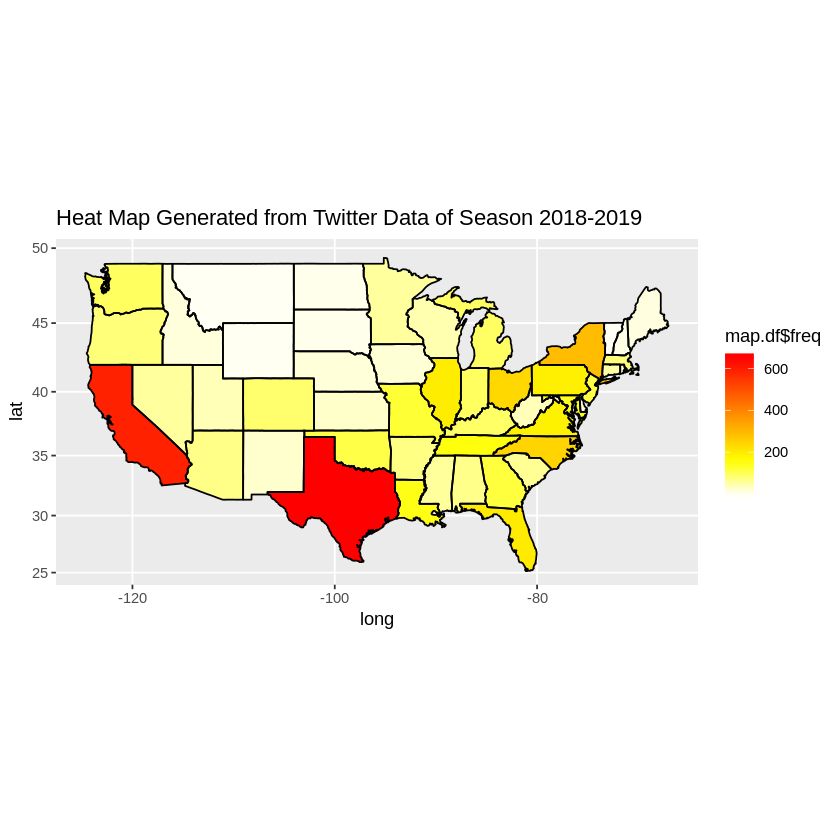

In [3]:
map.df = merge(states, tc, by="region", all.x = T)
ggplot(map.df, aes(x=long,y=lat, group=group))+
  geom_polygon(aes(fill=map.df$freq))+
  geom_path()+ 
  scale_fill_gradientn(colours=rev(heat.colors(50)))+
  coord_map()+ 
  ggtitle("Heat Map Generated from Twitter Data of Season 2018-2019")

### Run this Cell to View Complete Project in Shiny

In [4]:
library(shiny)
runApp()


Listening on http://127.0.0.1:6914
